In [1]:
import pandas as pd
from scipy.io import savemat
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from data_func import *

<p style="color: brown; font-size: 24px;"><strong><em>1) Data loading</em></strong></p>

In [2]:
# Pandas - openpyxl 
data = load_excel(r'C:\Users\anast\Desktop\Ramd_calc\Data_xlsx\results pbcatom.xlsx')
data2 = load_excel(r'C:\Users\anast\Desktop\Ramd_calc\Data_xlsx\results pbcatom ADDITIONAL.xlsx')

In [3]:
forces_data = {
    'force250': data[:, [0, 1]],
    'force275': data[:, [3, 4]],
    'force300': data[:, [6, 7]],
    'force325': data[:, [9, 10]],
    'force350': data[:, [12, 13]],
    'force375': data[:, [15, 16]],
    'force400': data[:, [18, 19]],
    'force425': data[:, [21, 22]],
    'force450': data[:, [24, 25]],
    'force475': data[:, [27, 28]],
    'force500': data[:, [30, 31]],
    'force525': data[:, [33, 34]],
    'force550': data[:, [36, 37]],
    'force575': data[:, [39, 40]],
    'force600': data[:, [42, 43]],
    # 'force588': data[:, [3, 40]],
    # 'force575': data[:, [6, 7]],
    # 'force563': data[:, [9, 10]],
    # 'force538': data[:, [15, 16]],
    # 'force513': data[:, [21, 22]],
    # 'force488': data[:, [27, 28]],
    # 'force475': data[:, [30, 31]],
    # 'force463': data[:, [33, 34]],
    # 'force425': data[:, [39, 40]],
    # 'force375': data[:, [45, 46]],
    # 'force350': data[:, [48, 49]],
    # 'force325': data[:, [51, 52]],
    # 'force300': data[:, [54, 55]],
    # 'force275': data[:, [57, 58]],
    # 'force250': data[:, [60, 61]]
 # второй набор: results pbcatom ADDITIONAL.xlsx :  
    'force488': data2[:, [0, 1]],
    'force513': data2[:, [3, 4]],
    'force538': data2[:, [6, 7]],
    'force563': data2[:, [9, 10]],
    'force588': data2[:, [12, 13]],
    'force263': data2[:, [15, 16]],
    'force288': data2[:, [18, 19]],
    'force313': data2[:, [21, 22]],
    'force338': data2[:, [24, 25]],
    'force363': data2[:, [27, 28]],
    'force388': data2[:, [30, 31]],
    'force413': data2[:, [33, 34]],
    'force438': data2[:, [36, 37]],
    'force463': data2[:, [39, 40]]
}

for key in forces_data:
    forces_data[key] = np.array(forces_data[key], dtype=float)
    
savemat(r'C:\Users\anast\Desktop\RAMD\matscripts\forces_with_pbcatom.mat', forces_data)

In [4]:
# Create empty arrays to store values
tau_all = []       # List of all dissociation times
forces_all = []    # List of forces

<p style="color: brown; font-size: 24px;"><strong><em>2) Procedure of approximation and its interpretation</em></strong><br><span style="font-size: 18px; font-style: italic;">Data loading and initial processing</span></p>

<p style="color: darkblue; font-size: 24px;"><strong><em> force 250 : </em></strong></p>

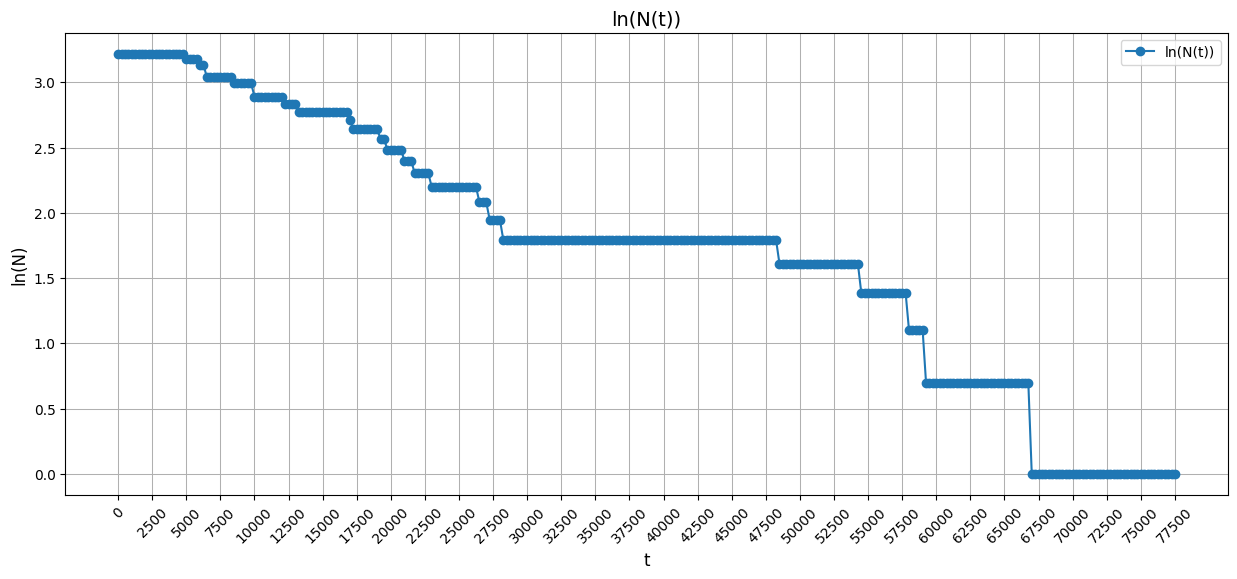

In [5]:
force = forces_data['force250']
force_value = 250
t, N = filter_data(force)
pend_var = []
tau_var = []
lambda_var = []
N0 = N[0]
ln_N = np.log(N)
plot_ln_N_vs_t(t, N)

In [6]:
t0 = 21  # since Python indexes from zero, we need to subtract 1(conversion from Matlab calculations)
tend = 63
tau_frac = 15500 
N_cut_max = 13  #+1(conversion from Matlab calculations)

<span style="color:darkblue;font-size: 18px;"><em>a) Finding classical exponential relaxation:</em></span>

tau_var: [2.327723210471358, 2.918085047998354, 3.726005080365139, 3.860288824372526, 3.895274370738051, 3.455521269163856, 1.486313322924282, 1.532312945503681, 1.514070033696745, 1.343795448412747, 1.448921520062662, 1.537635853521032, 1.741051527587008]
lambda_var: [-0.429604342776434, -0.342690491727082, -0.268383960416394, -0.259047974256834, -0.256721325591893, -0.289391938901876, -0.672805649102658, -0.652608204436525, -0.660471429817817, -0.744160877446915, -0.690168505438964, -0.650349039215039, -0.574365539534571]
pend_var: [array([-4.29604343e-05,  1.90909976e-01]), array([-3.42690492e-05, -1.03446439e-01]), array([-2.6838396e-05, -3.3425161e-01]), array([-2.59047974e-05, -3.62171839e-01]), array([-2.56721326e-05, -3.68824528e-01]), array([-2.89391939e-05, -2.78622216e-01]), array([-6.72805649e-05,  6.27438633e-01]), array([-6.52608204e-05,  5.87899525e-01]), array([-6.60471430e-05,  6.03129056e-01]), array([-7.44160877e-05,  7.63444061e-01]), array([-6.90168505e-05,  6.6787

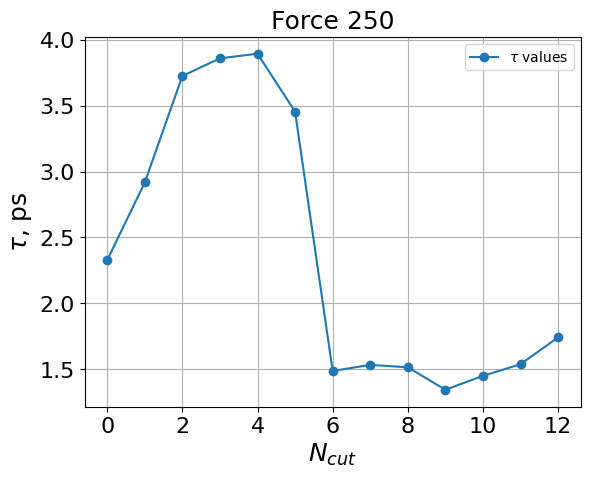

In [7]:
n = np.log(N / N0)
calculate_dissociation_rates(t, n, N, N_cut_max, tau_frac, tau_var, lambda_var, pend_var)
print("tau_var:", tau_var)
print("lambda_var:", lambda_var)
print("pend_var:", pend_var)

x_values = list(range(len(tau_var)))
y_values = tau_var
plot_tau(x_values, y_values, force_value)

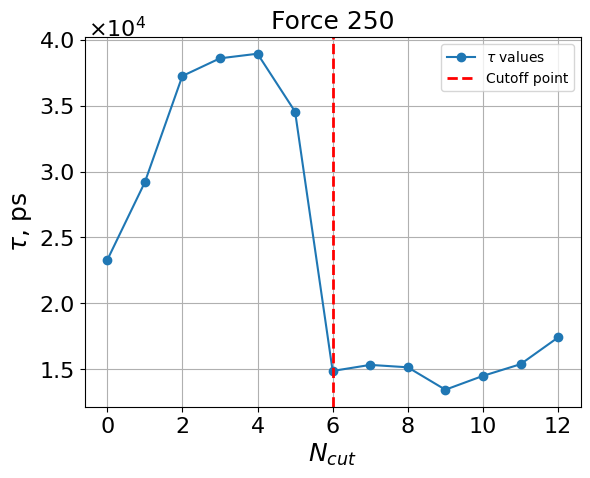

In [8]:
N_cut = 6

a = list(range(len(tau_var)))
plot_tau_with_cutoff(a, tau_var, N_cut, force_value)

<span style="color:darkblue;font-size: 18px;"><em>b) Initial non-classical (fractional) relaxation</em></span>

In [9]:
p, pinit = plot_init_part_ln_ln(force_value, n, t, t0, tend)
print(f"p: {p}, pinit: {pinit}")
print("t[t0:tend]:", t[t0:tend])
print("n[t0:tend]:", n[t0:tend])

p: 1.9563890424232262, pinit: [  1.95638904 -19.4153905 ]
t[t0:tend]: [ 5250.  5500.  5750.  6000.  6250.  6500.  6750.  7000.  7250.  7500.
  7750.  8000.  8250.  8500.  8750.  9000.  9250.  9500.  9750. 10000.
 10250. 10500. 10750. 11000. 11250. 11500. 11750. 12000. 12250. 12500.
 12750. 13000. 13250. 13500. 13750. 14000. 14250. 14500. 14750. 15000.
 15250. 15500.]
n[t0:tend]: [-0.04082199 -0.04082199 -0.04082199 -0.08338161 -0.08338161 -0.17435339
 -0.17435339 -0.17435339 -0.17435339 -0.17435339 -0.17435339 -0.17435339
 -0.17435339 -0.22314355 -0.22314355 -0.22314355 -0.22314355 -0.22314355
 -0.22314355 -0.32850407 -0.32850407 -0.32850407 -0.32850407 -0.32850407
 -0.32850407 -0.32850407 -0.32850407 -0.32850407 -0.38566248 -0.38566248
 -0.38566248 -0.38566248 -0.4462871  -0.4462871  -0.4462871  -0.4462871
 -0.4462871  -0.4462871  -0.4462871  -0.4462871  -0.4462871  -0.4462871 ]


In [10]:
# Values of tau and lambda for N_cut = 6
tau = tau_var[N_cut]
lambda_ = lambda_var[N_cut] * 1e-4
print(f"tau: {tau}, lambda: {lambda_}")

tau: 1.486313322924282, lambda: -6.72805649102658e-05


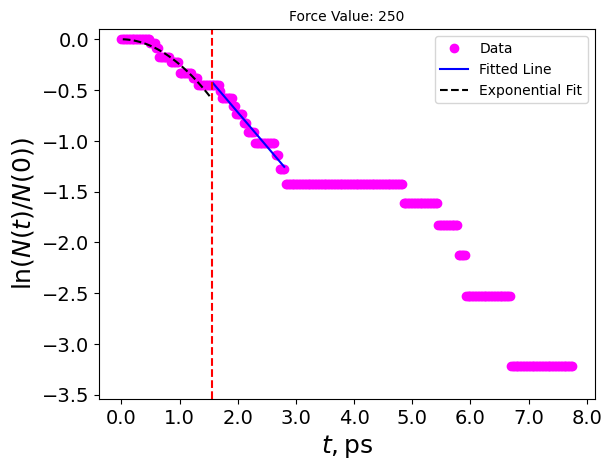

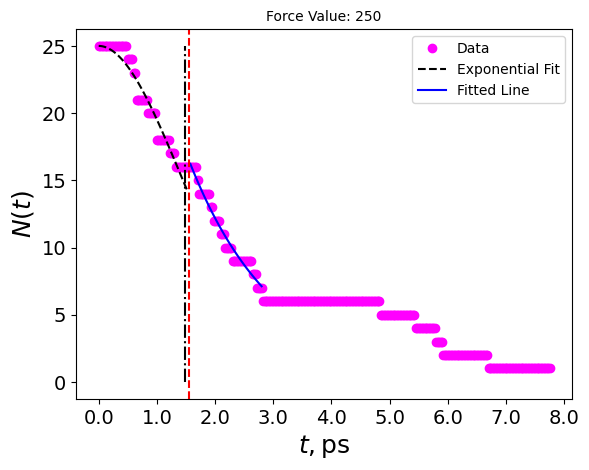

In [11]:
# Filtering data based on both conditions
t_fit = t[(N > N_cut) & (t > tau_frac)]
n_fit = n[(N > N_cut) & (t > tau_frac)]

# Calling functions with filtered data
plot_lnN(force_value, t, t_fit, n, tau_frac, pend_var[N_cut], pinit)
plot_N(force_value, t, t_fit, N, N0, tau_frac, pend_var[N_cut], pinit)
# красная пунктирная линия - порог tau_frac, который разделяет начальную (дробную) фазу релаксации от классической экспоненциальной релаксации
# черная пунктирно-точечная линия - время диссоциации tau, которое связано со скоростью диссоциации, полученной из аппроксимации 

In [12]:
tau_all.append(tau)
forces_all.append(force_value)

<p style="color: darkblue; font-size: 24px;"><strong><em> force 263 :</em></strong></p>

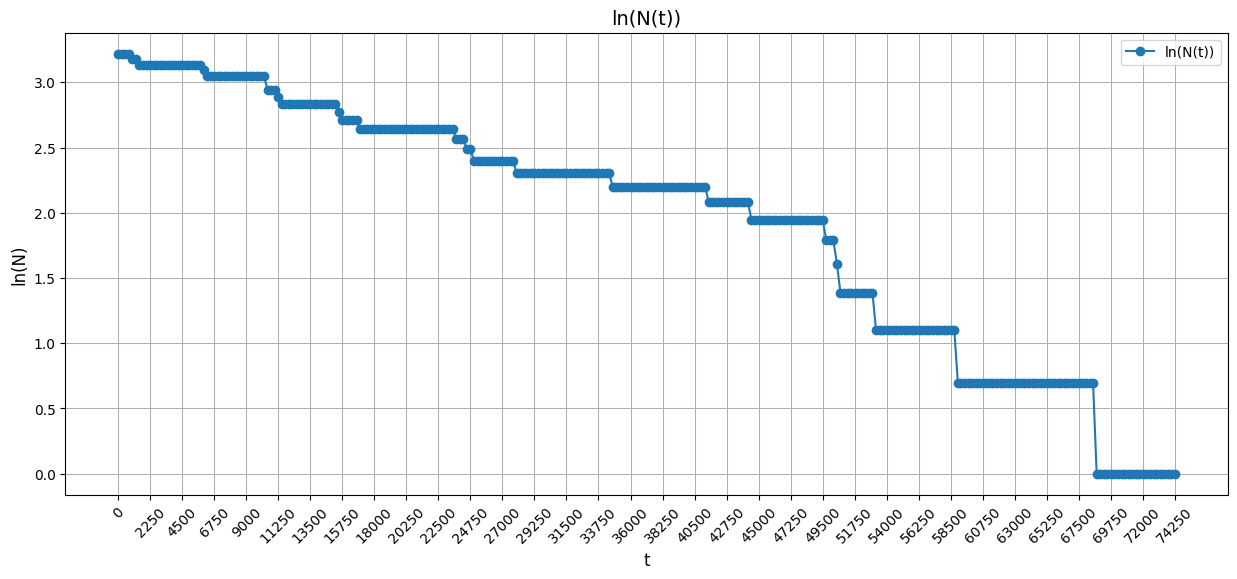

In [13]:
force = forces_data['force263']
force_value = 263
t, N = filter_data(force)
pend_var = []
tau_var = []
lambda_var = []
N0 = N[0]
ln_N = np.log(N)
plot_ln_N_vs_t(t, N)

In [14]:
t0 = 19  # since Python indexes from zero, we need to subtract 1
tend = 91
tau_frac = 18000
N_cut_max = 11

<span style="color:darkblue;font-size: 18px;"><em>a) Finding classical exponential relaxation:</em></span>

tau_var: [1.994138309379543, 2.212693655121674, 2.59893485240299, 3.358359213378619, 4.035113289354248, 4.09538067671332, 4.165570785525791, 4.280928421707773, 4.213316412088724, 3.46369752597636, 2.943173559434476]
lambda_var: [-0.501469730206999, -0.451937844032463, -0.384773015404905, -0.297764454742162, -0.247824516510671, -0.2441775451269, -0.240063139360091, -0.233594188337556, -0.237342725348334, -0.288708812620154, -0.339769293181659]
pend_var: [array([-5.01469730e-05,  7.00241327e-01]), array([-4.51937844e-05,  5.23381906e-01]), array([-3.84773015e-05,  3.04995261e-01]), array([-2.97764455e-05,  3.94714634e-02]), array([-2.47824517e-05, -1.07012473e-01]), array([-2.44177545e-05, -1.17558298e-01]), array([-2.40063139e-05, -1.29384650e-01]), array([-2.33594188e-05, -1.46543267e-01]), array([-2.37342725e-05, -1.36506733e-01]), array([-2.88708813e-05, -7.88415874e-03]), array([-3.39769293e-05,  1.13841393e-01])]


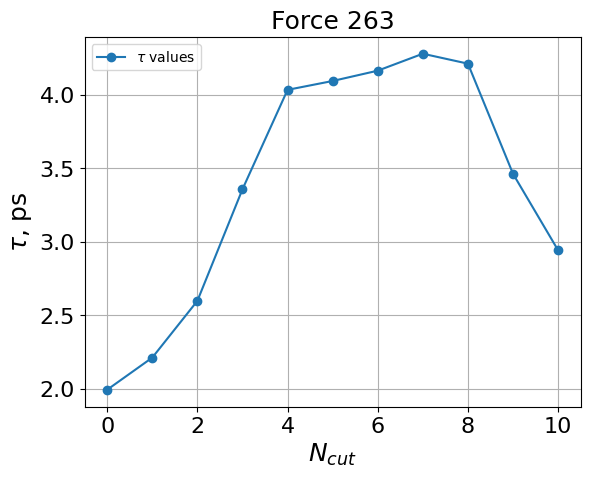

In [15]:
n = np.log(N / N0)
calculate_dissociation_rates(t, n, N, N_cut_max, tau_frac, tau_var, lambda_var, pend_var)
print("tau_var:", tau_var)
print("lambda_var:", lambda_var)
print("pend_var:", pend_var)

x_values = list(range(len(tau_var)))
y_values = tau_var
plot_tau(x_values, y_values, force_value)

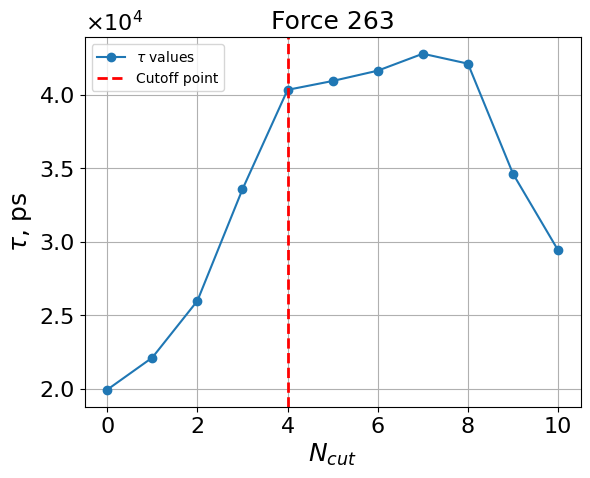

In [16]:
N_cut = 4

a = list(range(len(tau_var)))
plot_tau_with_cutoff(a, tau_var, N_cut, force_value)

<span style="color:darkblue;font-size: 18px;"><em>b) Initial non-classical (fractional) relaxation</em></span>

In [17]:
p, pinit = plot_init_part_ln_ln(force_value, n, t, t0, tend)
print(f"p: {p}, pinit: {pinit}")
print("t[t0:tend]:", t[t0:tend])
print("n[t0:tend]:", n[t0:tend])

p: 1.3501246328322074, pinit: [  1.35012463 -13.86462908]
t[t0:tend]: [ 4750.  5000.  5250.  5500.  5750.  6000.  6250.  6500.  6750.  7000.
  7250.  7500.  7750.  8000.  8250.  8500.  8750.  9000.  9250.  9500.
  9750. 10000. 10250. 10500. 10750. 11000. 11250. 11500. 11750. 12000.
 12250. 12500. 12750. 13000. 13250. 13500. 13750. 14000. 14250. 14500.
 14750. 15000. 15250. 15500. 15750. 16000. 16250. 16500. 16750. 17000.
 17250. 17500. 17750. 18000. 18250. 18500. 18750. 19000. 19250. 19500.
 19750. 20000. 20250. 20500. 20750. 21000. 21250. 21500. 21750. 22000.
 22250. 22500.]
n[t0:tend]: [-0.08338161 -0.08338161 -0.08338161 -0.08338161 -0.08338161 -0.12783337
 -0.17435339 -0.17435339 -0.17435339 -0.17435339 -0.17435339 -0.17435339
 -0.17435339 -0.17435339 -0.17435339 -0.17435339 -0.17435339 -0.17435339
 -0.17435339 -0.17435339 -0.17435339 -0.17435339 -0.17435339 -0.27443685
 -0.27443685 -0.27443685 -0.32850407 -0.38566248 -0.38566248 -0.38566248
 -0.38566248 -0.38566248 -0.38566248 -0.

In [18]:
tau = tau_var[N_cut]
lambda_ = lambda_var[N_cut] * 1e-4
print(f"tau: {tau}, lambda: {lambda_}")

tau: 4.035113289354248, lambda: -2.4782451651067102e-05


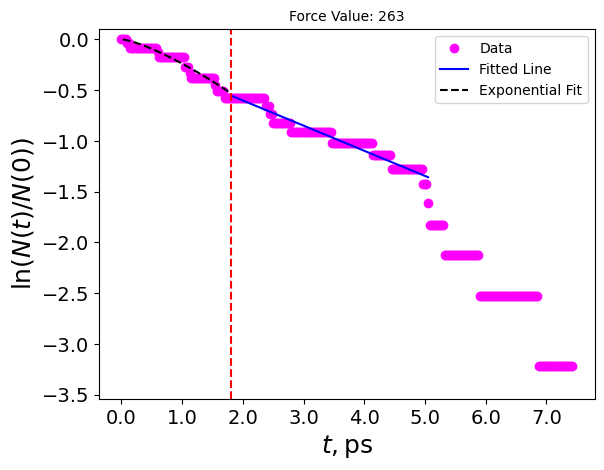

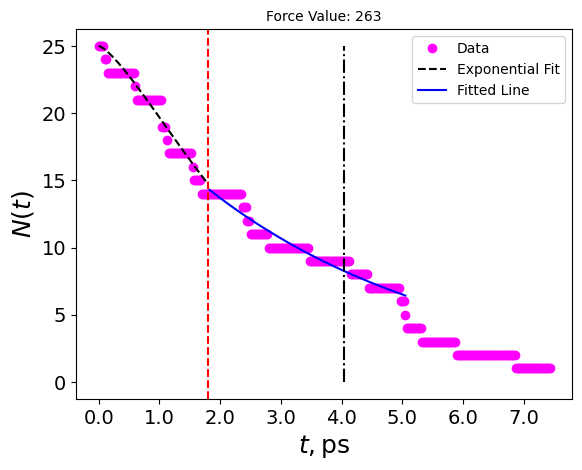

In [19]:
# Filtering data based on both conditions
t_fit = t[(N > N_cut) & (t > tau_frac)]
n_fit = n[(N > N_cut) & (t > tau_frac)]

# Calling functions with filtered data
plot_lnN(force_value, t, t_fit, n, tau_frac, pend_var[N_cut], pinit)
plot_N(force_value, t, t_fit, N, N0, tau_frac, pend_var[N_cut], pinit)

In [20]:
tau_all.append(tau)
forces_all.append(force_value)

<p style="color: darkblue; font-size: 24px;"><strong><em> force 275 :</em></strong></p>

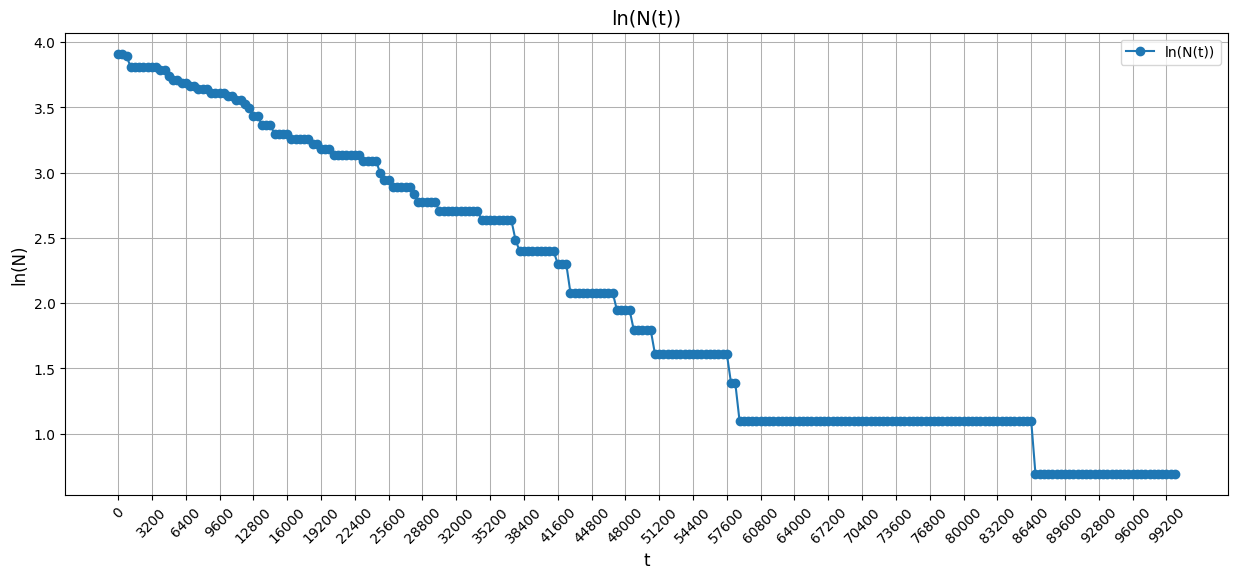

In [21]:
force = forces_data['force275']
force_value = 275
t, N = filter_data(force)
pend_var = []
tau_var = []
lambda_var = []
N0 = N[0]
ln_N = np.log(N)

plot_ln_N_vs_t(t, N)

In [22]:
t0 = 19 
tend = 91
tau_frac = 0
N_cut_max = 41

<span style="color:darkblue;font-size: 18px;"><em>a) Finding classical exponential relaxation:</em></span>

tau_var: [2.820193872615776, 2.820193872615776, 2.60916825561046, 2.34465124005152, 2.35579982901304, 2.452093659800037, 2.503852777104049, 2.53369038559786, 2.643564323810544, 2.643564323810544, 2.654484058923776, 2.694396869313098, 2.699161678781022, 2.699161678781022, 2.63437461806452, 2.623402657637698, 2.673671462179489, 2.683463858632426, 2.729628483900744, 2.75455957189726, 2.759958031975607, 2.759958031975607, 2.699306648519719, 2.636593534215924, 2.643006935100388, 2.645950802221278, 2.705445654431666, 2.928021728583455, 2.928021728583455, 3.180088196148662, 3.180088196148662, 3.357909311152262, 3.357909311152262, 3.396905385350628, 3.406592952164518, 3.374100988602488, 3.299179781547709, 3.137281501497176, 3.12610436597029, 3.196267642985958, 3.351007218991475]
lambda_var: [-0.354585551621131, -0.354585551621131, -0.38326389946287, -0.426502663985978, -0.424484282443874, -0.40781476515116, -0.399384504210586, -0.394681215070418, -0.378277158226496, -0.378277158226496, -0.3767

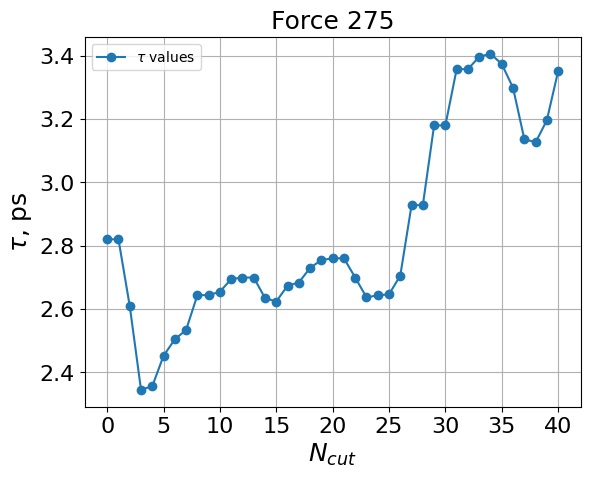

In [23]:
n = np.log(N / N0)
calculate_dissociation_rates(t, n, N, N_cut_max, tau_frac, tau_var, lambda_var, pend_var)
print("tau_var:", tau_var)
print("lambda_var:", lambda_var)
print("pend_var:", pend_var)

x_values = list(range(len(tau_var)))
y_values = tau_var
plot_tau(x_values, y_values, force_value)

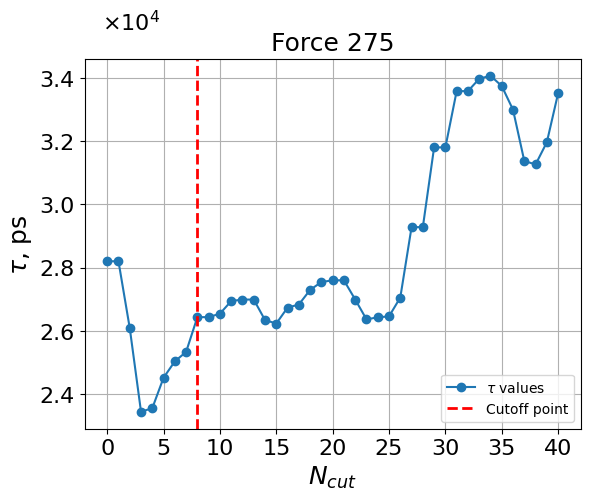

In [24]:
N_cut = 8

a = list(range(len(tau_var)))
plot_tau_with_cutoff(a, tau_var, N_cut, force_value)

<span style="color:darkblue;font-size: 18px;"><em>b) Initial non-classical (fractional) relaxation</em></span>

In [25]:
p, pinit = plot_init_part_ln_ln(force_value, n, t, t0, tend)
print(f"p: {p}, pinit: {pinit}")
print("t[t0:tend]:", t[t0:tend])
print("n[t0:tend]:", n[t0:tend])

p: 1.0791023874106562, pinit: [  1.07910239 -11.00260765]
t[t0:tend]: [ 7600.  8000.  8400.  8800.  9200.  9600. 10000. 10400. 10800. 11200.
 11600. 12000. 12400. 12800. 13200. 13600. 14000. 14400. 14800. 15200.
 15600. 16000. 16400. 16800. 17200. 17600. 18000. 18400. 18800. 19200.
 19600. 20000. 20400. 20800. 21200. 21600. 22000. 22400. 22800. 23200.
 23600. 24000. 24400. 24800. 25200. 25600. 26000. 26400. 26800. 27200.
 27600. 28000. 28400. 28800. 29200. 29600. 30000. 30400. 30800. 31200.
 31600. 32000. 32400. 32800. 33200. 33600. 34000. 34400. 34800. 35200.
 35600. 36000.]
n[t0:tend]: [-0.27443685 -0.27443685 -0.27443685 -0.30110509 -0.30110509 -0.30110509
 -0.30110509 -0.32850407 -0.32850407 -0.35667494 -0.35667494 -0.38566248
 -0.41551544 -0.4780358  -0.4780358  -0.54472718 -0.54472718 -0.54472718
 -0.61618614 -0.61618614 -0.61618614 -0.61618614 -0.65392647 -0.65392647
 -0.65392647 -0.65392647 -0.65392647 -0.69314718 -0.69314718 -0.73396918
 -0.73396918 -0.73396918 -0.77652879 -0.

In [26]:
tau = tau_var[N_cut]
lambda_ = lambda_var[N_cut] * 1e-4
print(f"tau: {tau}, lambda: {lambda_}")

tau: 2.643564323810544, lambda: -3.78277158226496e-05


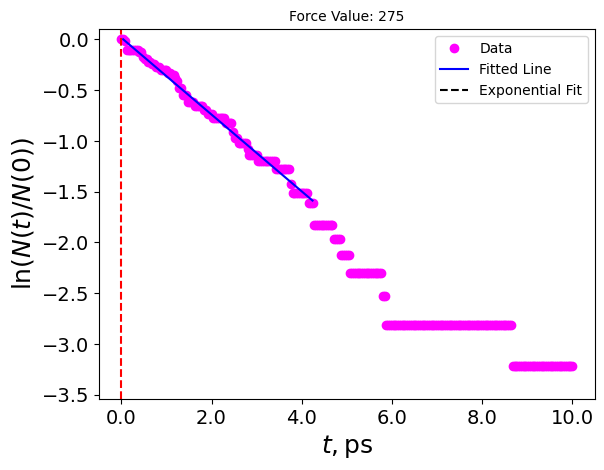

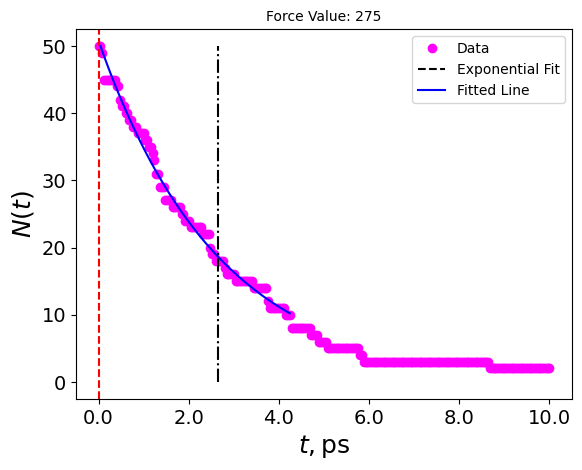

In [27]:
t_fit = t[(N > N_cut) & (t > tau_frac)]
n_fit = n[(N > N_cut) & (t > tau_frac)]

plot_lnN(force_value, t, t_fit, n, tau_frac, pend_var[N_cut], pinit)
plot_N(force_value, t, t_fit, N, N0, tau_frac, pend_var[N_cut], pinit)

In [28]:
tau_all.append(tau)
forces_all.append(force_value)

<p style="color: darkblue; font-size: 24px;"><strong><em> force 288 :</em></strong></p>

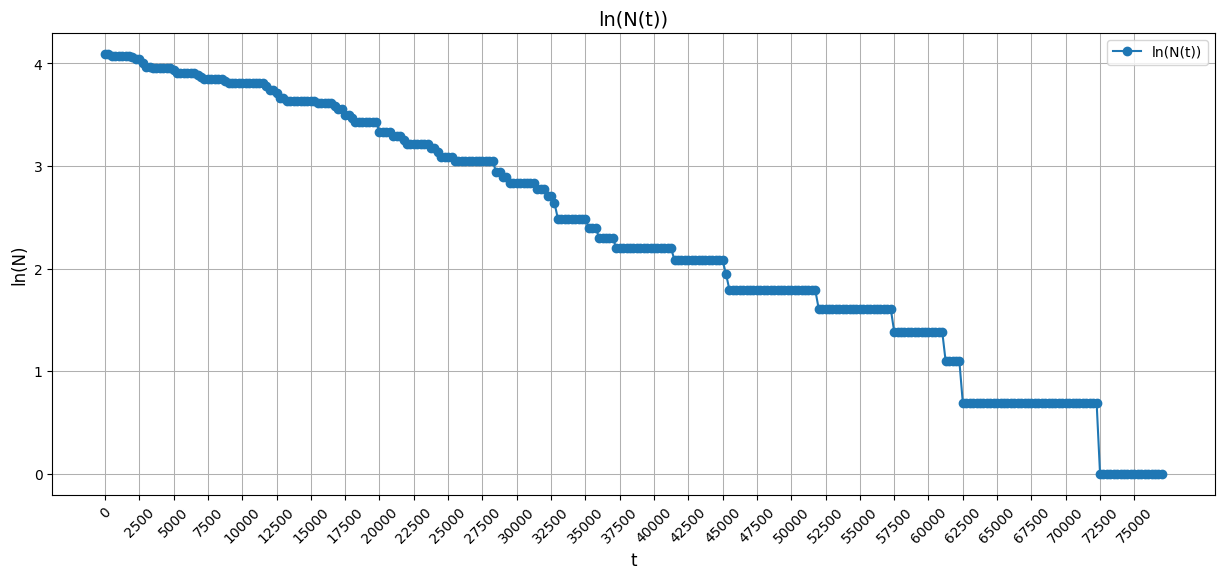

In [29]:
force = forces_data['force288']
force_value = 288
t, N = filter_data(force)
pend_var = []
tau_var = []
lambda_var = []
N0 = N[0]
ln_N = np.log(N)

plot_ln_N_vs_t(t, N)

In [30]:
t0 = 19
tend = 91
tau_frac = 18000
N_cut_max = 26

<span style="color:darkblue;font-size: 18px;"><em>a) Finding classical exponential relaxation:</em></span>

tau_var: [1.756793995758591, 1.850319448972752, 1.95173971160311, 1.963033603648919, 1.91280309490238, 1.791155790721697, 1.704919430218384, 1.7023151629496, 1.614683127181714, 1.63343107651306, 1.697229429699648, 1.736878129480916, 1.969650506957637, 1.969650506957637, 1.992448502863642, 2.01499022219176, 2.022761154506354, 2.088780829971631, 2.127753492362936, 2.138836373353004, 2.138836373353004, 1.849622442575647, 1.921028779476072, 1.936853607873762, 1.889448832138447, 1.788366767435638]
lambda_var: [-0.56921870316855, -0.540447218751969, -0.512363402791362, -0.509415630043818, -0.522792964244464, -0.558298728217872, -0.586537980784177, -0.587435289166608, -0.619316560113817, -0.612208261725211, -0.589195533910207, -0.575745634092854, -0.507704283814605, -0.507704283814605, -0.50189502943878, -0.496280323838134, -0.494373741443559, -0.47874817005745, -0.469979254452765, -0.467543947007187, -0.467543947007187, -0.540650879326201, -0.520554408493939, -0.516301281591322, -0.529254872

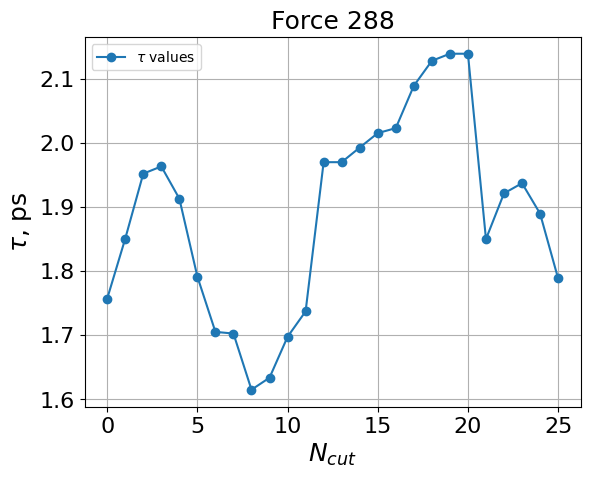

In [31]:
n = np.log(N / N0)
calculate_dissociation_rates(t, n, N, N_cut_max, tau_frac, tau_var, lambda_var, pend_var)
print("tau_var:", tau_var)
print("lambda_var:", lambda_var)
print("pend_var:", pend_var)

x_values = list(range(len(tau_var)))
y_values = tau_var
plot_tau(x_values, y_values, force_value)

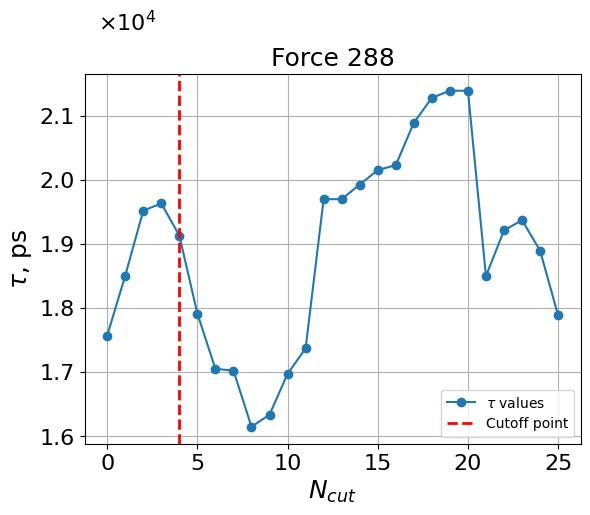

In [32]:
N_cut = 4

a = list(range(len(tau_var)))
plot_tau_with_cutoff(a, tau_var, N_cut, force_value)

<span style="color:darkblue;font-size: 18px;"><em>b) Initial non-classical (fractional) relaxation</em></span>

In [33]:
p, pinit = plot_init_part_ln_ln(force_value, n, t, t0, tend)
print(f"p: {p}, pinit: {pinit}")
print("t[t0:tend]:", t[t0:tend])
print("n[t0:tend]:", n[t0:tend])

p: 1.1284001694120462, pinit: [  1.12840017 -11.55969396]
t[t0:tend]: [ 4750.  5000.  5250.  5500.  5750.  6000.  6250.  6500.  6750.  7000.
  7250.  7500.  7750.  8000.  8250.  8500.  8750.  9000.  9250.  9500.
  9750. 10000. 10250. 10500. 10750. 11000. 11250. 11500. 11750. 12000.
 12250. 12500. 12750. 13000. 13250. 13500. 13750. 14000. 14250. 14500.
 14750. 15000. 15250. 15500. 15750. 16000. 16250. 16500. 16750. 17000.
 17250. 17500. 17750. 18000. 18250. 18500. 18750. 19000. 19250. 19500.
 19750. 20000. 20250. 20500. 20750. 21000. 21250. 21500. 21750. 22000.
 22250. 22500.]
n[t0:tend]: [-0.14310084 -0.16251893 -0.18232156 -0.18232156 -0.18232156 -0.18232156
 -0.18232156 -0.18232156 -0.20252426 -0.22314355 -0.24419696 -0.24419696
 -0.24419696 -0.24419696 -0.24419696 -0.24419696 -0.26570317 -0.28768207
 -0.28768207 -0.28768207 -0.28768207 -0.28768207 -0.28768207 -0.28768207
 -0.28768207 -0.28768207 -0.28768207 -0.28768207 -0.31015493 -0.35667494
 -0.35667494 -0.3807725  -0.43078292 -0.

In [34]:
# Values of tau and lambda for N_cut = 6
tau = tau_var[N_cut]
lambda_ = lambda_var[N_cut] * 1e-4
print(f"tau: {tau}, lambda: {lambda_}")

tau: 1.91280309490238, lambda: -5.22792964244464e-05


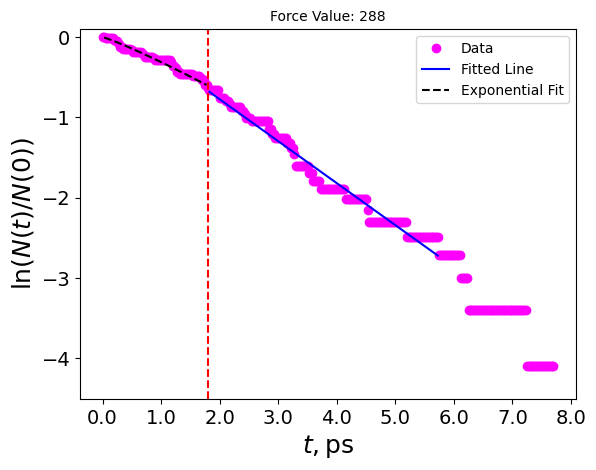

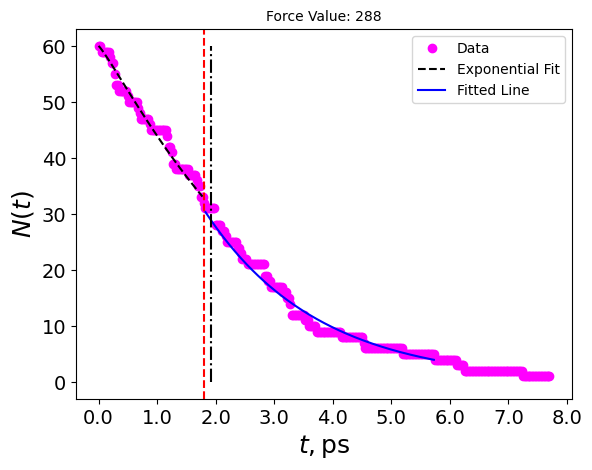

In [35]:
t_fit = t[(N > N_cut) & (t > tau_frac)]
n_fit = n[(N > N_cut) & (t > tau_frac)]

plot_lnN(force_value, t, t_fit, n, tau_frac, pend_var[N_cut], pinit)
plot_N(force_value, t, t_fit, N, N0, tau_frac, pend_var[N_cut], pinit)

In [36]:
tau_all.append(tau)
forces_all.append(force_value)

<p style="color: darkblue; font-size: 24px;"><strong><em> force 300 :</em></strong></p>

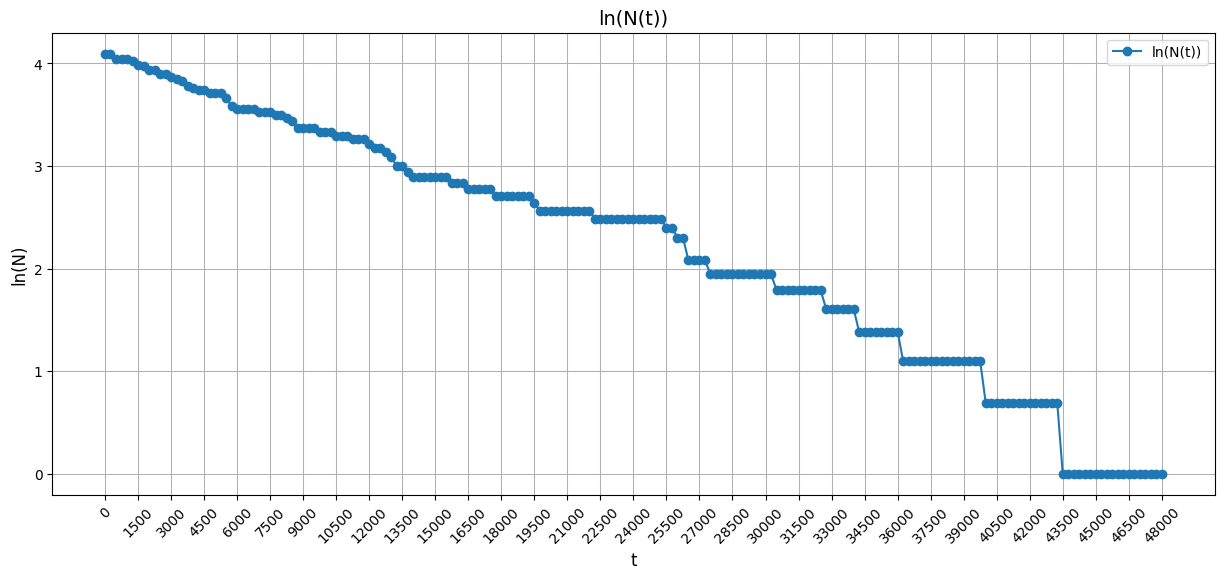

In [37]:
force = forces_data['force300']
force_value = 300
t, N = filter_data(force)
pend_var = []
tau_var = []
lambda_var = []
N0 = N[0]
ln_N = np.log(N)
plot_ln_N_vs_t(t, N)

In [38]:
t0 = 2 
tend = 49
tau_frac = 0
N_cut_max = 57 

<span style="color:darkblue;font-size: 18px;"><em>a) Finding classical exponential relaxation:</em></span>

tau_var: [1.187110632517147, 1.281750004662752, 1.328490318573773, 1.375012751882394, 1.400900545384442, 1.410778211230106, 1.416071777504562, 1.444679009037506, 1.46132159010269, 1.46132159010269, 1.454436962642793, 1.440683413240546, 1.3427052143981, 1.301073268260061, 1.297535101220069, 1.267910738771077, 1.260575985538972, 1.260370536352294, 1.300497519571223, 1.313207749734553, 1.336707999575244, 1.336707999575244, 1.339632503389684, 1.338396765486622, 1.329763215030373, 1.322203351805869, 1.292268467243897, 1.264393112372013, 1.242193341297951, 1.240971483263393, 1.240971483263393, 1.235334897177231, 1.224450695993367, 1.196006376647624, 1.161903954032878, 1.195538017201648, 1.23222140113546, 1.23222140113546, 1.23222140113546, 1.230071862411802, 1.230071862411802, 1.178633363356279, 1.192371805625888, 1.21890676792351, 1.25566441701967, 1.25566441701967, 1.254390239837099, 1.247889700134483, 1.233884818064123, 1.267600042268806, 1.267600042268806, 1.40564516756106, 1.40564516756

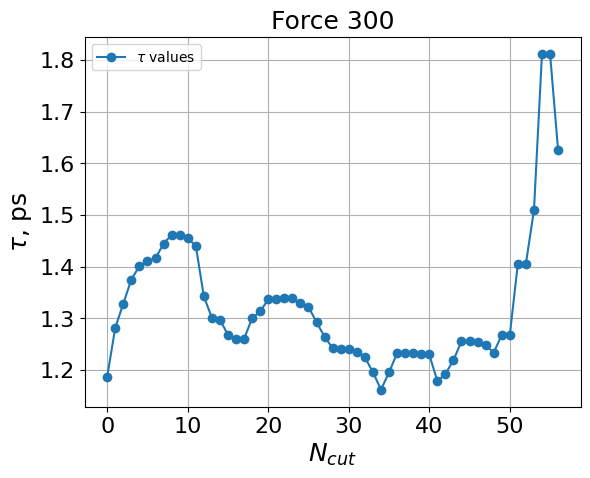

In [39]:
n = np.log(N / N0)
calculate_dissociation_rates(t, n, N, N_cut_max, tau_frac, tau_var, lambda_var, pend_var)
print("tau_var:", tau_var)
print("lambda_var:", lambda_var)
print("pend_var:", pend_var)

x_values = list(range(len(tau_var)))
y_values = tau_var
plot_tau(x_values, y_values, force_value)

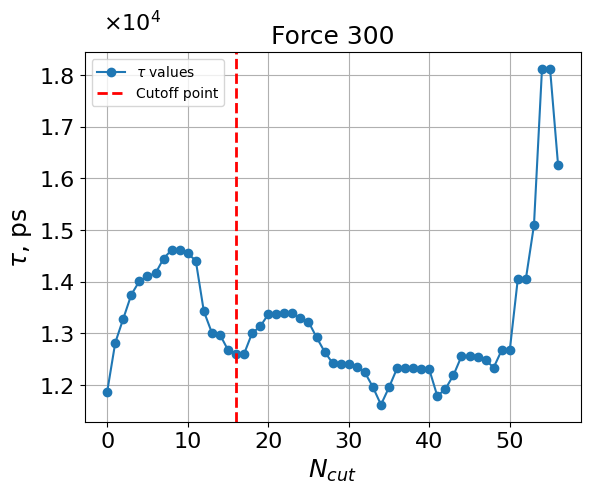

In [40]:
N_cut = 16

a = list(range(len(tau_var)))
plot_tau_with_cutoff(a, tau_var, N_cut, force_value)

<span style="color:darkblue;font-size: 18px;"><em>b) Initial non-classical (fractional) relaxation</em></span>

In [41]:
p, pinit = plot_init_part_ln_ln(force_value, n, t, t0, tend)
print(f"p: {p}, pinit: {pinit}")
print("t[t0:tend]:", t[t0:tend])
print("n[t0:tend]:", n[t0:tend])

p: 1.0261071124125865, pinit: [ 1.02610711 -9.69933463]
t[t0:tend]: [  500.   750.  1000.  1250.  1500.  1750.  2000.  2250.  2500.  2750.
  3000.  3250.  3500.  3750.  4000.  4250.  4500.  4750.  5000.  5250.
  5500.  5750.  6000.  6250.  6500.  6750.  7000.  7250.  7500.  7750.
  8000.  8250.  8500.  8750.  9000.  9250.  9500.  9750. 10000. 10250.
 10500. 10750. 11000. 11250. 11500. 11750. 12000.]
n[t0:tend]: [-0.05129329 -0.05129329 -0.05129329 -0.06899287 -0.10536052 -0.12405265
 -0.16251893 -0.16251893 -0.20252426 -0.20252426 -0.22314355 -0.24419696
 -0.26570317 -0.31015493 -0.33314445 -0.35667494 -0.35667494 -0.3807725
 -0.3807725  -0.3807725  -0.43078292 -0.51082562 -0.5389965  -0.5389965
 -0.5389965  -0.5389965  -0.56798404 -0.56798404 -0.56798404 -0.597837
 -0.597837   -0.62860866 -0.66035736 -0.72704873 -0.72704873 -0.72704873
 -0.72704873 -0.76214005 -0.76214005 -0.76214005 -0.7985077  -0.7985077
 -0.7985077  -0.83624802 -0.83624802 -0.83624802 -0.87546874]


In [42]:
tau = tau_var[N_cut]
lambda_ = lambda_var[N_cut] * 1e-4
print(f"tau: {tau}, lambda: {lambda_}")

tau: 1.260575985538972, lambda: -7.93288156740857e-05


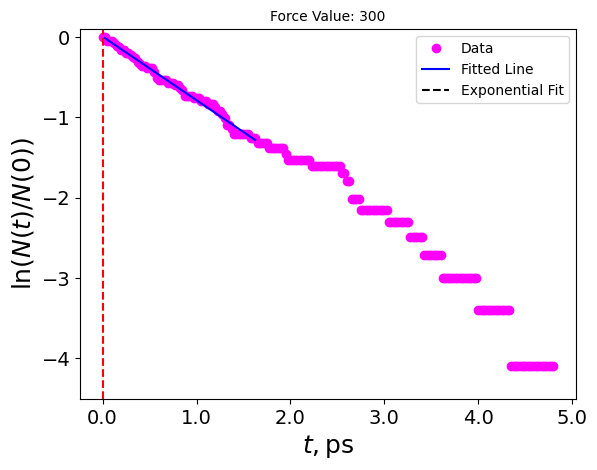

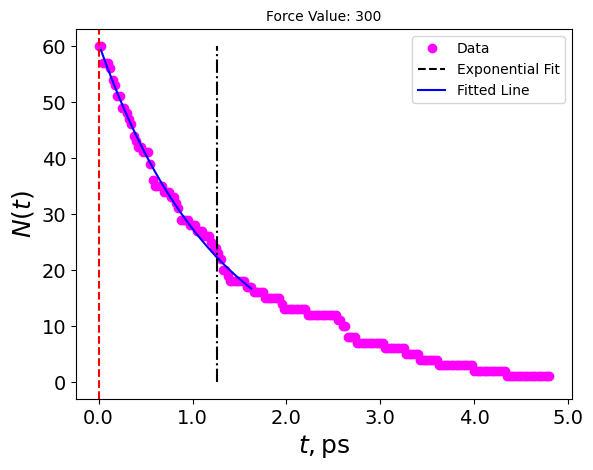

In [43]:
t_fit = t[(N > N_cut) & (t > tau_frac)]
n_fit = n[(N > N_cut) & (t > tau_frac)]

plot_lnN(force_value, t, t_fit, n, tau_frac, pend_var[N_cut], pinit)
plot_N(force_value, t, t_fit, N, N0, tau_frac, pend_var[N_cut], pinit)

In [44]:
tau_all.append(tau)
forces_all.append(force_value)

<p style="color: darkblue; font-size: 24px;"><strong><em> force 313 :</em></strong></p>

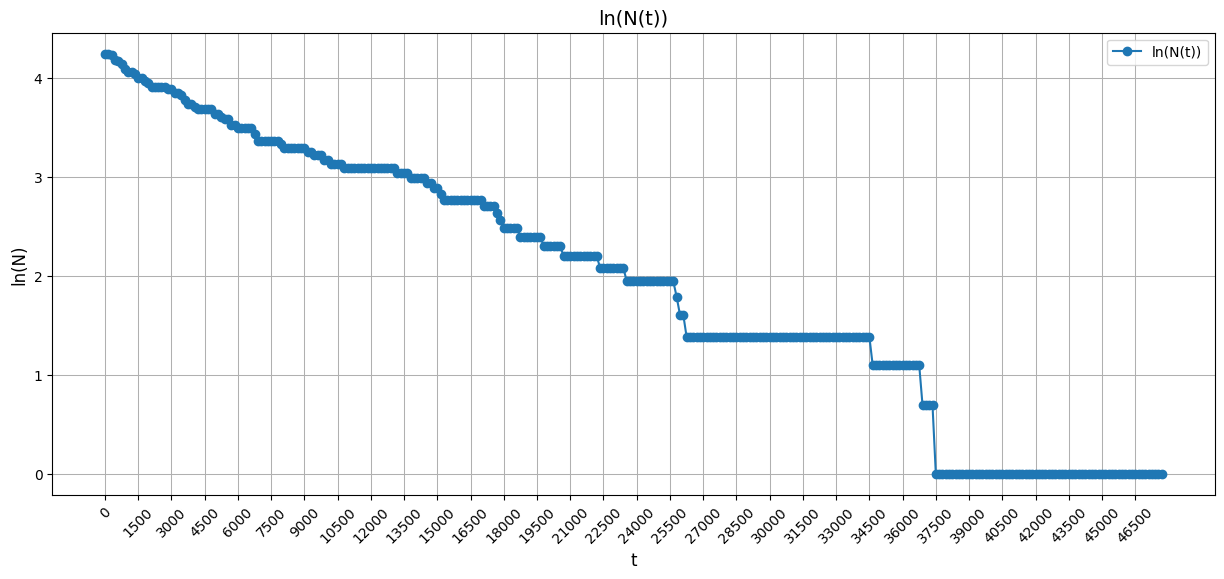

In [45]:
force = forces_data['force313']
force_value = 313
t, N = filter_data(force)
pend_var = []
tau_var = []
lambda_var = []
N0 = N[0]
ln_N = np.log(N)
plot_ln_N_vs_t(t, N)

In [46]:
t0 = 19
tend = 91
tau_frac = 2550
N_cut_max = 14

<span style="color:darkblue;font-size: 18px;"><em>a) Finding classical exponential relaxation:</em></span>

tau_var: [1.05662205205017, 1.15393969969257, 1.160885455507552, 1.140786194657328, 1.154425730052014, 1.164644174605124, 1.16635580961869, 1.17664316667049, 1.190041562070832, 1.220242311482064, 1.246598006724979, 1.285041935846092, 1.31997839565879, 1.325394426881698]
lambda_var: [-0.946412199196197, -0.866596409038027, -0.861411429745916, -0.876588448110018, -0.866231559092974, -0.858631350076561, -0.857371302781888, -0.849875330368568, -0.840306785806595, -0.819509363501283, -0.802183217529095, -0.778184720751221, -0.757588156964424, -0.75449238333734]
pend_var: [array([-9.46412199e-05, -5.93939533e-02]), array([-8.66596409e-05, -1.72416508e-01]), array([-8.61411430e-05, -1.79736996e-01]), array([-8.76588448e-05, -1.58908646e-01]), array([-8.66231559e-05, -1.59321483e-01]), array([-8.58631350e-05, -1.67243804e-01]), array([-8.57371303e-05, -1.68547953e-01]), array([-8.49875330e-05, -1.75642743e-01]), array([-8.40306786e-05, -1.84543603e-01]), array([-8.19509364e-05, -2.02829281e-01

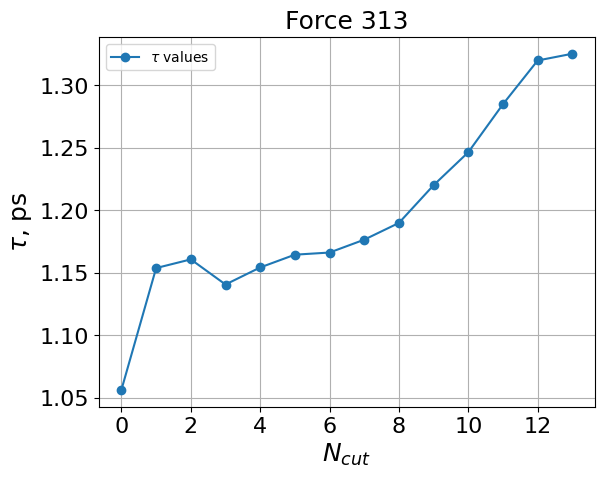

In [47]:
n = np.log(N / N0)
calculate_dissociation_rates(t, n, N, N_cut_max, tau_frac, tau_var, lambda_var, pend_var)
print("tau_var:", tau_var)
print("lambda_var:", lambda_var)
print("pend_var:", pend_var)

x_values = list(range(len(tau_var)))
y_values = tau_var
plot_tau(x_values, y_values, force_value)

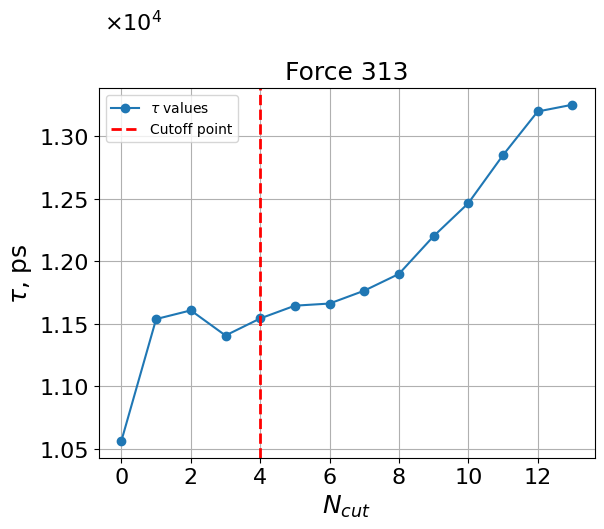

In [48]:
N_cut = 4

a = list(range(len(tau_var)))
plot_tau_with_cutoff(a, tau_var, N_cut, force_value)

<span style="color:darkblue;font-size: 18px;"><em>b) Initial non-classical (fractional) relaxation</em></span>

In [49]:
p, pinit = plot_init_part_ln_ln(force_value, n, t, t0, tend)
print(f"p: {p}, pinit: {pinit}")
print("t[t0:tend]:", t[t0:tend])
print("n[t0:tend]:", n[t0:tend])

p: 0.7729926909385222, pinit: [ 0.77299269 -7.07487768]
t[t0:tend]: [ 2850.  3000.  3150.  3300.  3450.  3600.  3750.  3900.  4050.  4200.
  4350.  4500.  4650.  4800.  4950.  5100.  5250.  5400.  5550.  5700.
  5850.  6000.  6150.  6300.  6450.  6600.  6750.  6900.  7050.  7200.
  7350.  7500.  7650.  7800.  7950.  8100.  8250.  8400.  8550.  8700.
  8850.  9000.  9150.  9300.  9450.  9600.  9750.  9900. 10050. 10200.
 10350. 10500. 10650. 10800. 10950. 11100. 11250. 11400. 11550. 11700.
 11850. 12000. 12150. 12300. 12450. 12600. 12750. 12900. 13050. 13200.
 13350. 13500.]
n[t0:tend]: [-0.35667494 -0.35667494 -0.39834764 -0.39834764 -0.41985385 -0.46430561
 -0.51082562 -0.51082562 -0.53492318 -0.55961579 -0.55961579 -0.55961579
 -0.55961579 -0.55961579 -0.61090908 -0.61090908 -0.63757733 -0.6649763
 -0.6649763  -0.72213472 -0.72213472 -0.75198768 -0.75198768 -0.75198768
 -0.75198768 -0.75198768 -0.81450804 -0.88119941 -0.88119941 -0.88119941
 -0.88119941 -0.88119941 -0.88119941 -0.881

In [50]:
tau = tau_var[N_cut]
lambda_ = lambda_var[N_cut] * 1e-4
print(f"tau: {tau}, lambda: {lambda_}")

tau: 1.154425730052014, lambda: -8.662315590929741e-05


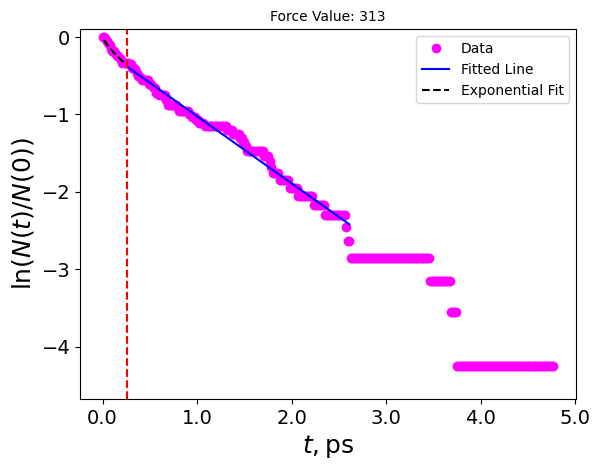

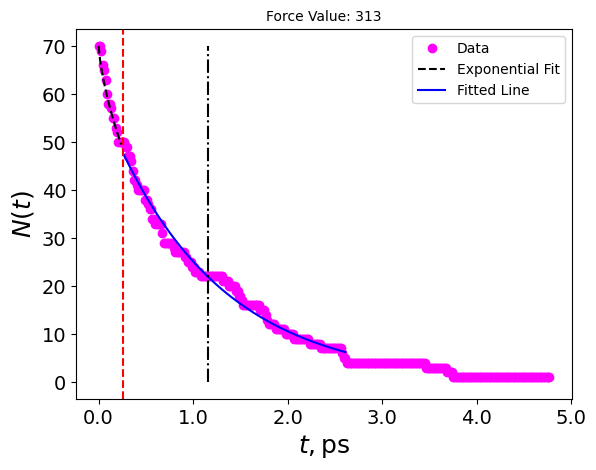

In [51]:
t_fit = t[(N > N_cut) & (t > tau_frac)]
n_fit = n[(N > N_cut) & (t > tau_frac)]

plot_lnN(force_value, t, t_fit, n, tau_frac, pend_var[N_cut], pinit)
plot_N(force_value, t, t_fit, N, N0, tau_frac, pend_var[N_cut], pinit)

In [52]:
tau_all.append(tau)
forces_all.append(force_value)

<p style="color: darkblue; font-size: 24px;"><strong><em> force 325 :</em></strong></p>

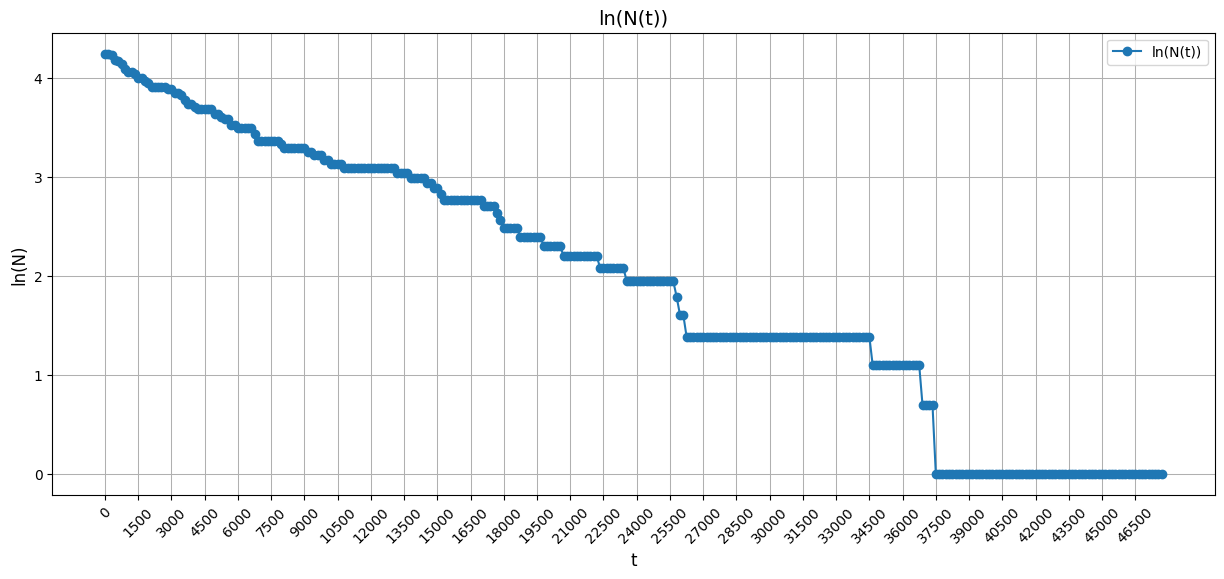

In [53]:
force = forces_data['force325']
force_value = 325
pend_var = []
tau_var = []
lambda_var = []
N0 = N[0]
ln_N = np.log(N)
plot_ln_N_vs_t(t, N)

In [54]:
t0 = 19
tend = 54
tau_frac = 0
N_cut_max = 81

<span style="color:darkblue;font-size: 18px;"><em>a) Finding classical exponential relaxation:</em></span>

tau_var: [1.057406633799852, 1.141573797161038, 1.147052731708528, 1.128548753349898, 1.133301937485097, 1.140800134022028, 1.141866125221857, 1.145028060804401, 1.151585227228128, 1.166894868396965, 1.180291288308201, 1.198424897371046, 1.21373023622756, 1.215514251139874, 1.214704975753216, 1.203771944472622, 1.17879326768938, 1.17726267757041, 1.169477865379647, 1.157418489745958, 1.119265225469324, 1.084005952913465, 0.966891450653743, 0.95211675913136, 0.943627782713122, 0.927603290627488, 0.914713856240479, 0.877211746596412, 0.873352647066692, 0.867209004576705, 0.867209004576705, 0.866656414669164, 0.866656414669164, 0.849203253964728, 0.852626236687674, 0.852626236687674, 0.846390877174336, 0.842278279816078, 0.831576552374088, 0.831576552374088, 0.802103396182756, 0.80504125657681, 0.817028953912302, 0.817028953912302, 0.816006790692639, 0.816006790692639, 0.799973011096475, 0.762695192443794, 0.762695192443794, 0.699672181662161, 0.597753622706747, 0.597753622706747, 0.58637

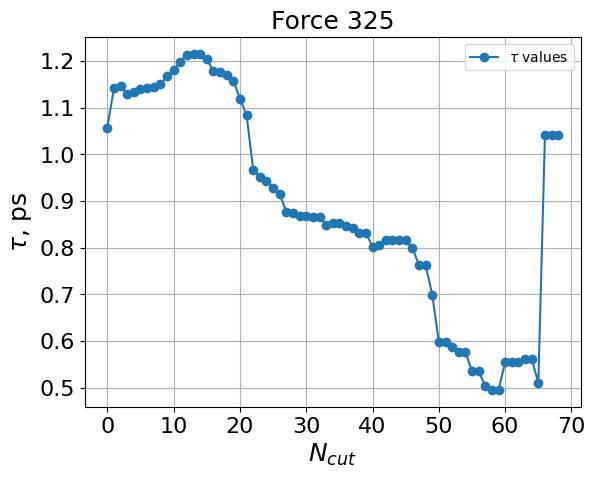

In [55]:
n = np.log(N / N0)
calculate_dissociation_rates(t, n, N, N_cut_max, tau_frac, tau_var, lambda_var, pend_var)
print("tau_var:", tau_var)
print("lambda_var:", lambda_var)
print("pend_var:", pend_var)

x_values = list(range(len(tau_var)))
y_values = tau_var
plot_tau(x_values, y_values, force_value)

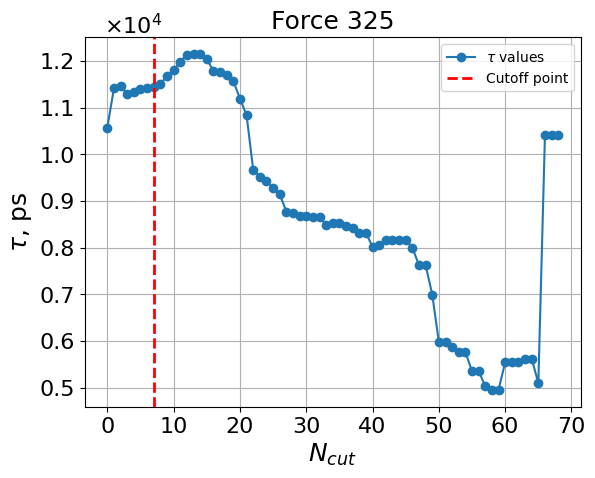

In [56]:
N_cut = 7

a = list(range(len(tau_var)))
plot_tau_with_cutoff(a, tau_var, N_cut, force_value)

<span style="color:darkblue;font-size: 18px;"><em>b) Initial non-classical (fractional) relaxation</em></span>

In [57]:
p, pinit = plot_init_part_ln_ln(force_value, n, t, t0, tend)
print(f"p: {p}, pinit: {pinit}")
print("t[t0:tend]:", t[t0:tend])
print("n[t0:tend]:", n[t0:tend])

p: 0.9240130132134695, pinit: [ 0.92401301 -8.35656175]
t[t0:tend]: [2850. 3000. 3150. 3300. 3450. 3600. 3750. 3900. 4050. 4200. 4350. 4500.
 4650. 4800. 4950. 5100. 5250. 5400. 5550. 5700. 5850. 6000. 6150. 6300.
 6450. 6600. 6750. 6900. 7050. 7200. 7350. 7500. 7650. 7800. 7950.]
n[t0:tend]: [-0.35667494 -0.35667494 -0.39834764 -0.39834764 -0.41985385 -0.46430561
 -0.51082562 -0.51082562 -0.53492318 -0.55961579 -0.55961579 -0.55961579
 -0.55961579 -0.55961579 -0.61090908 -0.61090908 -0.63757733 -0.6649763
 -0.6649763  -0.72213472 -0.72213472 -0.75198768 -0.75198768 -0.75198768
 -0.75198768 -0.75198768 -0.81450804 -0.88119941 -0.88119941 -0.88119941
 -0.88119941 -0.88119941 -0.88119941 -0.88119941 -0.91629073]


In [58]:
tau = tau_var[N_cut]
lambda_ = lambda_var[N_cut] * 1e-4
print(f"tau: {tau}, lambda: {lambda_}")

tau: 1.145028060804401, lambda: -8.73341042225187e-05


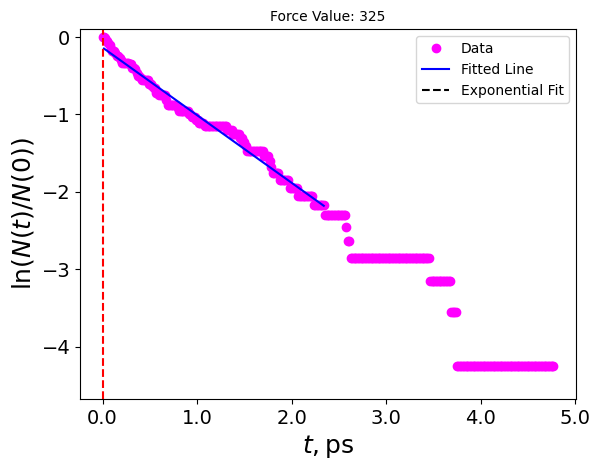

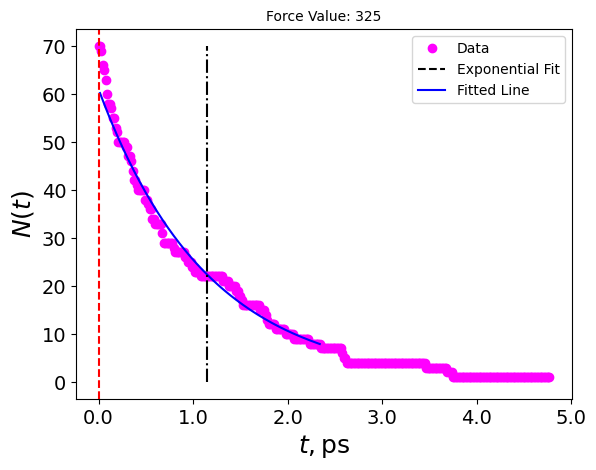

In [59]:
t_fit = t[(N > N_cut) & (t > tau_frac)]
n_fit = n[(N > N_cut) & (t > tau_frac)]

plot_lnN(force_value, t, t_fit, n, tau_frac, pend_var[N_cut], pinit)
plot_N(force_value, t, t_fit, N, N0, tau_frac, pend_var[N_cut], pinit)

In [60]:
tau_all.append(tau)
forces_all.append(force_value)

<p style="color: darkblue; font-size: 24px;"><strong><em> force 338 :</em></strong></p>

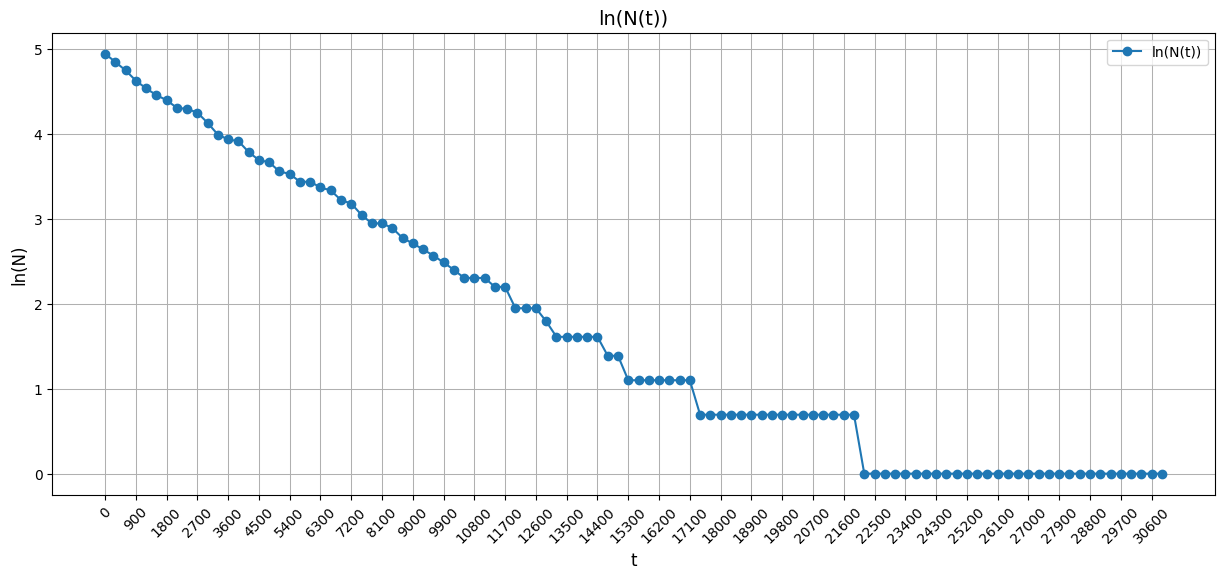

In [61]:
force = forces_data['force338']
force_value = 338
t, N = filter_data(force)
pend_var = []
tau_var = []
lambda_var = []
N0 = N[0]
ln_N = np.log(N)
plot_ln_N_vs_t(t, N)

In [62]:
t0 = 4
tend = 5
tau_frac = 0
N_cut_max = 14

<span style="color:darkblue;font-size: 18px;"><em>a) Finding classical exponential relaxation:</em></span>

tau_var: [0.596312496144413, 0.480608712988577, 0.435022146092382, 0.430761480862053, 0.429958235504548, 0.428595146982202, 0.42891887530945, 0.42893252355889, 0.42893252355889, 0.424736335912175, 0.422441235003214, 0.423042649482971, 0.42318438884615, 0.423003069889788]
lambda_var: [-1.676973074462998, -2.080694696069247, -2.298733544907018, -2.321470336666986, -2.325807293414254, -2.333204206909806, -2.331443211209895, -2.33136902677119, -2.33136902677119, -2.354401814604282, -2.36719315526192, -2.363827858070969, -2.363036128829304, -2.364049036950362]
pend_var: [array([-1.67697307e-04, -6.70180429e-01]), array([-2.08069470e-04, -2.96392519e-01]), array([-0.00022987, -0.14500394]), array([-0.00023215, -0.1312394 ]), array([-0.00023258, -0.12902152]), array([-0.00023332, -0.12488735]), array([-0.00023314, -0.12566219]), array([-0.00023314, -0.12552248]), array([-0.00023314, -0.12552248]), array([-0.00023544, -0.11638492]), array([-0.00023672, -0.11144136]), array([-0.00023638, -0.112

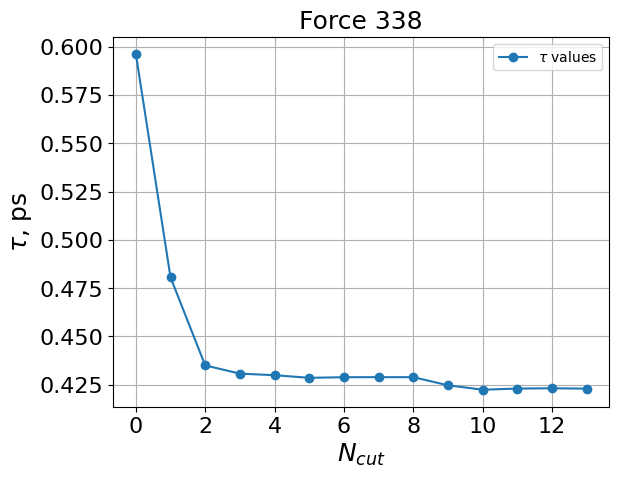

In [63]:
n = np.log(N / N0)
calculate_dissociation_rates(t, n, N, N_cut_max, tau_frac, tau_var, lambda_var, pend_var)
print("tau_var:", tau_var)
print("lambda_var:", lambda_var)
print("pend_var:", pend_var)

x_values = list(range(len(tau_var)))
y_values = tau_var
plot_tau(x_values, y_values, force_value)

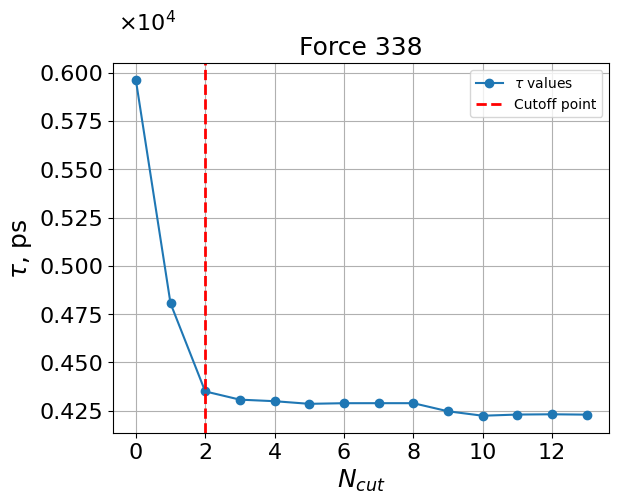

In [64]:
N_cut = 2

a = list(range(len(tau_var)))
plot_tau_with_cutoff(a, tau_var, N_cut, force_value)

<span style="color:darkblue;font-size: 18px;"><em>b) Initial non-classical (fractional) relaxation</em></span>

In [65]:
p, pinit = plot_init_part_ln_ln(force_value, n, t, t0, tend)
print(f"p: {p}, pinit: {pinit}")
print("t[t0:tend]:", t[t0:tend])
print("n[t0:tend]:", n[t0:tend])

p: -0.06304128905497113, pinit: [-0.06304129 -0.44696758]
t[t0:tend]: [1200.]
n[t0:tend]: [-0.40904293]


C:\Users\anast\Desktop\Ramd_calc\data_func.py:83: RankWarning: Polyfit may be poorly conditioned
  pinit = np.polyfit(np.log(filtered_t), np.log(-filtered_n), 1)


In [66]:
tau = tau_var[N_cut]
lambda_ = lambda_var[N_cut] * 1e-4
print(f"tau: {tau}, lambda: {lambda_}")

tau: 0.435022146092382, lambda: -0.0002298733544907018


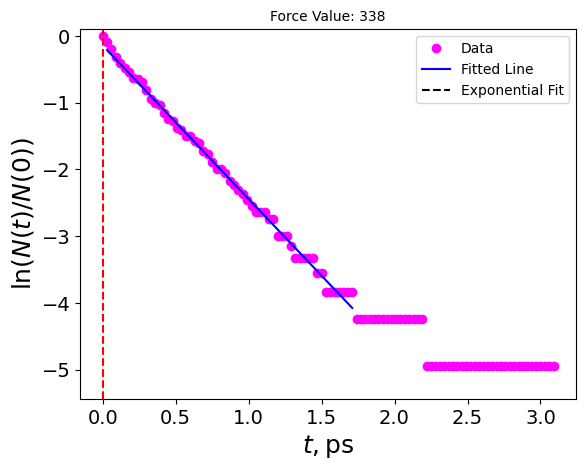

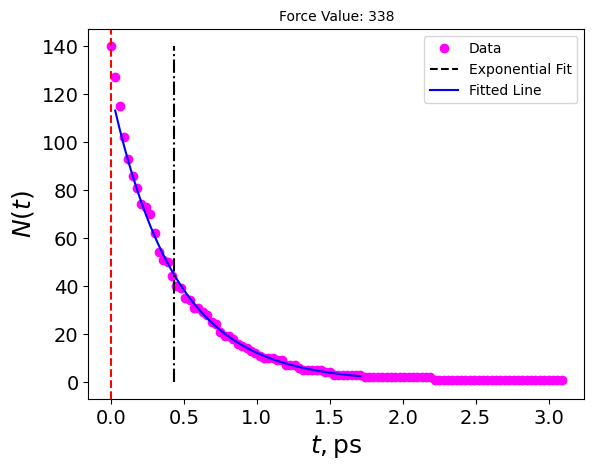

In [67]:
t_fit = t[(N > N_cut) & (t > tau_frac)]
n_fit = n[(N > N_cut) & (t > tau_frac)]

plot_lnN(force_value, t, t_fit, n, tau_frac, pend_var[N_cut], pinit)
plot_N(force_value, t, t_fit, N, N0, tau_frac, pend_var[N_cut], pinit)

In [68]:
tau_all.append(tau)
forces_all.append(force_value)

<p style="color: darkblue; font-size: 24px;"><strong><em> force 350 :</em></strong></p>

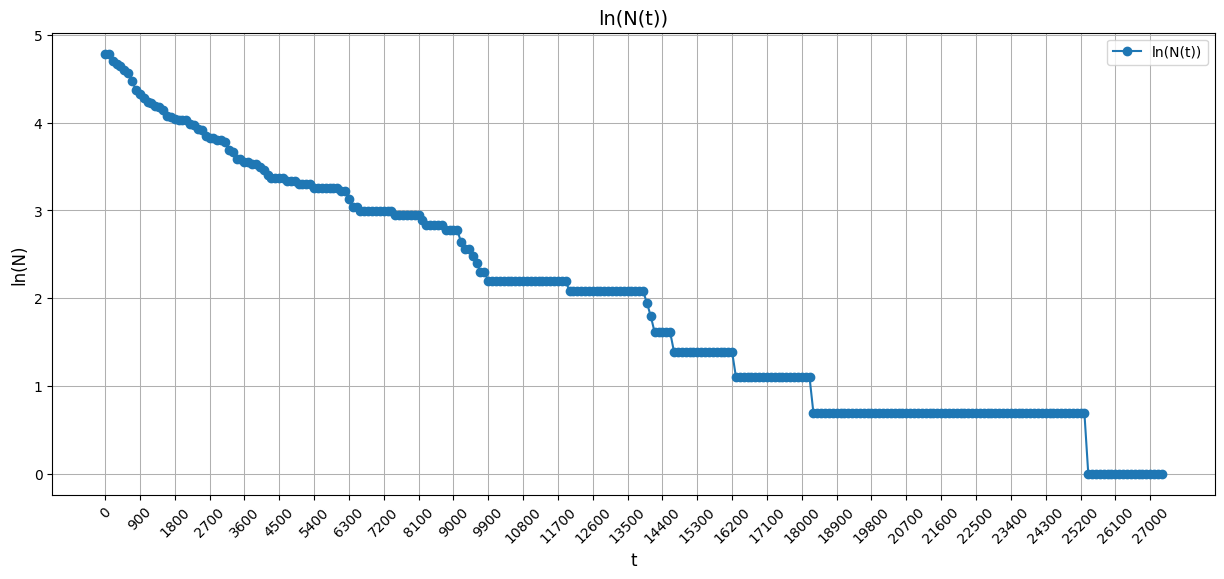

In [69]:
force = forces_data['force350']
force_value = 350
t, N = filter_data(force)
pend_var = []
tau_var = []
lambda_var = []
N0 = N[0]
ln_N = np.log(N)
plot_ln_N_vs_t(t, N)

<span style="color:darkblue;font-size: 18px;"><em>a) Finding classical exponential relaxation:</em></span>

In [70]:
t0 = 1
tend = 12
tau_frac = 1100
N_cut_max = 61 

tau_var: [0.63602299552684, 0.629321948792017, 0.5417265948831, 0.544905313745813, 0.558402038501784, 0.563497085699034, 0.56319275569991, 0.561283804341215, 0.517209565735631, 0.535345399554324, 0.545289485866198, 0.549211977235315, 0.551636325673166, 0.554057656701425, 0.554048118770498, 0.554048118770498, 0.542308251449981, 0.526363180576117, 0.52246205321914, 0.492059143439102, 0.470206145316575, 0.46941882822368, 0.46941882822368, 0.465929121310406, 0.465929121310406, 0.452255954545304, 0.406553033406598, 0.387733159176479, 0.377852291805684, 0.377029479046083, 0.380115145970226, 0.380115145970226, 0.379834217448531, 0.378981906863517, 0.379166319784731, 0.387355405743232, 0.412212624798856, 0.412212624798856, 0.412212624798856, 0.421717478567051, 0.434596680640627, 0.434596680640627, 0.434596680640627, 0.434596680640627, 0.428651377362126, 0.419906210470958, 0.430171425522405, 0.449017445687204, 0.449017445687204, 0.449017445687204, 0.448570703003678, 0.450143945213943, 0.4501439

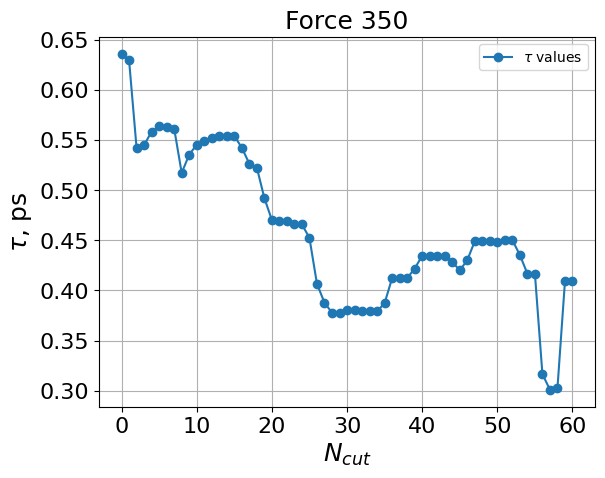

In [71]:
n = np.log(N / N0)
calculate_dissociation_rates(t, n, N, N_cut_max, tau_frac, tau_var, lambda_var, pend_var)
print("tau_var:", tau_var)
print("lambda_var:", lambda_var)
print("pend_var:", pend_var)

x_values = list(range(len(tau_var)))
y_values = tau_var
plot_tau(x_values, y_values, force_value)

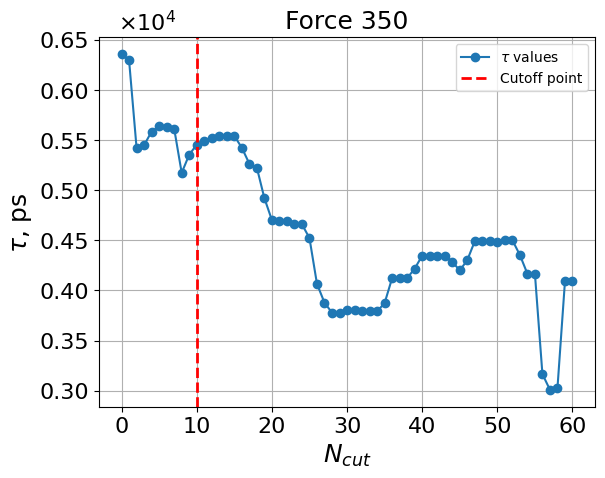

In [72]:
N_cut = 10

a = list(range(len(tau_var)))
plot_tau_with_cutoff(a, tau_var, N_cut, force_value)

<span style="color:darkblue;font-size: 18px;"><em>b) Initial non-classical (fractional) relaxation</em></span>

In [73]:
p, pinit = plot_init_part_ln_ln(force_value, n, t, t0, tend)
print(f"p: {p}, pinit: {pinit}")
print("t[t0:tend]:", t[t0:tend])
print("n[t0:tend]:", n[t0:tend])

p: 1.5606709503847291, pinit: [  1.56067095 -11.36371341]
t[t0:tend]: [ 100.  200.  300.  400.  500.  600.  700.  800.  900. 1000. 1100.]
n[t0:tend]: [-0.00836825 -0.08701138 -0.11466291 -0.14310084 -0.18232156 -0.22314355
 -0.31015493 -0.41804389 -0.4567584  -0.51082562 -0.55338524]


In [74]:
tau = tau_var[N_cut]
lambda_ = lambda_var[N_cut] * 1e-4
print(f"tau: {tau}, lambda: {lambda_}")

tau: 0.545289485866198, lambda: -0.0001833888284883193


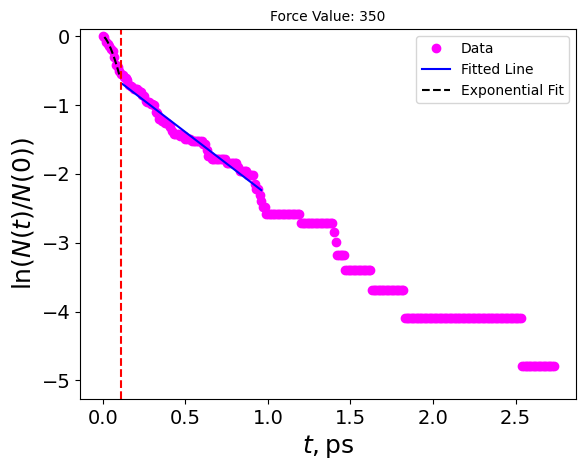

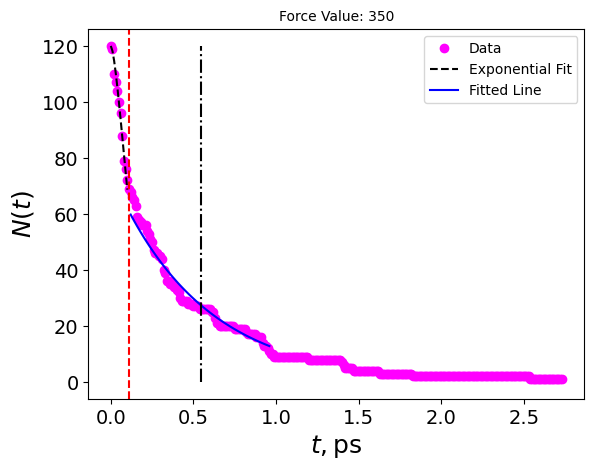

In [75]:
t_fit = t[(N > N_cut) & (t > tau_frac)]
n_fit = n[(N > N_cut) & (t > tau_frac)]

plot_lnN(force_value, t, t_fit, n, tau_frac, pend_var[N_cut], pinit)
plot_N(force_value, t, t_fit, N, N0, tau_frac, pend_var[N_cut], pinit)

In [76]:
tau_all.append(tau)
forces_all.append(force_value)

<p style="color: darkblue; font-size: 24px;"><strong><em> force 363 :</em></strong></p>

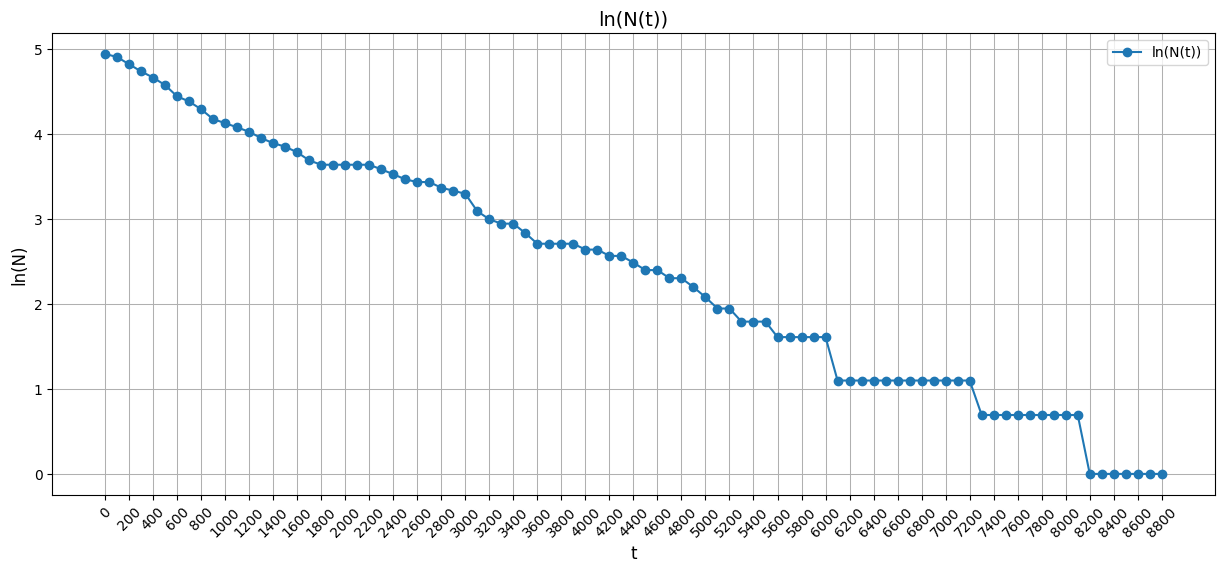

In [77]:
force = forces_data['force363']
force_value = 363
t, N = filter_data(force)
pend_var = []
tau_var = []
lambda_var = []
N0 = N[0]
ln_N = np.log(N)

plot_ln_N_vs_t(t, N)

In [78]:
t0 = 2
tend = 12
tau_frac = 1100
N_cut_max = 21 #+1

<span style="color:darkblue;font-size: 18px;"><em>a) Finding classical exponential relaxation:</em></span>

tau_var: [0.184170480299712, 0.188856271136457, 0.185105090807156, 0.19047341243453, 0.19047341243453, 0.193957032679306, 0.198882247866507, 0.202896923794309, 0.204445096820041, 0.204976810955123, 0.204911463235526, 0.204931994742939, 0.204613749614022, 0.203328926207924, 0.203069425180342, 0.218212475732662, 0.218212475732662, 0.225461007957574, 0.225461007957574, 0.242033606763769, 0.257588995653932]
lambda_var: [-5.429751816754982, -5.295032004933824, -5.402336562649215, -5.250076570890046, -5.250076570890046, -5.155781082985662, -5.028100852275236, -4.928610948354117, -4.891288739882238, -4.878600634580744, -4.88015645493975, -4.879667527046588, -4.887257097269248, -4.91813938454286, -4.924424241177233, -4.582689402347127, -4.582689402347127, -4.435356734447729, -4.435356734447729, -4.131657637842113, -3.882153418321834]
pend_var: [array([-0.00054298, -0.17785659]), array([-0.0005295 , -0.22565162]), array([-0.00054023, -0.18859976]), array([-0.00052501, -0.22825992]), array([-0.0

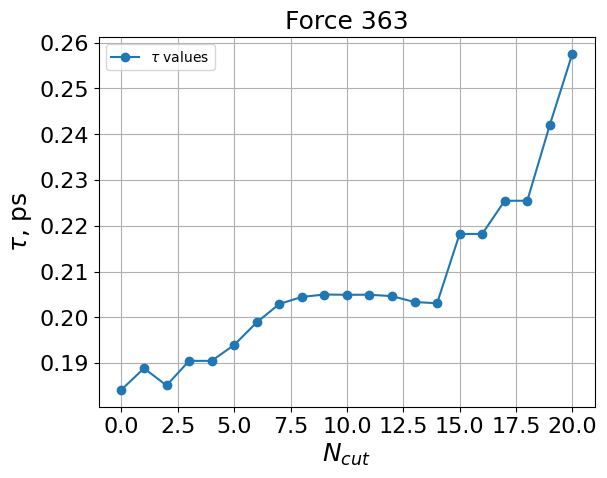

In [79]:
n = np.log(N / N0)
calculate_dissociation_rates(t, n, N, N_cut_max, tau_frac, tau_var, lambda_var, pend_var)
print("tau_var:", tau_var)
print("lambda_var:", lambda_var)
print("pend_var:", pend_var)

x_values = list(range(len(tau_var)))
y_values = tau_var
plot_tau(x_values, y_values, force_value)

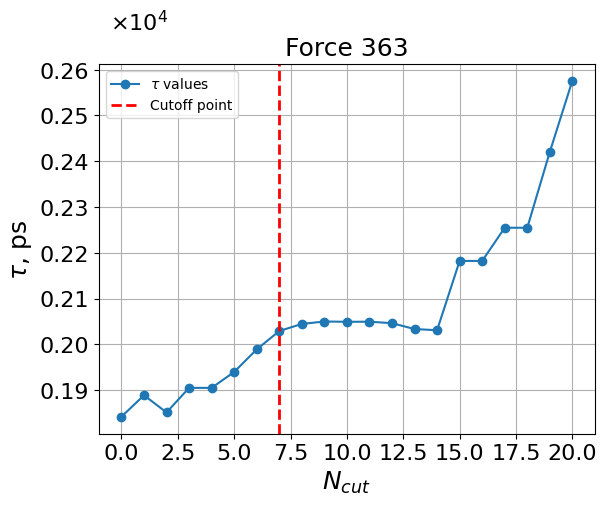

In [80]:
N_cut = 7

a = list(range(len(tau_var)))
plot_tau_with_cutoff(a, tau_var, N_cut, force_value)

<span style="color:darkblue;font-size: 18px;"><em>b) Initial non-classical (fractional) relaxation</em></span>

In [81]:
p, pinit = plot_init_part_ln_ln(force_value, n, t, t0, tend)
print(f"p: {p}, pinit: {pinit}")
print("t[t0:tend]:", t[t0:tend])
print("n[t0:tend]:", n[t0:tend])

p: 1.177188599911417, pinit: [ 1.1771886 -8.3109412]
t[t0:tend]: [ 200.  300.  400.  500.  600.  700.  800.  900. 1000. 1100.]
n[t0:tend]: [-0.12136086 -0.20544397 -0.27820333 -0.36693144 -0.49899117 -0.55961579
 -0.65118298 -0.76725515 -0.81450804 -0.86410498]


In [82]:
tau = tau_var[N_cut]
lambda_ = lambda_var[N_cut] * 1e-4
print(f"tau: {tau}, lambda: {lambda_}")

tau: 0.202896923794309, lambda: -0.0004928610948354117


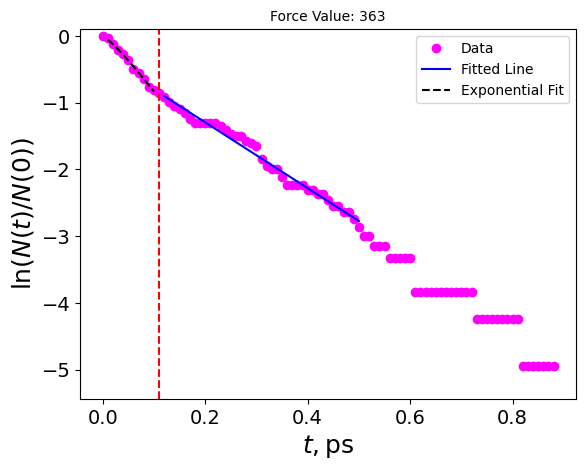

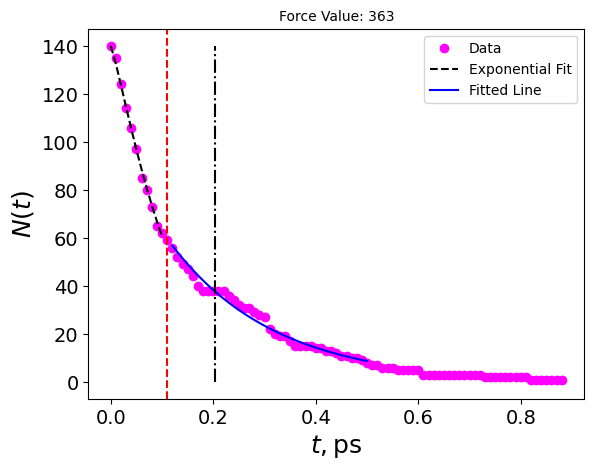

In [83]:
t_fit = t[(N > N_cut) & (t > tau_frac)]
n_fit = n[(N > N_cut) & (t > tau_frac)]

plot_lnN(force_value, t, t_fit, n, tau_frac, pend_var[N_cut], pinit)
plot_N(force_value, t, t_fit, N, N0, tau_frac, pend_var[N_cut], pinit)

In [84]:
tau_all.append(tau)
forces_all.append(force_value)

<p style="color: darkblue; font-size: 24px;"><strong><em> force 375 :</em></strong></p>

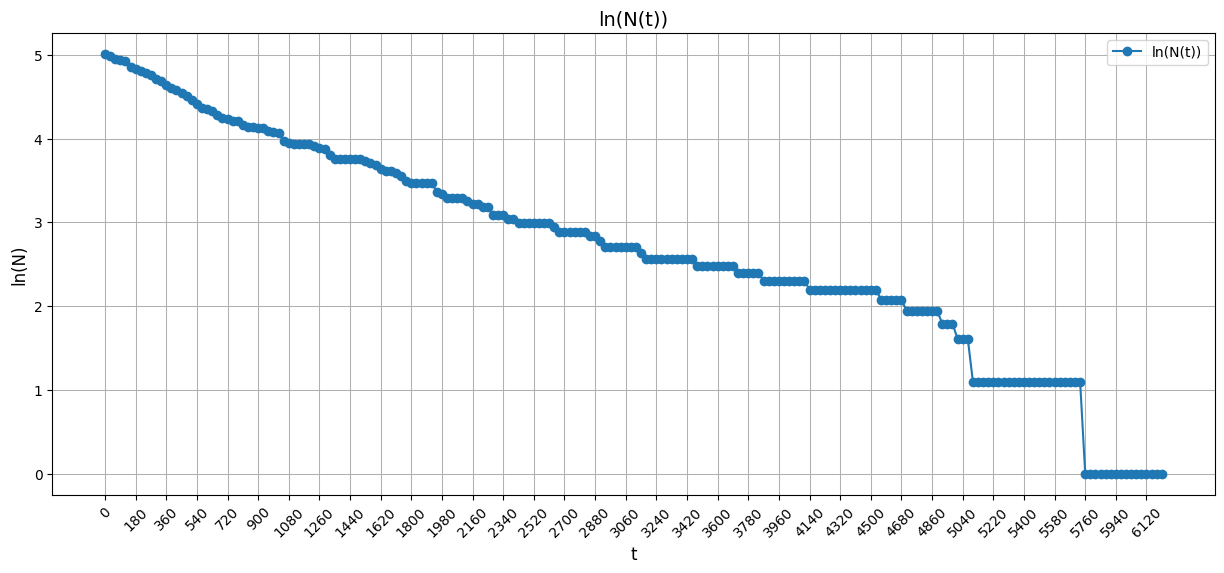

In [85]:
force = forces_data['force375']
force_value = 375
t, N = filter_data(force)
pend_var = []
tau_var = []
lambda_var = []
N0 = N[0]
ln_N = np.log(N)
plot_ln_N_vs_t(t, N)

In [86]:
t0 = 1
tend = 22
tau_frac = 630
N_cut_max = 61 #+1

<span style="color:darkblue;font-size: 18px;"><em>a) Finding classical exponential relaxation:</em></span>

tau_var: [0.144882733051436, 0.16469902617255, 0.16469902617255, 0.180151256559416, 0.180151256559416, 0.181093391722944, 0.180844391407868, 0.178260556532902, 0.175313156171018, 0.165984902670825, 0.160915437940241, 0.157917655431776, 0.152869544712381, 0.149094761337348, 0.148825080227426, 0.146875197258569, 0.146653069588605, 0.145660345906533, 0.143025694310277, 0.142645180467523, 0.141536305481475, 0.14231105281052, 0.144116224495642, 0.144116224495642, 0.144617305428767, 0.145276964529487, 0.145529141151991, 0.148122390684544, 0.149401753788095, 0.150518020767755, 0.150518020767755, 0.150518020767755, 0.152069216035559, 0.153635899532284, 0.153635899532284, 0.154025631458943, 0.154140726681885, 0.154581651376622, 0.15500397658, 0.15500397658, 0.153872933387772, 0.1522446956884, 0.150057679245855, 0.148718777804324, 0.148718777804324, 0.151147772437277, 0.151147772437277, 0.151147772437277, 0.149547613096699, 0.147404808273166, 0.144624069692602, 0.146477813954048, 0.1566079173805

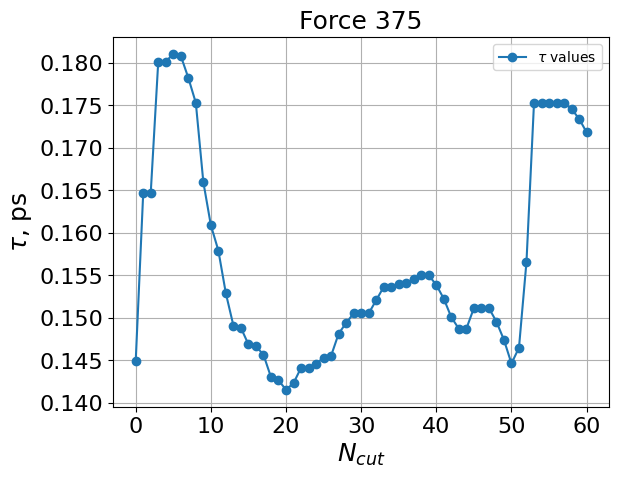

In [87]:
n = np.log(N / N0)
calculate_dissociation_rates(t, n, N, N_cut_max, tau_frac, tau_var, lambda_var, pend_var)
print("tau_var:", tau_var)
print("lambda_var:", lambda_var)
print("pend_var:", pend_var)

x_values = list(range(len(tau_var)))
y_values = tau_var
plot_tau(x_values, y_values, force_value)

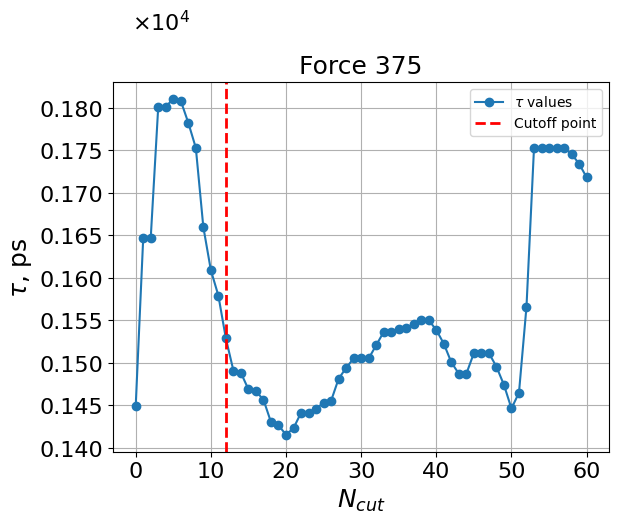

In [88]:
N_cut = 12

a = list(range(len(tau_var)))
plot_tau_with_cutoff(a, tau_var, N_cut, force_value)

<span style="color:darkblue;font-size: 18px;"><em>b) Initial non-classical (fractional) relaxation</em></span>

In [89]:
p, pinit = plot_init_part_ln_ln(force_value, n, t, t0, tend)
print(f"p: {p}, pinit: {pinit}")
print("t[t0:tend]:", t[t0:tend])
print("n[t0:tend]:", n[t0:tend])

p: 1.1298725319214458, pinit: [ 1.12987253 -7.64589616]
t[t0:tend]: [ 30.  60.  90. 120. 150. 180. 210. 240. 270. 300. 330. 360. 390. 420.
 450. 480. 510. 540. 570. 600. 630.]
n[t0:tend]: [-0.02020271 -0.0618754  -0.06899287 -0.09065437 -0.15860503 -0.18232156
 -0.20661425 -0.22314355 -0.2570451  -0.30110509 -0.32850407 -0.36624439
 -0.40546511 -0.43592432 -0.46734051 -0.49977579 -0.556288   -0.60391605
 -0.64118744 -0.65392647 -0.67990195]


In [90]:
tau = tau_var[N_cut]
lambda_ = lambda_var[N_cut] * 1e-4
print(f"tau: {tau}, lambda: {lambda_}")

tau: 0.152869544712381, lambda: -0.000654152533705432


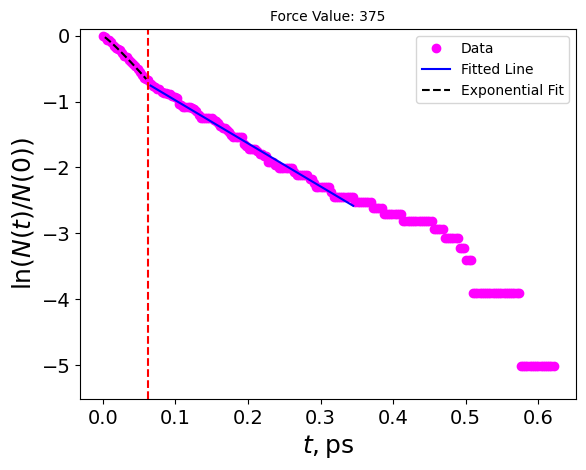

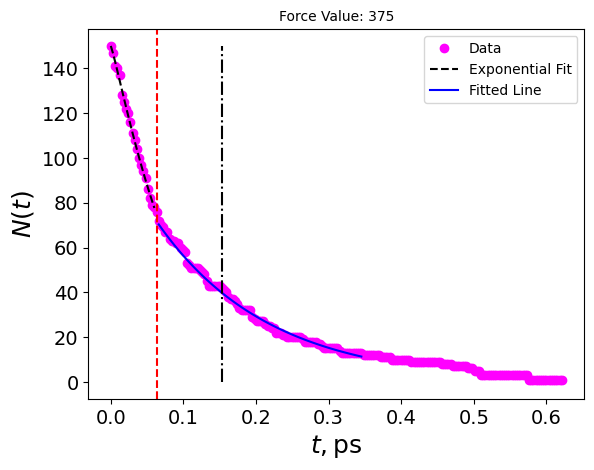

In [91]:
t_fit = t[(N > N_cut) & (t > tau_frac)]
n_fit = n[(N > N_cut) & (t > tau_frac)]

plot_lnN(force_value, t, t_fit, n, tau_frac, pend_var[N_cut], pinit)
plot_N(force_value, t, t_fit, N, N0, tau_frac, pend_var[N_cut], pinit)

In [92]:
tau_all.append(tau)
forces_all.append(force_value)

<p style="color: darkblue; font-size: 24px;"><strong><em> force 388 :</em></strong></p>

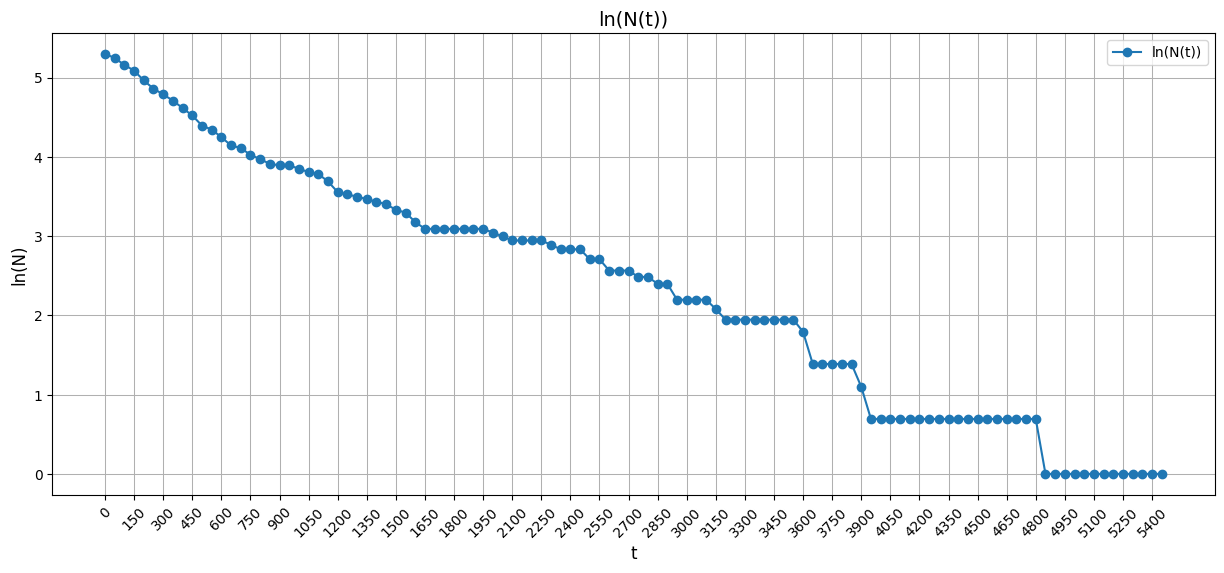

In [93]:
force = forces_data['force388']
force_value = 388
t, N = filter_data(force)
pend_var = []
tau_var = []
lambda_var = []
N0 = N[0]
ln_N = np.log(N)
plot_ln_N_vs_t(t, N)

In [94]:
t0 = 1 
tend = 22
tau_frac = 630
N_cut_max = 61

<span style="color:darkblue;font-size: 18px;"><em>a) Finding classical exponential relaxation:</em></span>

tau_var: [0.108882156574053, 0.11138757289191, 0.122848353848683, 0.124447233479162, 0.130789959984348, 0.130789959984348, 0.130843806271408, 0.132368261798142, 0.133068259761435, 0.135837407390435, 0.135837407390435, 0.135790764846183, 0.135379199790849, 0.135036382661079, 0.135036382661079, 0.133055086029402, 0.133055086029402, 0.126998110538689, 0.124745915443303, 0.115570382490763, 0.113415708634209, 0.110755615595654, 0.103395518158513, 0.103395518158513, 0.105327767134851, 0.105327767134851, 0.105327767134851, 0.104971667817596, 0.105023478100365, 0.105023478100365, 0.10392951320635, 0.103301435587011, 0.103540715926895, 0.1053867238324, 0.110377740372791, 0.122369821538264, 0.122369821538264, 0.122369821538264, 0.122369821538264, 0.122369821538264, 0.127086853715331, 0.127086853715331, 0.127086853715331, 0.127086853715331, 0.121280619792455, 0.116503536179693, 0.116503536179693, 0.107248537804841, 0.107248537804841, 0.082945508812816, 0.082774520893308, 0.082774520893308, 0.0827

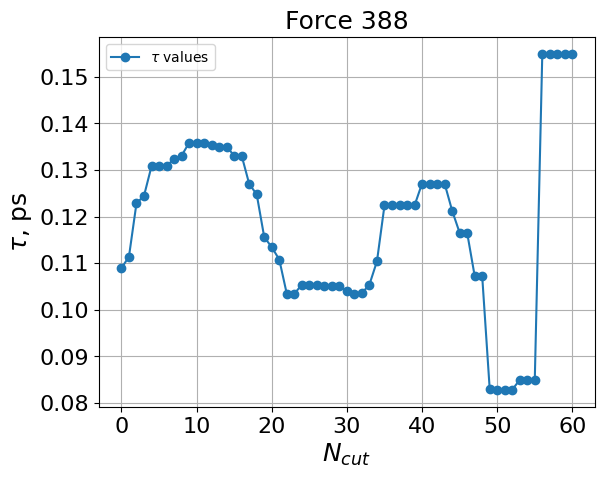

In [95]:
n = np.log(N / N0)
calculate_dissociation_rates(t, n, N, N_cut_max, tau_frac, tau_var, lambda_var, pend_var)
print("tau_var:", tau_var)
print("lambda_var:", lambda_var)
print("pend_var:", pend_var)

x_values = list(range(len(tau_var)))
y_values = tau_var
plot_tau(x_values, y_values, force_value)

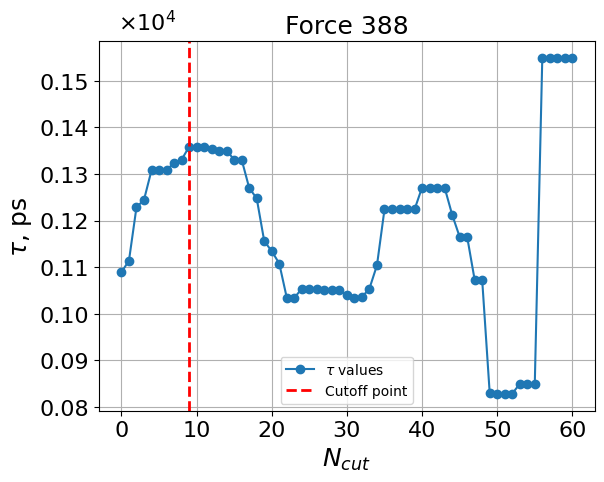

In [96]:
N_cut = 9

a = list(range(len(tau_var)))
plot_tau_with_cutoff(a, tau_var, N_cut, force_value)

<span style="color:darkblue;font-size: 18px;"><em>b) Initial non-classical (fractional) relaxation</em></span>

In [97]:
p, pinit = plot_init_part_ln_ln(force_value, n, t, t0, tend)
print(f"p: {p}, pinit: {pinit}")
print("t[t0:tend]:", t[t0:tend])
print("n[t0:tend]:", n[t0:tend])

p: 1.0834881378493182, pinit: [ 1.08348814 -6.94808015]
t[t0:tend]: [  50.  100.  150.  200.  250.  300.  350.  400.  450.  500.  550.  600.
  650.  700.  750.  800.  850.  900.  950. 1000. 1050.]
n[t0:tend]: [-0.05129329 -0.13926207 -0.21072103 -0.33547274 -0.43850496 -0.51082562
 -0.58878717 -0.68319685 -0.77652879 -0.90386821 -0.95451194 -1.04982212
 -1.15518264 -1.1874435  -1.27296568 -1.32802545 -1.38629436 -1.40649707
 -1.40649707 -1.44816976 -1.49165488]


In [98]:
tau = tau_var[N_cut]
lambda_ = lambda_var[N_cut] * 1e-4
print(f"tau: {tau}, lambda: {lambda_}")

tau: 0.135837407390435, lambda: -0.000736174238901452


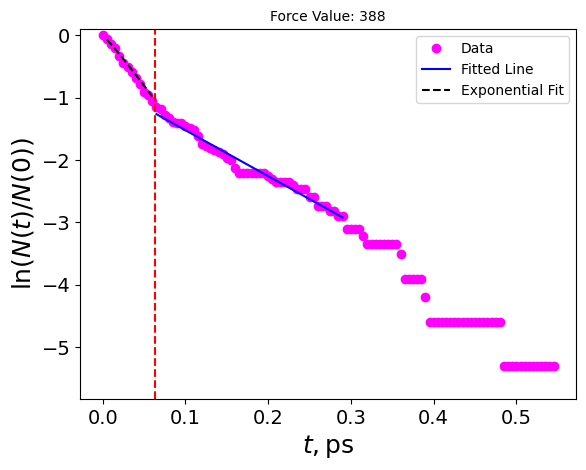

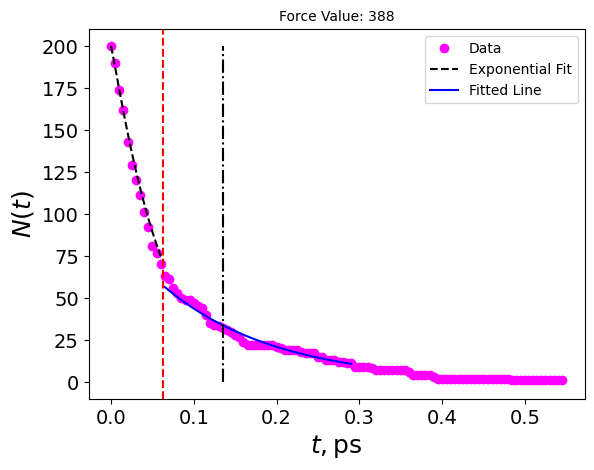

In [99]:
t_fit = t[(N > N_cut) & (t > tau_frac)]
n_fit = n[(N > N_cut) & (t > tau_frac)]

plot_lnN(force_value, t, t_fit, n, tau_frac, pend_var[N_cut], pinit)
plot_N(force_value, t, t_fit, N, N0, tau_frac, pend_var[N_cut], pinit)

In [100]:
tau_all.append(tau)
forces_all.append(force_value)

<p style="color: darkblue; font-size: 24px;"><strong><em> force 400 :</em></strong></p>

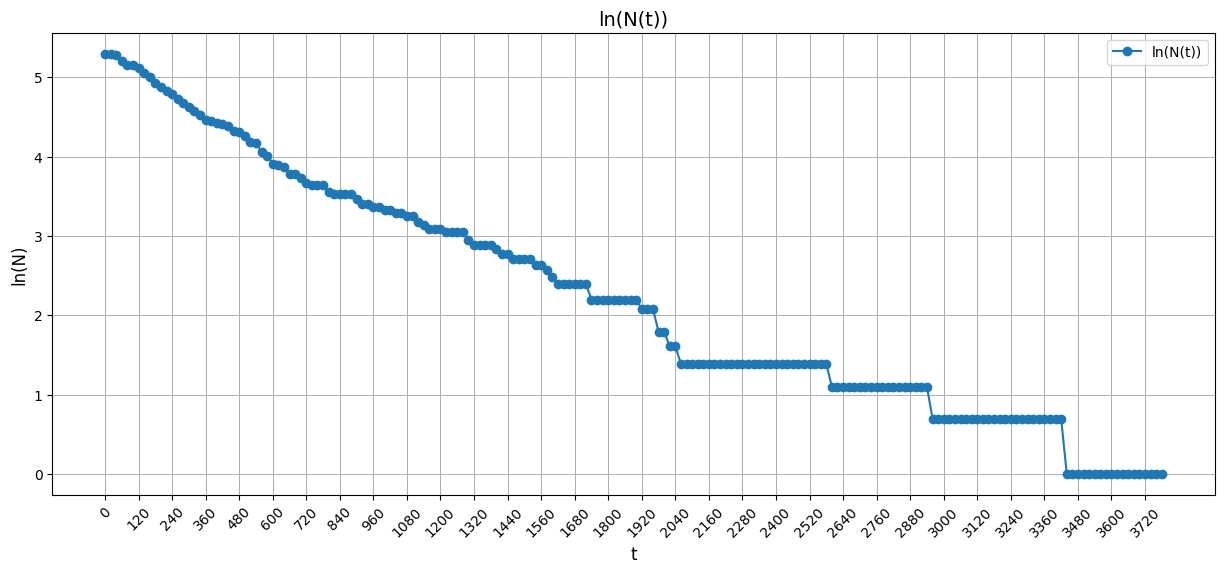

In [101]:
force = forces_data['force400']
force_value = 400
t, N = filter_data(force)
pend_var = []
tau_var = []
lambda_var = []
N0 = N[0]
ln_N = np.log(N)
plot_ln_N_vs_t(t, N)

In [102]:
t0 = 4 
tend = 25
tau_frac = 480
N_cut_max = 61

<span style="color:darkblue;font-size: 18px;"><em>a) Finding classical exponential relaxation:</em></span>

tau_var: [0.079719197539336, 0.07971212655109, 0.073881737633145, 0.068567163490597, 0.069039982497598, 0.070387647945592, 0.071308834203275, 0.071308834203275, 0.070965457026665, 0.071108674626432, 0.071108674626432, 0.071748990070843, 0.071973915928764, 0.071941832113612, 0.071479220318942, 0.070581691137119, 0.070262225439552, 0.069938946786918, 0.068634374832402, 0.068365907104144, 0.068365907104144, 0.065523981749645, 0.064283765085415, 0.063945769778649, 0.063396074986452, 0.063396074986452, 0.061005317989808, 0.058542508617414, 0.056096108208261, 0.053806893190967, 0.051917043944961, 0.051917043944961, 0.050448127239392, 0.050448127239392, 0.043610061753132, 0.042644291388672, 0.042644291388672, 0.042644291388672, 0.037633024305589, 0.037215587145684, 0.037215587145684, 0.037215587145684, 0.035630309405738, 0.035630309405738, 0.033137879667495, 0.033137879667495, 0.033137879667495, 0.033137879667495, 0.030519435982962, 0.028995192867874, 0.031254633738858, 0.031254633738858, 0.0

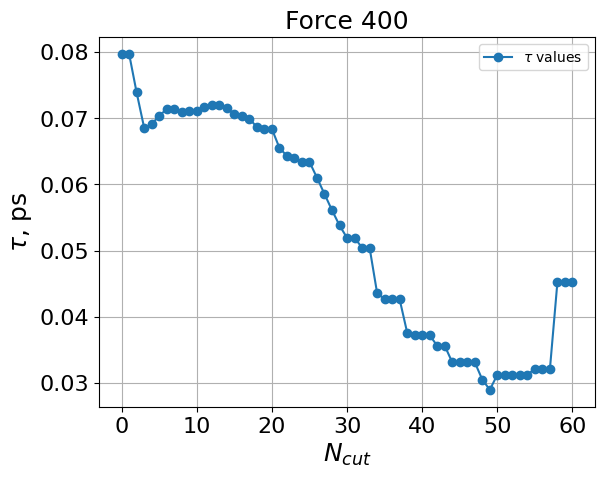

In [103]:
n = np.log(N / N0)
calculate_dissociation_rates(t, n, N, N_cut_max, tau_frac, tau_var, lambda_var, pend_var)
print("tau_var:", tau_var)
print("lambda_var:", lambda_var)
print("pend_var:", pend_var)

x_values = list(range(len(tau_var)))
y_values = tau_var
plot_tau(x_values, y_values, force_value)

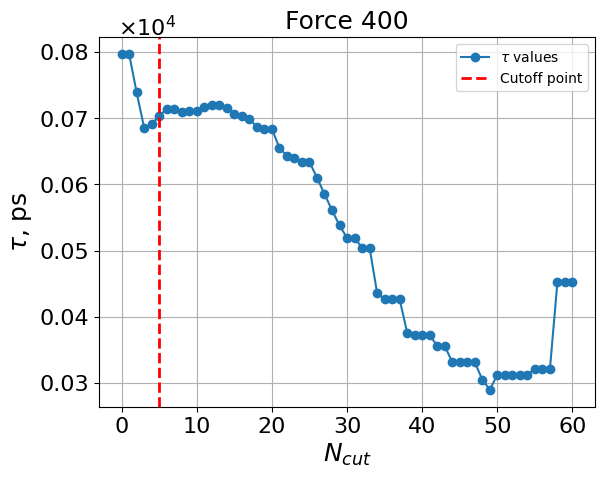

In [104]:
N_cut = 5

a = list(range(len(tau_var)))
plot_tau_with_cutoff(a, tau_var, N_cut, force_value)

<span style="color:darkblue;font-size: 18px;"><em>b) Initial non-classical (fractional) relaxation</em></span>

In [105]:
p, pinit = plot_init_part_ln_ln(force_value, n, t, t0, tend)
print(f"p: {p}, pinit: {pinit}")
print("t[t0:tend]:", t[t0:tend])
print("n[t0:tend]:", n[t0:tend])

p: 1.2061133362418568, pinit: [ 1.20611334 -7.34066021]
t[t0:tend]: [ 80. 100. 120. 140. 160. 180. 200. 220. 240. 260. 280. 300. 320. 340.
 360. 380. 400. 420. 440. 460. 480.]
n[t0:tend]: [-0.13926207 -0.13926207 -0.18032355 -0.24207156 -0.29437106 -0.37106368
 -0.41551544 -0.47000363 -0.50252682 -0.57092955 -0.62548853 -0.67334455
 -0.72360639 -0.77652879 -0.83240925 -0.84397007 -0.86750057 -0.89159812
 -0.91629073 -0.96758403 -0.98082925]


In [106]:
tau = tau_var[N_cut]
lambda_ = lambda_var[N_cut] * 1e-4
print(f"tau: {tau}, lambda: {lambda_}")

tau: 0.070387647945592, lambda: -0.001420703815494702


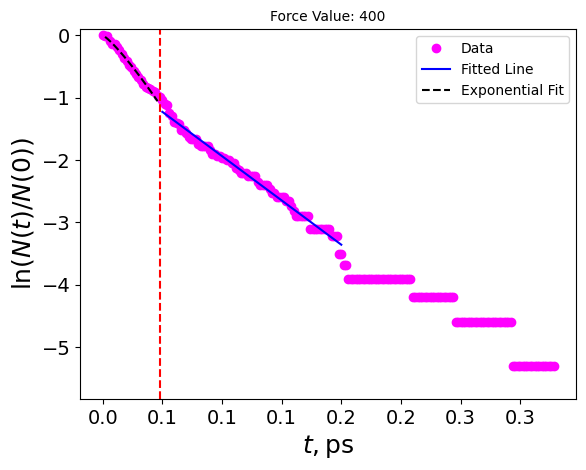

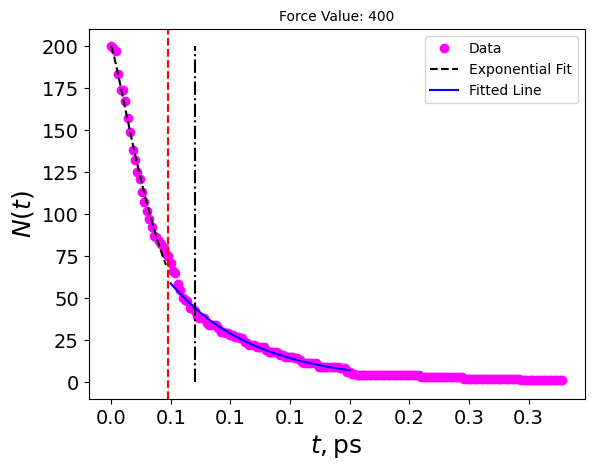

In [107]:
t_fit = t[(N > N_cut) & (t > tau_frac)]
n_fit = n[(N > N_cut) & (t > tau_frac)]

plot_lnN(force_value, t, t_fit, n, tau_frac, pend_var[N_cut], pinit)
plot_N(force_value, t, t_fit, N, N0, tau_frac, pend_var[N_cut], pinit)

In [108]:
tau_all.append(tau)
forces_all.append(force_value)

<p style="color: darkblue; font-size: 24px;"><strong><em> force 413 :</em></strong></p>

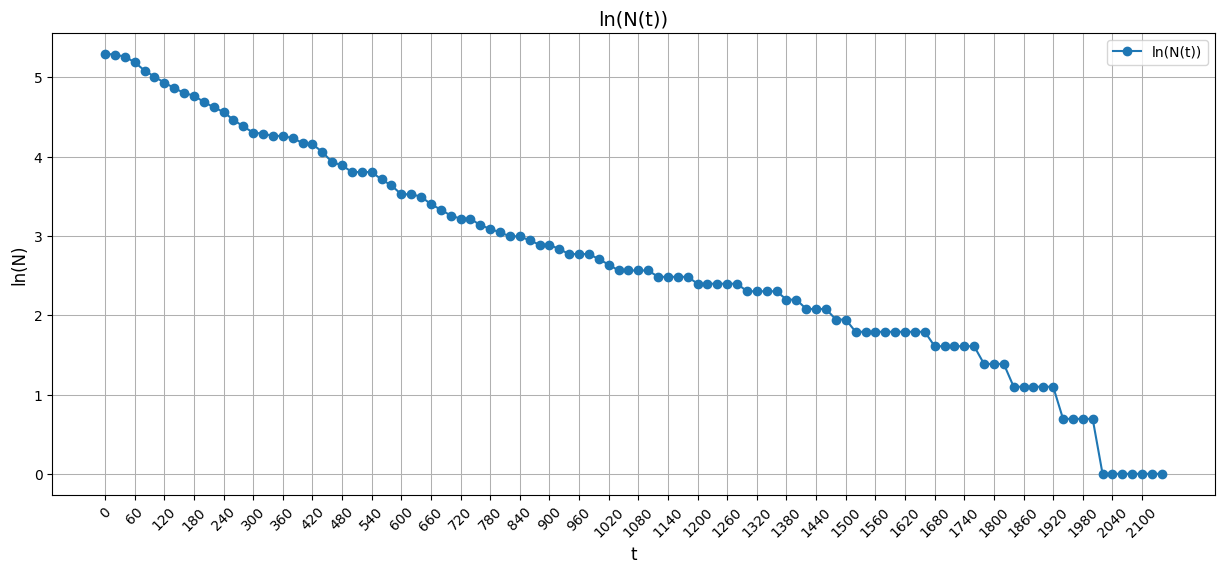

In [109]:
force = forces_data['force413']
force_value = 413
t, N = filter_data(force)
pend_var = []
tau_var = []
lambda_var = []
N0 = N[0]
ln_N = np.log(N)
plot_ln_N_vs_t(t, N)

<span style="color:darkblue;font-size: 18px;"><em>a) Finding classical exponential relaxation:</em></span>

In [110]:
t0 = 4 
tend = 25
tau_frac = 480
N_cut_max = 21

tau_var: [0.048563122701621, 0.054480296772479, 0.056845916851619, 0.058520437264953, 0.058815762354467, 0.058116545126649, 0.05729860352582, 0.0571793786907, 0.056259356586569, 0.055157788126679, 0.052096538921564, 0.048129796279835, 0.045328830333479, 0.043414267691613, 0.043034559329822, 0.042362455363079, 0.040236544927272, 0.039593993508517, 0.038184220030162, 0.037486738068809, 0.03624699765101]
lambda_var: [-20.591756550420794, -18.35525977724047, -17.591412987677536, -17.08804729999653, -17.00224497598559, -17.20680398018795, -17.45243231886761, -17.48882241986735, -17.77482112617583, -18.12980603397903, -19.195133125937446, -20.777150066994288, -22.061014869413363, -23.033902289987935, -23.237138141368664, -23.605808290129428, -24.85302855420382, -25.25635611333022, -26.1888287677497, -26.676100709654634, -27.588491869812657]
pend_var: [array([-0.00205918, -0.44809645]), array([-0.00183553, -0.67542238]), array([-0.00175914, -0.75041664]), array([-0.0017088 , -0.79820237]), ar

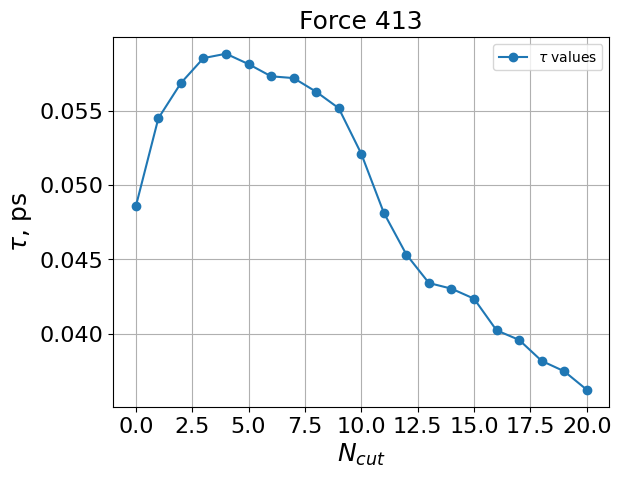

In [111]:
n = np.log(N / N0)
calculate_dissociation_rates(t, n, N, N_cut_max, tau_frac, tau_var, lambda_var, pend_var)
print("tau_var:", tau_var)
print("lambda_var:", lambda_var)
print("pend_var:", pend_var)

x_values = list(range(len(tau_var)))
y_values = tau_var
plot_tau(x_values, y_values, force_value)

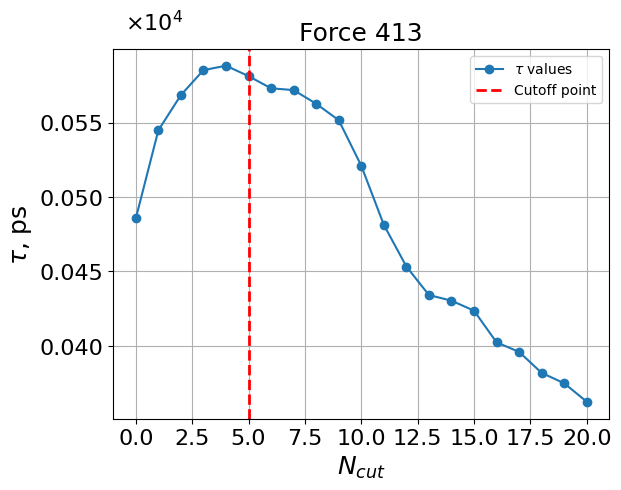

In [112]:
N_cut = 5

a = list(range(len(tau_var)))
plot_tau_with_cutoff(a, tau_var, N_cut, force_value)

<span style="color:darkblue;font-size: 18px;"><em>b) Initial non-classical (fractional) relaxation</em></span>

In [113]:
p, pinit = plot_init_part_ln_ln(force_value, n, t, t0, tend)
print(f"p: {p}, pinit: {pinit}")
print("t[t0:tend]:", t[t0:tend])
print("n[t0:tend]:", n[t0:tend])

p: 1.0027189992948808, pinit: [ 1.002719   -5.83072584]
t[t0:tend]: [ 80. 100. 120. 140. 160. 180. 200. 220. 240. 260. 280. 300. 320. 340.
 360. 380. 400. 420. 440. 460. 480.]
n[t0:tend]: [-0.21072103 -0.28768207 -0.36384343 -0.43078292 -0.49429632 -0.52763274
 -0.60696948 -0.67334455 -0.73396918 -0.83240925 -0.91629073 -0.99425227
 -1.00785793 -1.03563749 -1.03563749 -1.06421086 -1.1239301  -1.13943428
 -1.23787436 -1.36649173 -1.40649707]


In [114]:
tau = tau_var[N_cut]
lambda_ = lambda_var[N_cut] * 1e-4
print(f"tau: {tau}, lambda: {lambda_}")

tau: 0.058116545126649, lambda: -0.001720680398018795


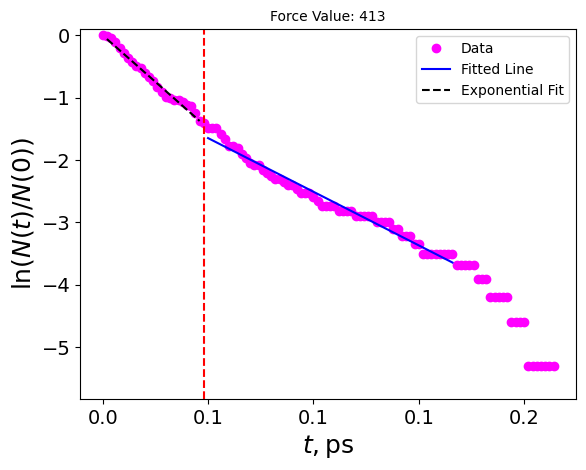

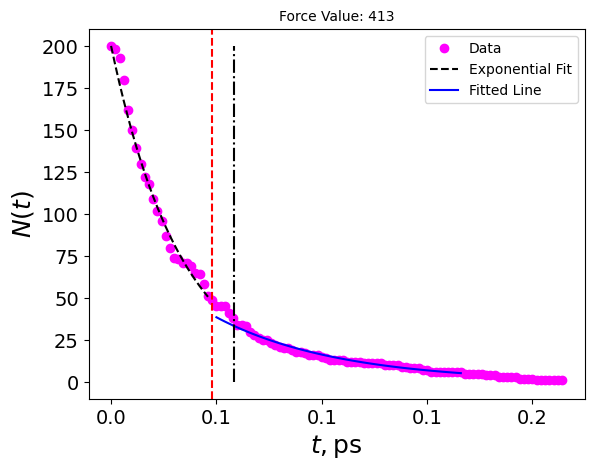

In [115]:
t_fit = t[(N > N_cut) & (t > tau_frac)]
n_fit = n[(N > N_cut) & (t > tau_frac)]

plot_lnN(force_value, t, t_fit, n, tau_frac, pend_var[N_cut], pinit)
plot_N(force_value, t, t_fit, N, N0, tau_frac, pend_var[N_cut], pinit)

In [116]:
tau_all.append(tau)
forces_all.append(force_value)

<p style="color: darkblue; font-size: 24px;"><strong><em> force 425 :</em></strong></p>

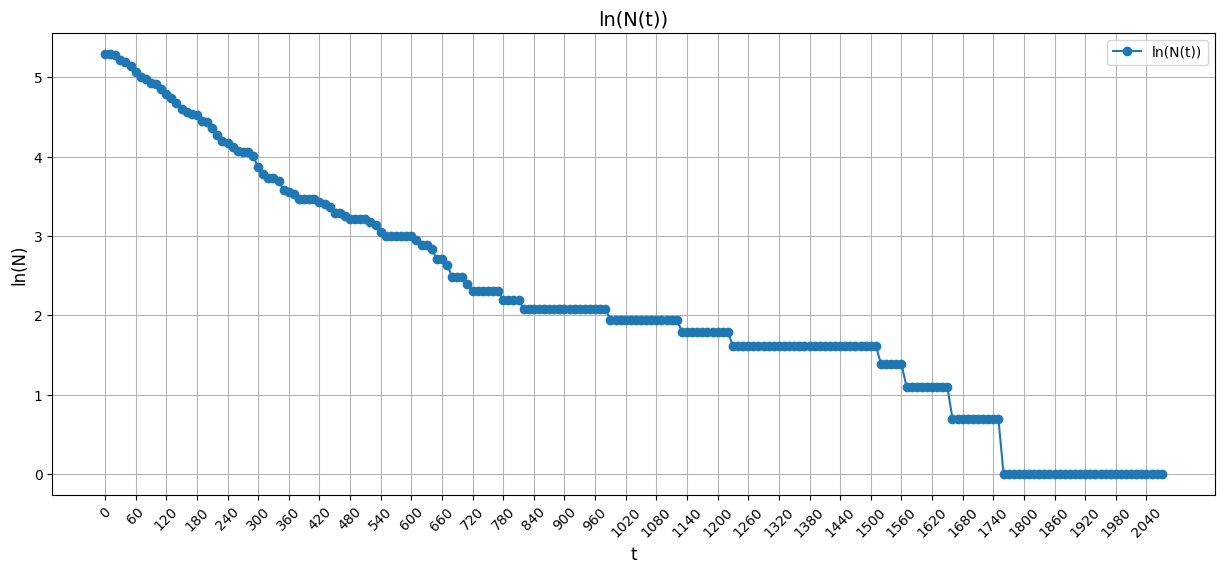

In [117]:
force = forces_data['force425']
force_value = 425
t, N = filter_data(force)
pend_var = []
tau_var = []
lambda_var = []
N0 = N[0]
ln_N = np.log(N)
plot_ln_N_vs_t(t, N)

<span style="color:darkblue;font-size: 18px;"><em>a) Finding classical exponential relaxation:</em></span>

In [118]:
t0 = 4
tend = 22
tau_frac = 210
N_cut_max = 61

tau_var: [0.047077437011123, 0.051093432124151, 0.051920791804944, 0.051163133550553, 0.049909373808838, 0.040456381484195, 0.037353060116989, 0.032743159159692, 0.029092129276053, 0.02897691276074, 0.029573903968989, 0.029787231005646, 0.030462911290779, 0.030462911290779, 0.030514214867049, 0.030512239811622, 0.030512239811622, 0.030267693220915, 0.029621309625307, 0.029221040024117, 0.027257727398007, 0.027092913337621, 0.027092913337621, 0.026646728912184, 0.026100850050794, 0.024088938578443, 0.023690881076856, 0.022927681911098, 0.022927681911098, 0.022364930599948, 0.021738757740179, 0.021049452562435, 0.019374465058693, 0.019374465058693, 0.01927973809177, 0.019420256041379, 0.019992700366107, 0.019992700366107, 0.019992700366107, 0.019992700366107, 0.019924993384327, 0.019924993384327, 0.021101987733754, 0.021101987733754, 0.023918498881278, 0.023918498881278, 0.023918498881278, 0.023918498881278, 0.028018601550552, 0.028018601550552, 0.028018601550552, 0.028018601550552, 0.02

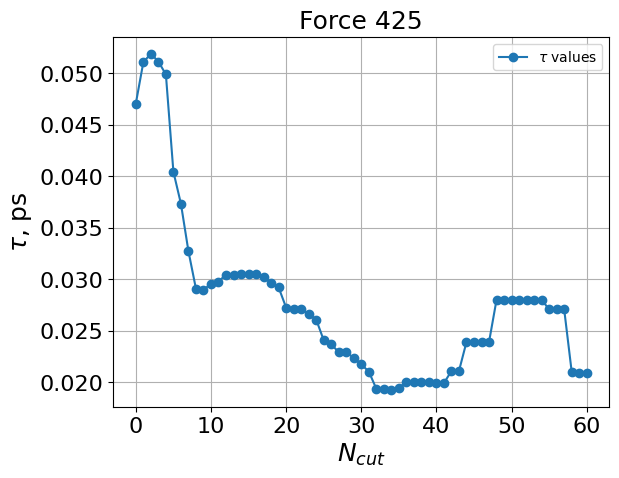

In [119]:
n = np.log(N / N0)
calculate_dissociation_rates(t, n, N, N_cut_max, tau_frac, tau_var, lambda_var, pend_var)
print("tau_var:", tau_var)
print("lambda_var:", lambda_var)
print("pend_var:", pend_var)

x_values = list(range(len(tau_var)))
y_values = tau_var
plot_tau(x_values, y_values, force_value)

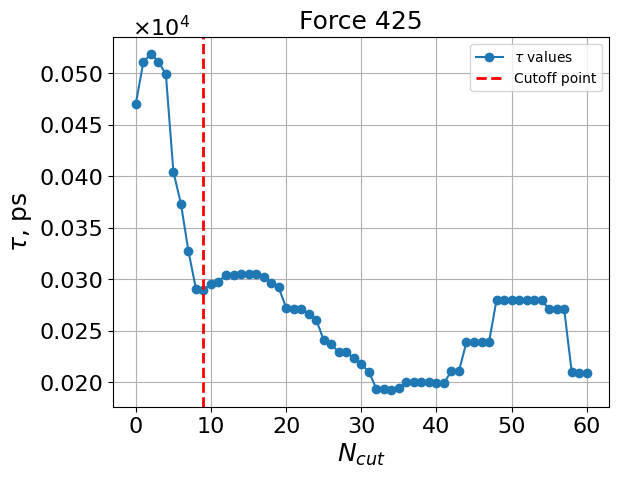

In [120]:
N_cut = 9

a = list(range(len(tau_var)))
plot_tau_with_cutoff(a, tau_var, N_cut, force_value)

<span style="color:darkblue;font-size: 18px;"><em>b) Initial non-classical (fractional) relaxation</em></span>

In [121]:
p, pinit = plot_init_part_ln_ln(force_value, n, t, t0, tend)
print(f"p: {p}, pinit: {pinit}")
print("t[t0:tend]:", t[t0:tend])
print("n[t0:tend]:", n[t0:tend])

p: 1.253084549838833, pinit: [ 1.25308455 -6.70521012]
t[t0:tend]: [ 40.  50.  60.  70.  80.  90. 100. 110. 120. 130. 140. 150. 160. 170.
 180. 190. 200. 210.]
n[t0:tend]: [-0.09982034 -0.15665381 -0.23572233 -0.28768207 -0.31471074 -0.36384343
 -0.38566248 -0.43850496 -0.50252682 -0.55338524 -0.62548853 -0.69314718
 -0.73396918 -0.75502258 -0.77652879 -0.84397007 -0.85566611 -0.94160854]


In [122]:
tau = tau_var[N_cut]
lambda_ = lambda_var[N_cut] * 1e-4
print(f"tau: {tau}, lambda: {lambda_}")

tau: 0.02897691276074, lambda: -0.0034510232620601025


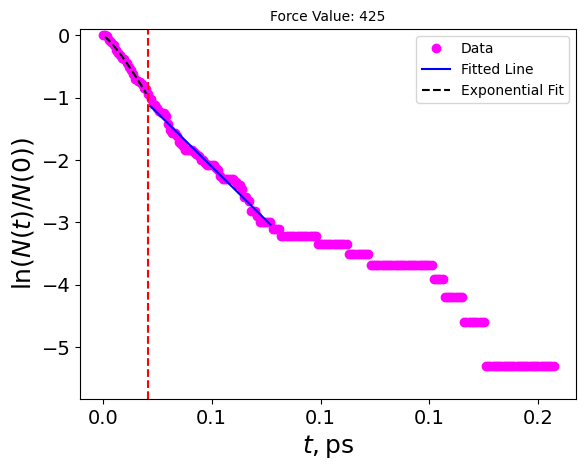

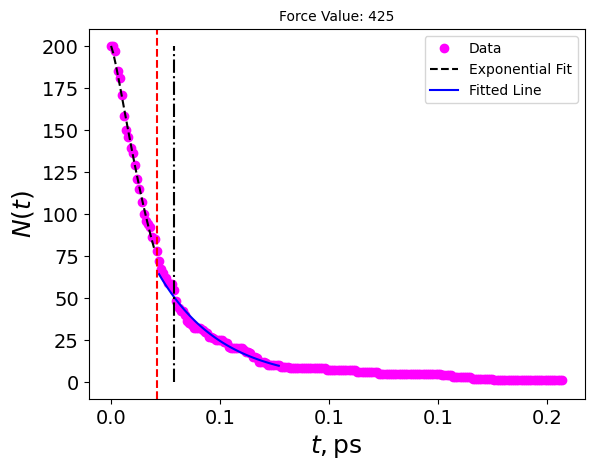

In [123]:
t_fit = t[(N > N_cut) & (t > tau_frac)]
n_fit = n[(N > N_cut) & (t > tau_frac)]

plot_lnN(force_value, t, t_fit, n, tau_frac, pend_var[N_cut], pinit)
plot_N(force_value, t, t_fit, N, N0, tau_frac, pend_var[N_cut], pinit)

In [124]:
tau_all.append(tau)
forces_all.append(force_value)

<p style="color: darkblue; font-size: 24px;"><strong><em> force 438 :</em></strong></p>

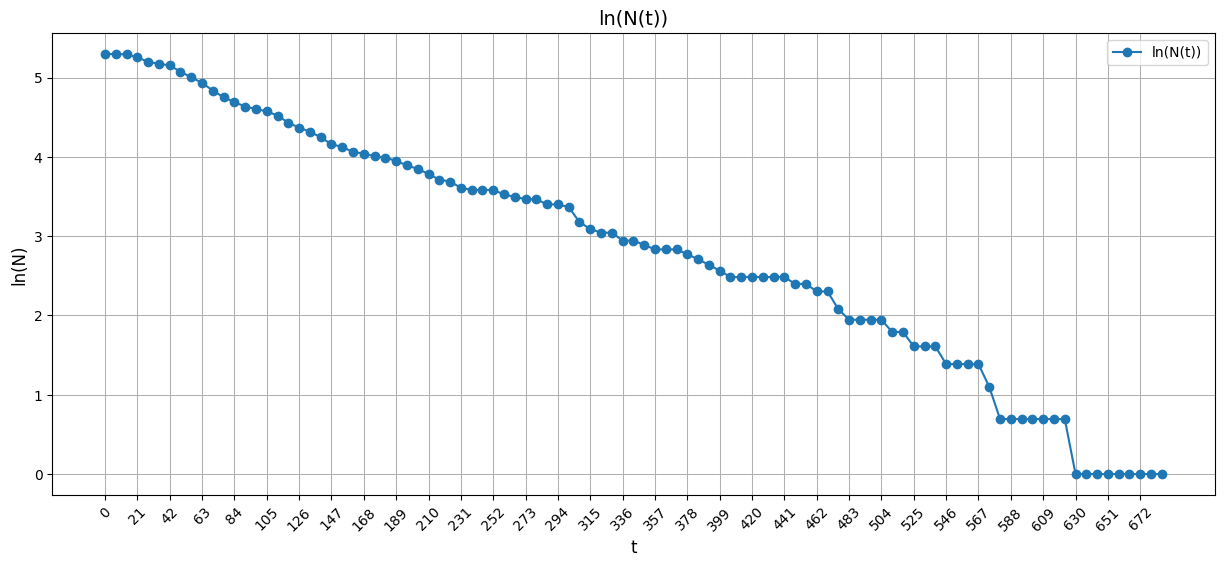

In [125]:
force = forces_data['force438']
force_value = 438
t, N = filter_data(force)
pend_var = []
tau_var = []
lambda_var = []
N0 = N[0]
ln_N = np.log(N)
plot_ln_N_vs_t(t, N)

<span style="color:darkblue;font-size: 18px;"><em>a) Finding classical exponential relaxation:</em></span>

In [126]:
t0 = 4 
tend = 16
tau_frac = 105
N_cut_max = 31

tau_var: [0.012807775221028, 0.013946086498998, 0.015030131603625, 0.015170268211945, 0.015511319699077, 0.01576120104903, 0.015884102365681, 0.016152496178985, 0.016223160353815, 0.016223160353815, 0.016095005711285, 0.015918575302306, 0.015746692920435, 0.015807351610621, 0.015836954370233, 0.015835451668761, 0.015802682078732, 0.015817394560669, 0.015887704988849, 0.0161272202074, 0.0161272202074, 0.016416089583811, 0.016669143178101, 0.016669143178101, 0.016845258170986, 0.016845258170986, 0.016845258170986, 0.016845258170986, 0.016845258170986, 0.016559073430832, 0.016020166023732]
lambda_var: [-78.07757262620909, -71.70470368671639, -66.53301690045252, -65.91841264959388, -64.46904708304768, -63.44694144115127, -62.95602842251682, -61.909935710185934, -61.64027095774013, -61.64027095774013, -62.13107456674236, -62.81969215267288, -63.505397930397066, -63.26170408761379, -63.143454014086075, -63.149445997344465, -63.28039727799598, -63.22153728696784, -62.94175280204676, -62.00696

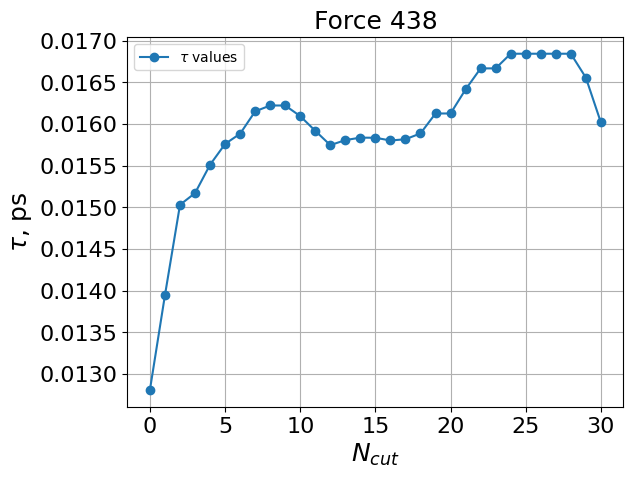

In [127]:
n = np.log(N / N0)
calculate_dissociation_rates(t, n, N, N_cut_max, tau_frac, tau_var, lambda_var, pend_var)
print("tau_var:", tau_var)
print("lambda_var:", lambda_var)
print("pend_var:", pend_var)

x_values = list(range(len(tau_var)))
y_values = tau_var
plot_tau(x_values, y_values, force_value)

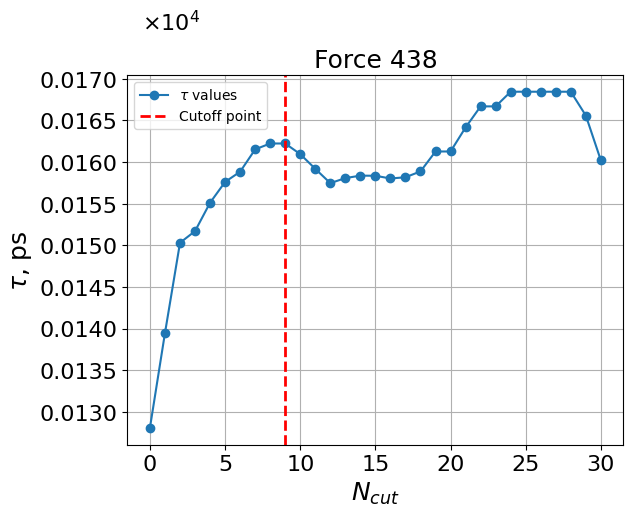

In [128]:
N_cut = 9

a = list(range(len(tau_var)))
plot_tau_with_cutoff(a, tau_var, N_cut, force_value)

<span style="color:darkblue;font-size: 18px;"><em>b) Initial non-classical (fractional) relaxation</em></span>

In [129]:
p, pinit = plot_init_part_ln_ln(force_value, n, t, t0, tend)
print(f"p: {p}, pinit: {pinit}")
print("t[t0:tend]:", t[t0:tend])
print("n[t0:tend]:", n[t0:tend])

p: 1.6806595871200756, pinit: [ 1.68065959 -8.01443661]
t[t0:tend]: [ 28.  35.  42.  49.  56.  63.  70.  77.  84.  91.  98. 105.]
n[t0:tend]: [-0.09982034 -0.12216763 -0.14502577 -0.22314355 -0.29437106 -0.36384343
 -0.46203546 -0.54472718 -0.60696948 -0.66358838 -0.69314718 -0.72360639]


In [130]:
tau = tau_var[N_cut]
lambda_ = lambda_var[N_cut] * 1e-4
print(f"tau: {tau}, lambda: {lambda_}")

tau: 0.016223160353815, lambda: -0.006164027095774013


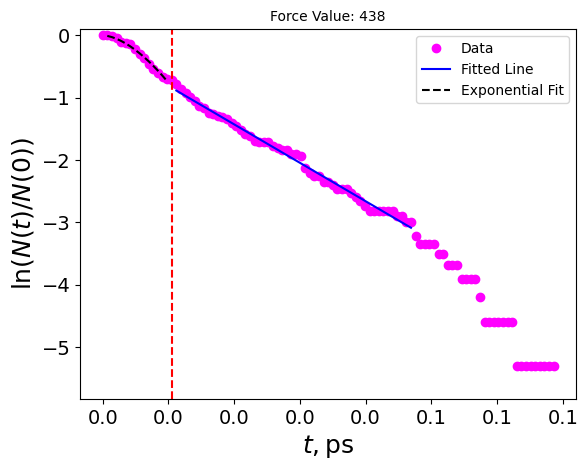

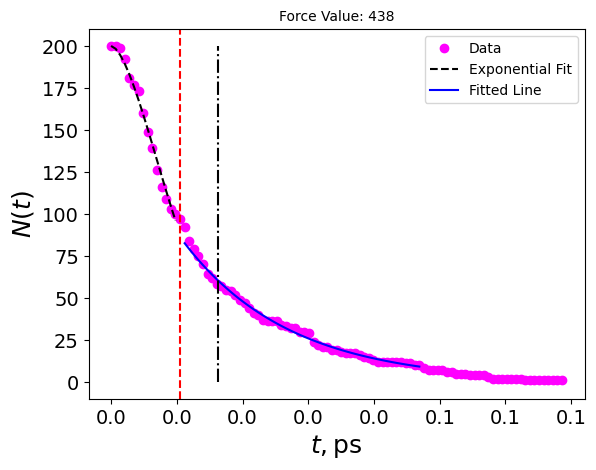

In [131]:
t_fit = t[(N > N_cut) & (t > tau_frac)]
n_fit = n[(N > N_cut) & (t > tau_frac)]

plot_lnN(force_value, t, t_fit, n, tau_frac, pend_var[N_cut], pinit)
plot_N(force_value, t, t_fit, N, N0, tau_frac, pend_var[N_cut], pinit)

In [132]:
tau_all.append(tau)
forces_all.append(force_value)

<p style="color: darkblue; font-size: 24px;"><strong><em> force 450 :</em></strong></p>

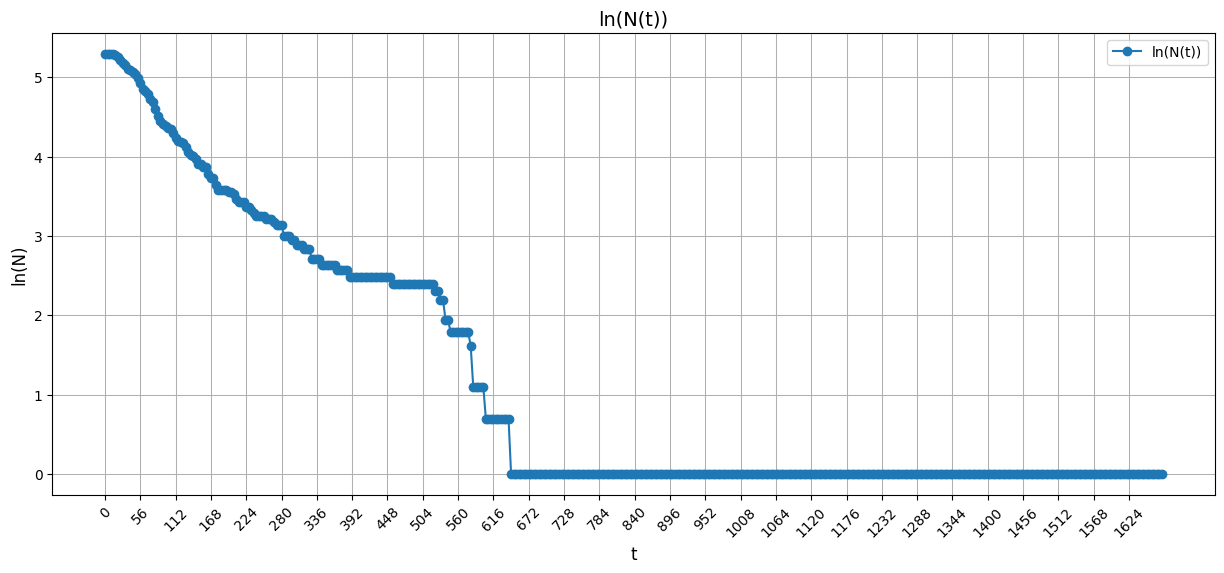

In [133]:
force = forces_data['force450']
force_value = 450
t, N = filter_data(force)
pend_var = []
tau_var = []
lambda_var = []
N0 = N[0]
ln_N = np.log(N)
plot_ln_N_vs_t(t, N)

<span style="color:darkblue;font-size: 18px;"><em>a) Finding classical exponential relaxation:</em></span>

In [134]:
t0 = 4 
tend = 21
tau_frac = 80
N_cut_max = 61

tau_var: [0.038813076107167, 0.017723715379016, 0.019587309477829, 0.020604838239022, 0.020604838239022, 0.020662968631947, 0.020854047949875, 0.020858279204478, 0.020858279204478, 0.020639735079105, 0.020332048185502, 0.0174912742931, 0.015363628640533, 0.014971053620292, 0.014621940325284, 0.014518458827048, 0.014518458827048, 0.014328821818693, 0.014161122203468, 0.01405485672364, 0.013918787981476, 0.013918787981476, 0.013918787981476, 0.013512819154989, 0.013368777424261, 0.012911185345841, 0.012456752229925, 0.012372311208725, 0.012268013717204, 0.012059050016956, 0.012059050016956, 0.011701631500159, 0.011619804467144, 0.011619804467144, 0.011462347668598, 0.011171107074955, 0.011227056790833, 0.011227056790833, 0.011399709763827, 0.011399709763827, 0.011399709763827, 0.011399709763827, 0.011455754258146, 0.011455754258146, 0.011533775536906, 0.011533775536906, 0.011533775536906, 0.011533775536906, 0.011296192616335, 0.011296192616335, 0.011347950991853, 0.011347950991853, 0.011

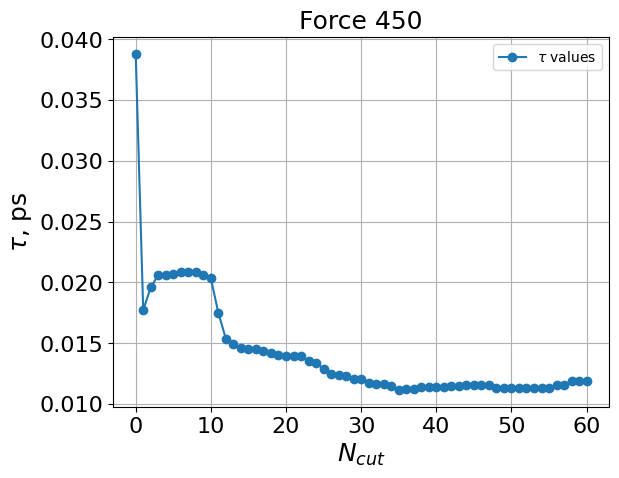

In [135]:
n = np.log(N / N0)
calculate_dissociation_rates(t, n, N, N_cut_max, tau_frac, tau_var, lambda_var, pend_var)
print("tau_var:", tau_var)
print("lambda_var:", lambda_var)
print("pend_var:", pend_var)

x_values = list(range(len(tau_var)))
y_values = tau_var
plot_tau(x_values, y_values, force_value)

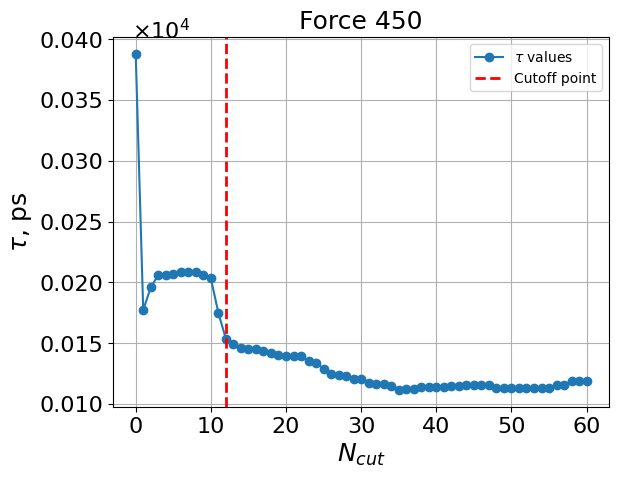

In [136]:
N_cut = 12

a = list(range(len(tau_var)))
plot_tau_with_cutoff(a, tau_var, N_cut, force_value)

<span style="color:darkblue;font-size: 18px;"><em>b) Initial non-classical (fractional) relaxation</em></span>

In [137]:
p, pinit = plot_init_part_ln_ln(force_value, n, t, t0, tend)
print(f"p: {p}, pinit: {pinit}")
print("t[t0:tend]:", t[t0:tend])
print("n[t0:tend]:", n[t0:tend])

p: 2.2304490177199927, pinit: [ 2.23044902 -9.97800699]
t[t0:tend]: [16. 20. 24. 28. 32. 36. 40. 44. 48. 52. 56. 60. 64. 68. 72. 76. 80.]
n[t0:tend]: [-0.01005034 -0.03562718 -0.07257069 -0.11653382 -0.14502577 -0.18632958
 -0.20456717 -0.22941316 -0.25489225 -0.30110509 -0.37106368 -0.43850496
 -0.47000363 -0.50252682 -0.57092955 -0.60696948 -0.69314718]


In [138]:
tau = tau_var[N_cut]
lambda_ = lambda_var[N_cut] * 1e-4
print(f"tau: {tau}, lambda: {lambda_}")

tau: 0.015363628640533, lambda: -0.006508879011575012


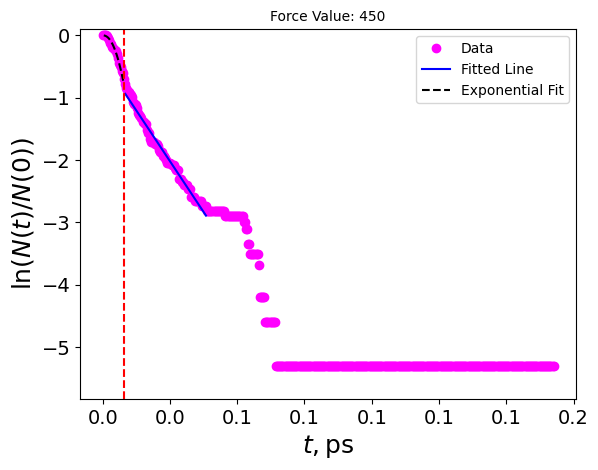

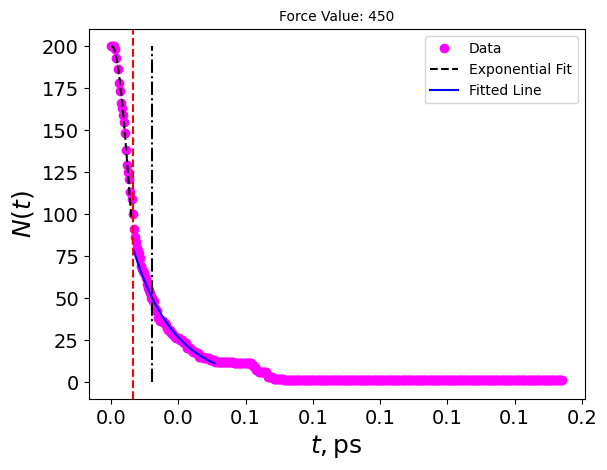

In [139]:
t_fit = t[(N > N_cut) & (t > tau_frac)]
n_fit = n[(N > N_cut) & (t > tau_frac)]

plot_lnN(force_value, t, t_fit, n, tau_frac, pend_var[N_cut], pinit)
plot_N(force_value, t, t_fit, N, N0, tau_frac, pend_var[N_cut], pinit)

In [140]:
tau_all.append(tau)
forces_all.append(force_value)

<p style="color: darkblue; font-size: 24px;"><strong><em> force 463 :</em></strong></p>

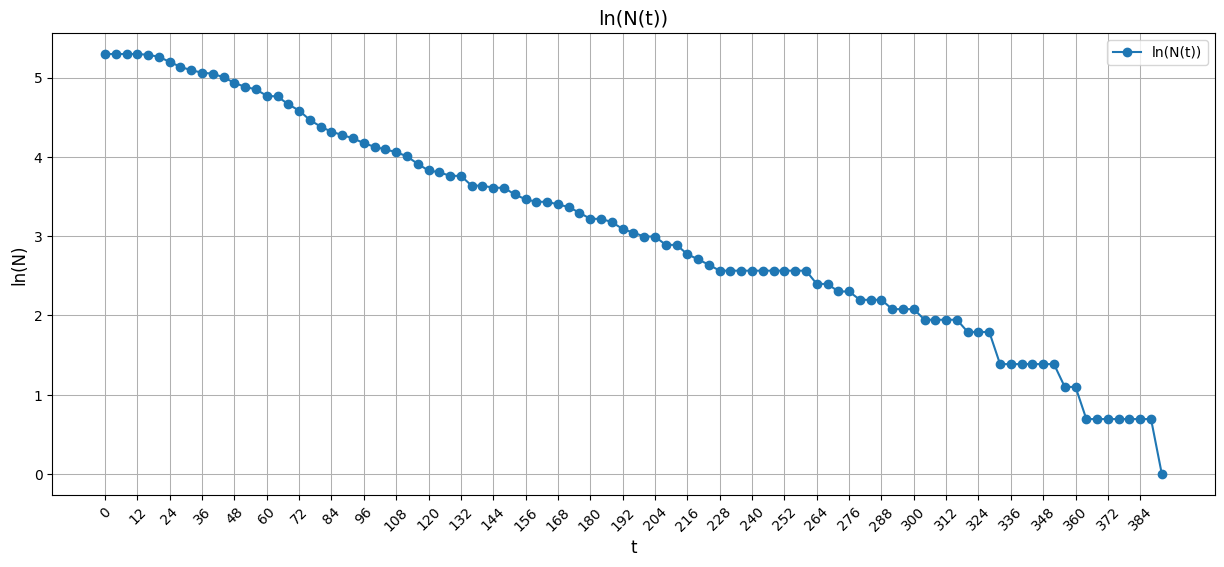

In [141]:
force = forces_data['force463']
force_value = 463
t, N = filter_data(force)
pend_var = []
tau_var = []
lambda_var = []
N0 = N[0]
ln_N = np.log(N)
plot_ln_N_vs_t(t, N)

<span style="color:darkblue;font-size: 18px;"><em>a) Finding classical exponential relaxation:</em></span>

In [142]:
t0 = 4 
tend = 21
tau_frac = 80
N_cut_max = 61

tau_var: [0.008550402260061, 0.008696485836501, 0.009252526948256, 0.009381758908441, 0.00968464181815, 0.00968464181815, 0.0096480725743, 0.009559758575597, 0.009486665449942, 0.009400469640548, 0.009326118562029, 0.009219284448069, 0.009219284448069, 0.008833906946556, 0.008913691873479, 0.008984199951995, 0.009046474175315, 0.009046474175315, 0.009070105256099, 0.009070105256099, 0.009051174760171, 0.00906806835242, 0.009084841841939, 0.009084841841939, 0.009024374545223, 0.008967837474542, 0.008967837474542, 0.00890591450149, 0.00890591450149, 0.008760118912323, 0.0086066073264, 0.008388063912897, 0.008360437649011, 0.008360437649011, 0.008273617485588, 0.008273617485588, 0.008273617485588, 0.007858371921668, 0.007930882948249, 0.007930882948249, 0.007930882948249, 0.007930882948249, 0.007930882948249, 0.00770135941472, 0.00770135941472, 0.007800854633192, 0.008399746954721, 0.008399746954721, 0.008399746954721, 0.008399746954721, 0.009035321445437, 0.009035321445437, 0.00903532144

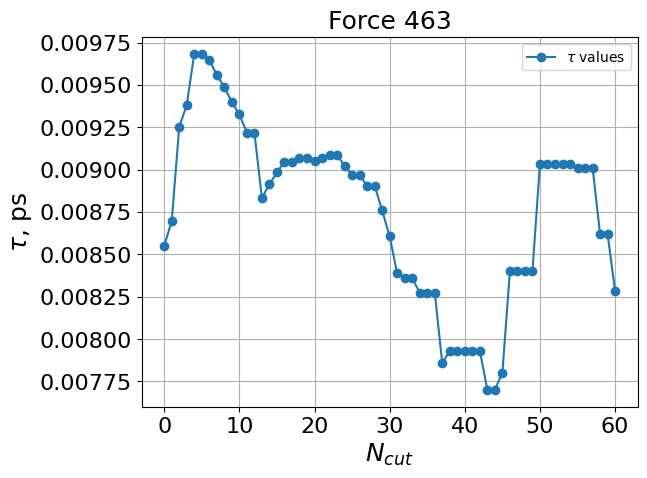

In [143]:
n = np.log(N / N0)
calculate_dissociation_rates(t, n, N, N_cut_max, tau_frac, tau_var, lambda_var, pend_var)
print("tau_var:", tau_var)
print("lambda_var:", lambda_var)
print("pend_var:", pend_var)

x_values = list(range(len(tau_var)))
y_values = tau_var
plot_tau(x_values, y_values, force_value)

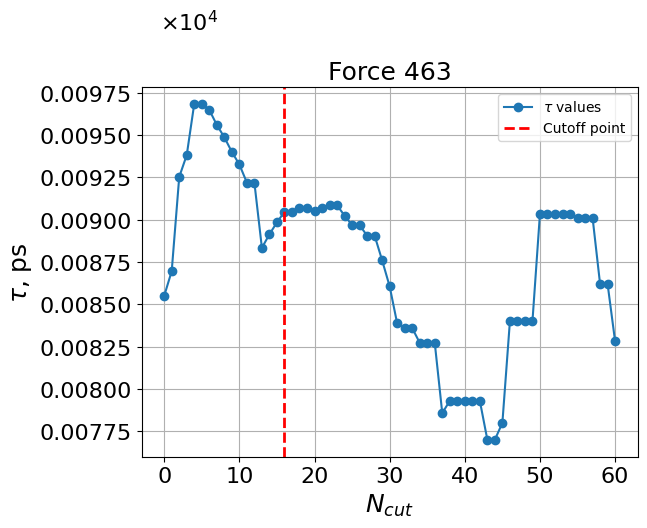

In [144]:
N_cut = 16

a = list(range(len(tau_var)))
plot_tau_with_cutoff(a, tau_var, N_cut, force_value)

<span style="color:darkblue;font-size: 18px;"><em>b) Initial non-classical (fractional) relaxation</em></span>

In [145]:
p, pinit = plot_init_part_ln_ln(force_value, n, t, t0, tend)
print(f"p: {p}, pinit: {pinit}")
print("t[t0:tend]:", t[t0:tend])
print("n[t0:tend]:", n[t0:tend])

p: 2.314697043144308, pinit: [  2.31469704 -10.06602521]
t[t0:tend]: [16. 20. 24. 28. 32. 36. 40. 44. 48. 52. 56. 60. 64. 68. 72. 76. 80.]
n[t0:tend]: [-0.01005034 -0.03562718 -0.09982034 -0.16251893 -0.20456717 -0.23572233
 -0.24846136 -0.29437106 -0.36384343 -0.41551544 -0.4462871  -0.52763274
 -0.53614343 -0.63487827 -0.71334989 -0.83240925 -0.91629073]


In [146]:
tau = tau_var[N_cut]
lambda_ = lambda_var[N_cut] * 1e-4
print(f"tau: {tau}, lambda: {lambda_}")

tau: 0.009046474175315, lambda: -0.011054030339562539


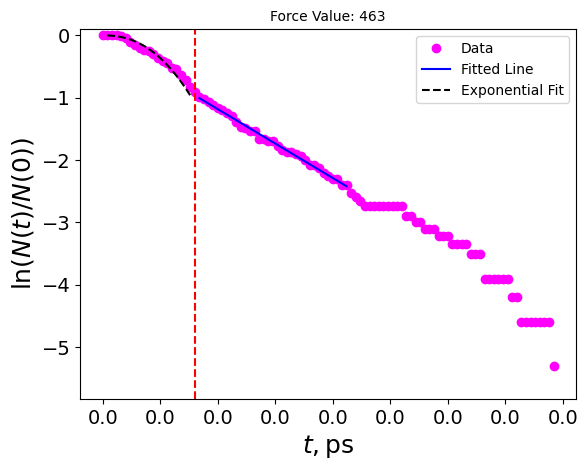

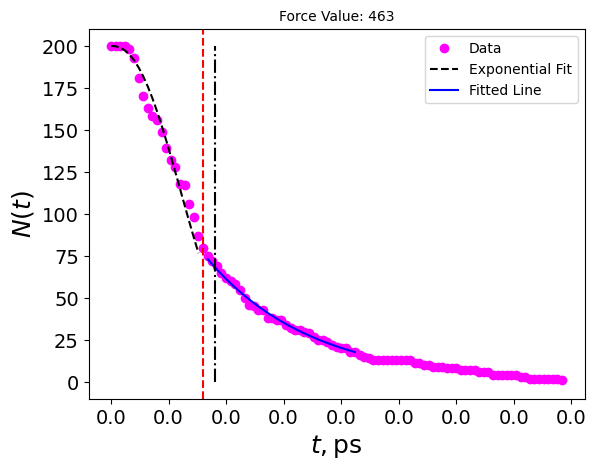

In [147]:
t_fit = t[(N > N_cut) & (t > tau_frac)]
n_fit = n[(N > N_cut) & (t > tau_frac)]

plot_lnN(force_value, t, t_fit, n, tau_frac, pend_var[N_cut], pinit)
plot_N(force_value, t, t_fit, N, N0, tau_frac, pend_var[N_cut], pinit)

In [148]:
tau_all.append(tau)
forces_all.append(force_value)

<p style="color: darkblue; font-size: 24px;"><strong><em> force 475 :</em></strong></p>

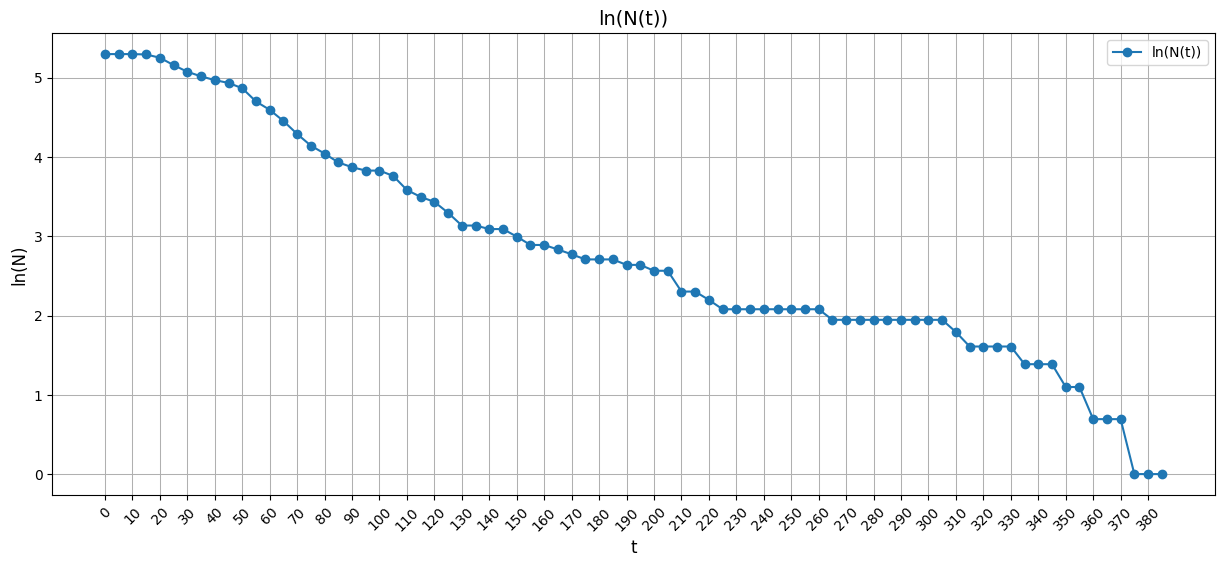

In [149]:
force = forces_data['force475']
force_value = 475
t, N = filter_data(force)
pend_var = []
tau_var = []
lambda_var = []
N0 = N[0]
ln_N = np.log(N)
plot_ln_N_vs_t(t, N)

<span style="color:darkblue;font-size: 18px;"><em>a) Finding classical exponential relaxation:</em></span>

In [150]:
t0 = 4
tend = 26
tau_frac = 125
N_cut_max = 21

tau_var: [0.010014227985659, 0.011386282681676, 0.01240387635044, 0.012832567389145, 0.013052576690963, 0.01295792213598, 0.012792235080252, 0.010412756746096, 0.010174414375713, 0.010624944670407, 0.01190979517132, 0.01190979517132, 0.01190979517132, 0.01143717293488, 0.010744082963483, 0.010133503241378, 0.010398869281809, 0.010598653833427, 0.015433258769119, 0.015433258769119, 0.028120369760549]
lambda_var: [-99.85792229137236, -87.82497571479685, -80.61995877317122, -77.92672889806265, -76.61322539421478, -77.1728668768076, -78.17242207687161, -96.03604735843896, -98.28575513762088, -94.1181371781843, -83.96450028024955, -83.96450028024955, -83.96450028024955, -87.43419424483116, -93.074486058864, -98.68255589209083, -96.16430141586301, -94.3516049978035, -64.79512946422972, -64.79512946422972, -35.561410056667306]
pend_var: [array([-0.00998579, -0.74652022]), array([-0.0087825 , -1.00098493]), array([-0.008062  , -1.14971266]), array([-0.00779267, -1.20421601]), array([-0.0076613

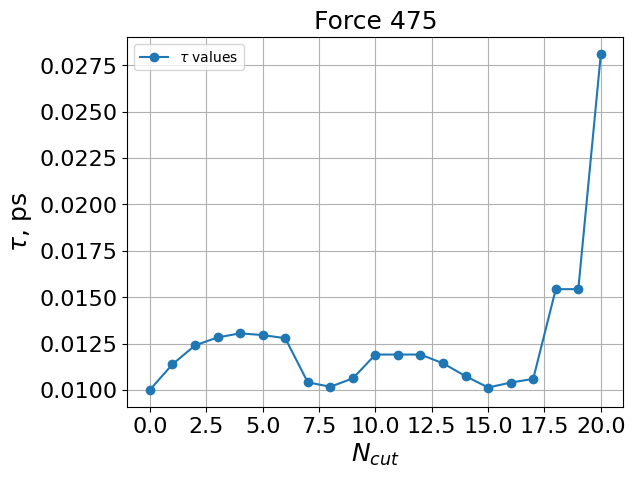

In [151]:
n = np.log(N / N0)
calculate_dissociation_rates(t, n, N, N_cut_max, tau_frac, tau_var, lambda_var, pend_var)
print("tau_var:", tau_var)
print("lambda_var:", lambda_var)
print("pend_var:", pend_var)

x_values = list(range(len(tau_var)))
y_values = tau_var
plot_tau(x_values, y_values, force_value)

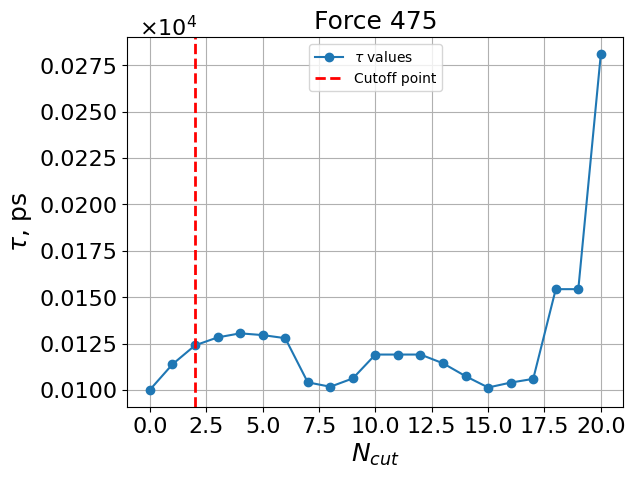

In [152]:
N_cut = 2

a = list(range(len(tau_var)))
plot_tau_with_cutoff(a, tau_var, N_cut, force_value)

<span style="color:darkblue;font-size: 18px;"><em>b) Initial non-classical (fractional) relaxation</em></span>

In [153]:
p, pinit = plot_init_part_ln_ln(force_value, n, t, t0, tend)
print(f"p: {p}, pinit: {pinit}")
print("t[t0:tend]:", t[t0:tend])
print("n[t0:tend]:", n[t0:tend])

p: 1.8225194930720512, pinit: [ 1.82251949 -7.91395133]
t[t0:tend]: [ 20.  25.  30.  35.  40.  45.  50.  55.  60.  65.  70.  75.  80.  85.
  90.  95. 100. 105. 110. 115. 120. 125.]
n[t0:tend]: [-0.04604394 -0.13926207 -0.22314355 -0.28103753 -0.32850407 -0.36384343
 -0.43078292 -0.597837   -0.70319752 -0.84397007 -1.00785793 -1.15518264
 -1.2552661  -1.36649173 -1.42711636 -1.46967597 -1.46967597 -1.53711725
 -1.71479843 -1.80180981 -1.86433016 -2.0024805 ]


In [154]:
tau = tau_var[N_cut]
lambda_ = lambda_var[N_cut] * 1e-4
print(f"tau: {tau}, lambda: {lambda_}")

tau: 0.01240387635044, lambda: -0.008061995877317122


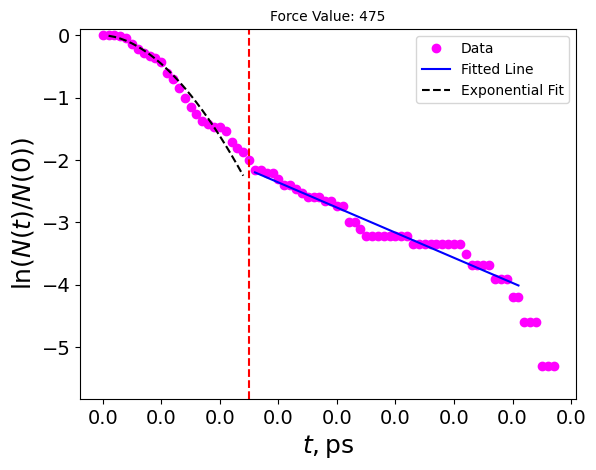

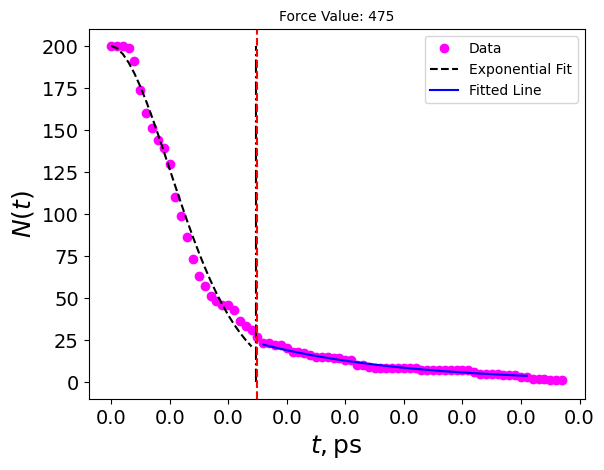

In [155]:
t_fit = t[(N > N_cut) & (t > tau_frac)]
n_fit = n[(N > N_cut) & (t > tau_frac)]

plot_lnN(force_value, t, t_fit, n, tau_frac, pend_var[N_cut], pinit)
plot_N(force_value, t, t_fit, N, N0, tau_frac, pend_var[N_cut], pinit)

In [156]:
tau_all.append(tau)
forces_all.append(force_value)

<p style="color: darkblue; font-size: 24px;"><strong><em> force 488 :</em></strong></p>


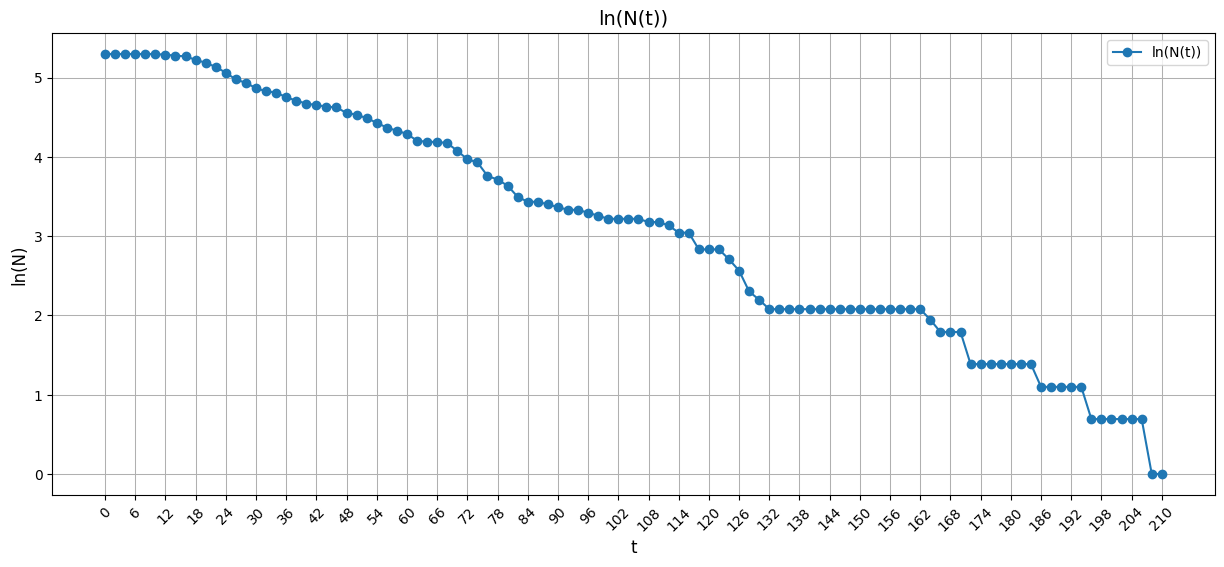

In [157]:
force = forces_data['force488']
force_value = 488
t, N = filter_data(force)
pend_var = []
tau_var = []
lambda_var = []
N0 = N[0]
ln_N = np.log(N)
plot_ln_N_vs_t(t, N)

<span style="color:darkblue;font-size: 18px;"><em>a) Finding classical exponential relaxation:</em></span>

In [158]:
t0 = 4 
tend = 43
tau_frac = 84
N_cut_max = 21

tau_var: [0.004061593310412, 0.004222364550403, 0.004384275474466, 0.004445305518312, 0.004574575922983, 0.004574575922983, 0.004460826889191, 0.004387130477457, 0.004340923923049, 0.004809965584668, 0.005466473436037, 0.005466473436037, 0.005466473436037, 0.005969776902797, 0.005969776902797, 0.006398362035285, 0.006398362035285, 0.008501359287843, 0.008501359287843, 0.008501359287843, 0.008501359287843]
lambda_var: [-246.2087962958711, -236.83412174929762, -228.0878575773784, -224.9564165793868, -218.59949792853124, -218.59949792853124, -224.17368457472335, -227.93942535752663, -230.36570502661775, -207.90169542741515, -182.933295423631, -182.933295423631, -182.933295423631, -167.5104474224947, -167.5104474224947, -156.28999961009765, -156.28999961009765, -117.62824815909227, -117.62824815909227, -117.62824815909227, -117.62824815909227]
pend_var: [array([-0.02462088,  0.41061537]), array([-0.02368341,  0.29220967]), array([-0.02280879,  0.18470895]), array([-0.02249564,  0.14750898]

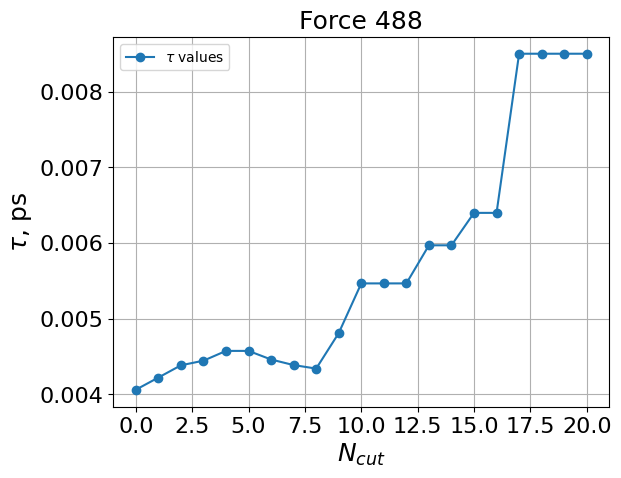

In [159]:
n = np.log(N / N0)
calculate_dissociation_rates(t, n, N, N_cut_max, tau_frac, tau_var, lambda_var, pend_var)
print("tau_var:", tau_var)
print("lambda_var:", lambda_var)
print("pend_var:", pend_var)

x_values = list(range(len(tau_var)))
y_values = tau_var
plot_tau(x_values, y_values, force_value)

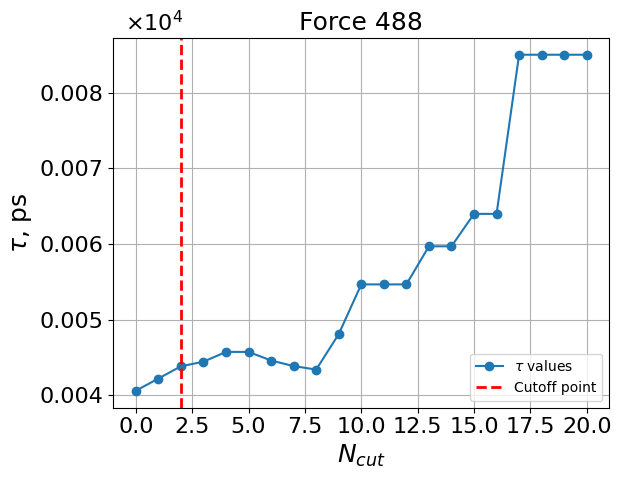

In [160]:
N_cut = 2

a = list(range(len(tau_var)))
plot_tau_with_cutoff(a, tau_var, N_cut, force_value)

<span style="color:darkblue;font-size: 18px;"><em>b) Initial non-classical (fractional) relaxation</em></span>

In [161]:
p, pinit = plot_init_part_ln_ln(force_value, n, t, t0, tend)
print(f"p: {p}, pinit: {pinit}")
print("t[t0:tend]:", t[t0:tend])
print("n[t0:tend]:", n[t0:tend])

p: 2.2055176878484852, pinit: [ 2.20551769 -8.92817934]
t[t0:tend]: [ 8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30. 32. 34. 36. 38. 40. 42.
 44. 46. 48. 50. 52. 54. 56. 58. 60. 62. 64. 66. 68. 70. 72. 74. 76. 78.
 80. 82. 84.]
n[t0:tend]: [ 0.          0.         -0.01005034 -0.02020271 -0.03045921 -0.07257069
 -0.11093156 -0.16251893 -0.23572233 -0.32158362 -0.36384343 -0.43078292
 -0.47000363 -0.48613301 -0.54472718 -0.58878717 -0.62548853 -0.64435702
 -0.66358838 -0.67334455 -0.74444047 -0.76571787 -0.809681   -0.86750057
 -0.92886951 -0.96758403 -1.00785793 -1.09362475 -1.10866262 -1.10866262
 -1.1239301  -1.22077992 -1.32802545 -1.36649173 -1.53711725 -1.5847453
 -1.66073121 -1.80180981 -1.86433016]


In [162]:
tau = tau_var[N_cut]
lambda_ = lambda_var[N_cut] * 1e-4
print(f"tau: {tau}, lambda: {lambda_}")

tau: 0.004384275474466, lambda: -0.022808785757737843


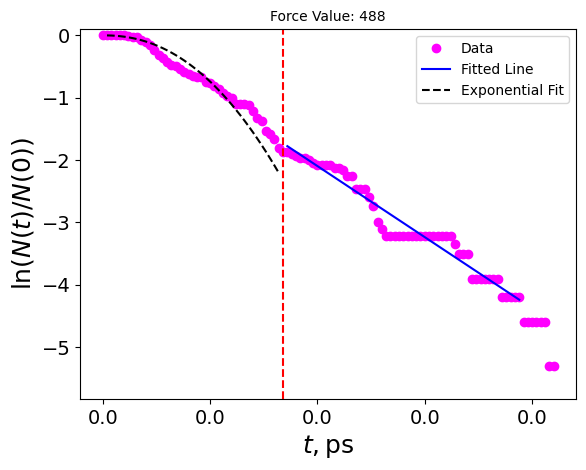

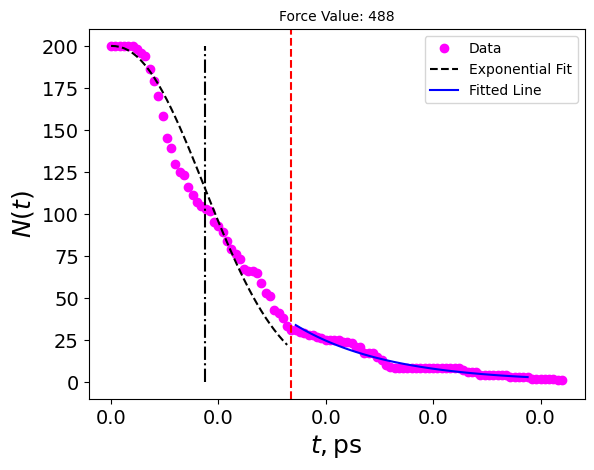

In [163]:
t_fit = t[(N > N_cut) & (t > tau_frac)]
n_fit = n[(N > N_cut) & (t > tau_frac)]

plot_lnN(force_value, t, t_fit, n, tau_frac, pend_var[N_cut], pinit)
plot_N(force_value, t, t_fit, N, N0, tau_frac, pend_var[N_cut], pinit)

In [164]:
tau_all.append(tau)
forces_all.append(force_value)

<p style="color: darkblue; font-size: 24px;"><strong><em> force 500 :</em></strong></p>

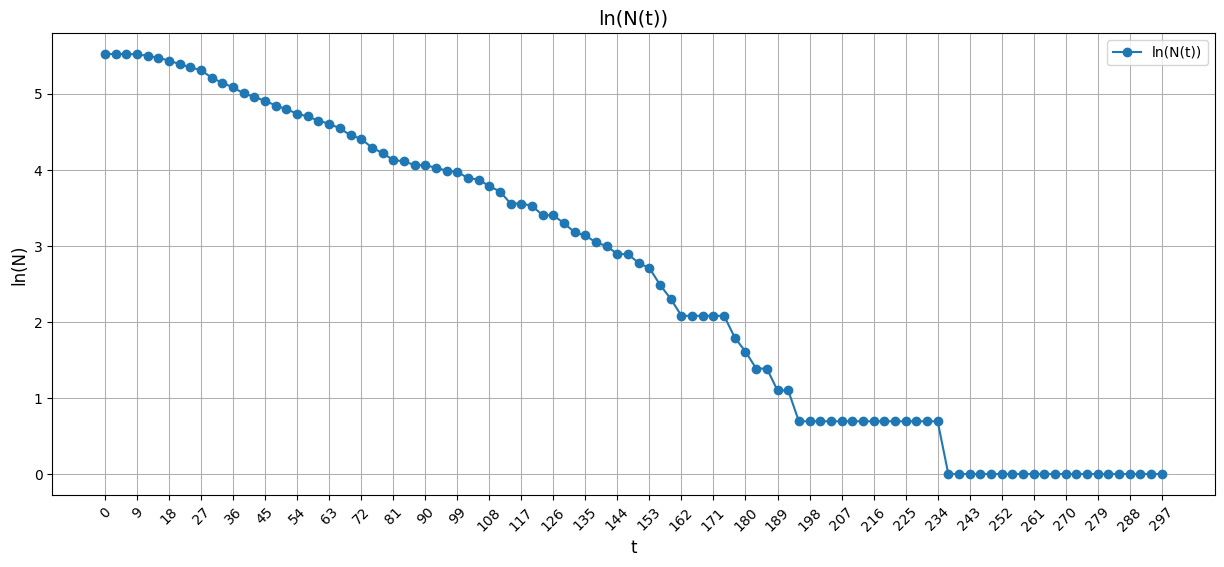

In [165]:
force = forces_data['force500']
force_value = 500
t, N = filter_data(force)
pend_var = []
tau_var = []
lambda_var = []
N0 = N[0]
ln_N = np.log(N)
plot_ln_N_vs_t(t, N)

<span style="color:darkblue;font-size: 18px;"><em>a) Finding classical exponential relaxation:</em></span>

In [166]:
t0 = 4 
tend = 29
tau_frac = 84
N_cut_max = 41

tau_var: [0.004324545569752, 0.00354004923043, 0.003487759219538, 0.003630111043909, 0.003780050834174, 0.003852832207928, 0.003908007950466, 0.003908007950466, 0.004274684807085, 0.004274684807085, 0.004436444295464, 0.004436444295464, 0.004566579490427, 0.004566579490427, 0.004566579490427, 0.004598629313834, 0.004642158958859, 0.004642158958859, 0.004720756897469, 0.004720756897469, 0.004772651755086, 0.004871517349606, 0.004871517349606, 0.004958731650176, 0.005136236410888, 0.005136236410888, 0.005136236410888, 0.005240980913799, 0.005240980913799, 0.005240980913799, 0.005476558463229, 0.005476558463229, 0.005476558463229, 0.005476558463229, 0.005509298647935, 0.006865750511695, 0.006865750511695, 0.006865750511695, 0.006865750511695, 0.006865750511695, 0.006865750511695]
lambda_var: [-231.23816916036213, -282.481947257721, -286.71704009789005, -275.4736667568377, -264.54670687478085, -259.54932528393226, -255.88484278305782, -255.88484278305782, -233.93537655517085, -233.93537655

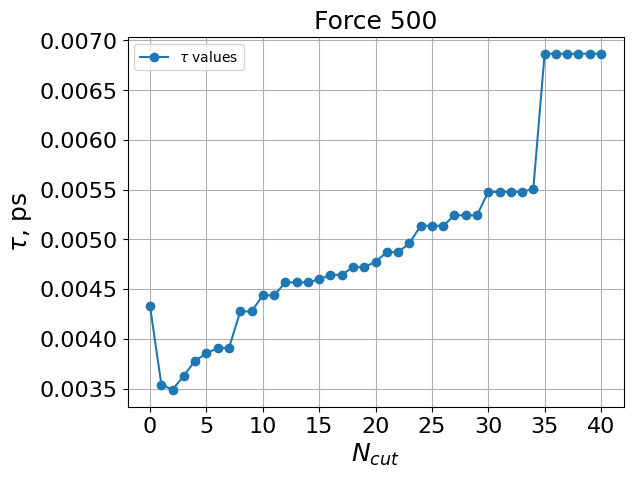

In [167]:
n = np.log(N / N0)
calculate_dissociation_rates(t, n, N, N_cut_max, tau_frac, tau_var, lambda_var, pend_var)
print("tau_var:", tau_var)
print("lambda_var:", lambda_var)
print("pend_var:", pend_var)

x_values = list(range(len(tau_var)))
y_values = tau_var
plot_tau(x_values, y_values, force_value)

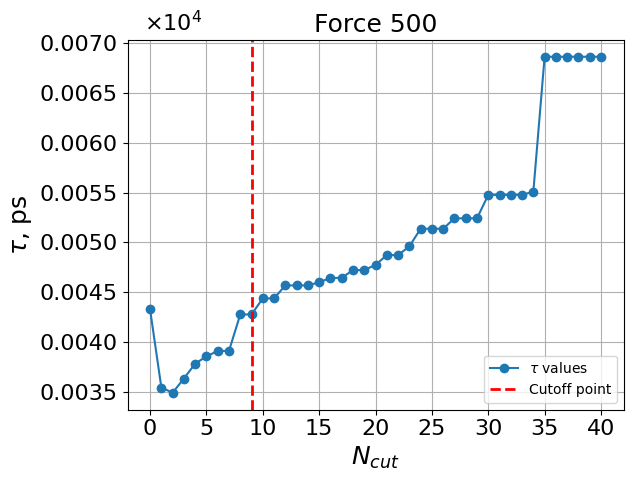

In [168]:
N_cut = 9

a = list(range(len(tau_var)))
plot_tau_with_cutoff(a, tau_var, N_cut, force_value)

<span style="color:darkblue;font-size: 18px;"><em>b) Initial non-classical (fractional) relaxation</em></span>

In [169]:
p, pinit = plot_init_part_ln_ln(force_value, n, t, t0, tend)
print(f"p: {p}, pinit: {pinit}")
print("t[t0:tend]:", t[t0:tend])
print("n[t0:tend]:", n[t0:tend])

p: 1.9208146695181403, pinit: [ 1.92081467 -7.95719396]
t[t0:tend]: [12. 15. 18. 21. 24. 27. 30. 33. 36. 39. 42. 45. 48. 51. 54. 57. 60. 63.
 66. 69. 72. 75. 78. 81. 84.]
n[t0:tend]: [-0.02429269 -0.04919024 -0.08773891 -0.13238919 -0.17435339 -0.21319322
 -0.31197477 -0.37979736 -0.44005655 -0.51751461 -0.56563386 -0.61618614
 -0.67727383 -0.72567037 -0.78526247 -0.82098055 -0.87707002 -0.91629073
 -0.97816614 -1.06711362 -1.11474167 -1.23100148 -1.30195321 -1.39432653
 -1.41058705]


In [170]:
tau = tau_var[N_cut]
lambda_ = lambda_var[N_cut] * 1e-4
print(f"tau: {tau}, lambda: {lambda_}")

tau: 0.004274684807085, lambda: -0.023393537655517087


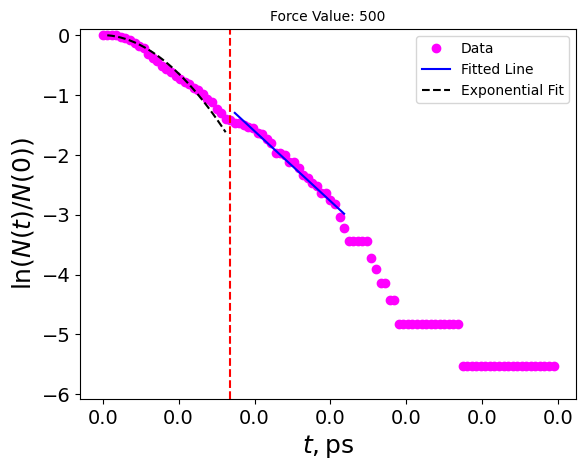

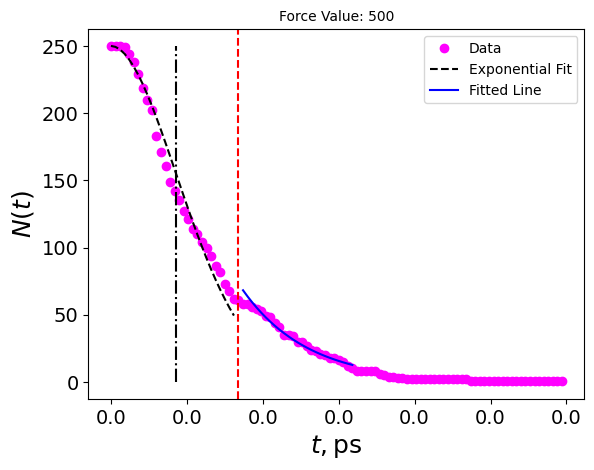

In [171]:
t_fit = t[(N > N_cut) & (t > tau_frac)]
n_fit = n[(N > N_cut) & (t > tau_frac)]

plot_lnN(force_value, t, t_fit, n, tau_frac, pend_var[N_cut], pinit)
plot_N(force_value, t, t_fit, N, N0, tau_frac, pend_var[N_cut], pinit)

In [172]:
tau_all.append(tau)
forces_all.append(force_value)

<p style="color: darkblue; font-size: 24px;"><strong><em> force 513 :</em></strong></p>

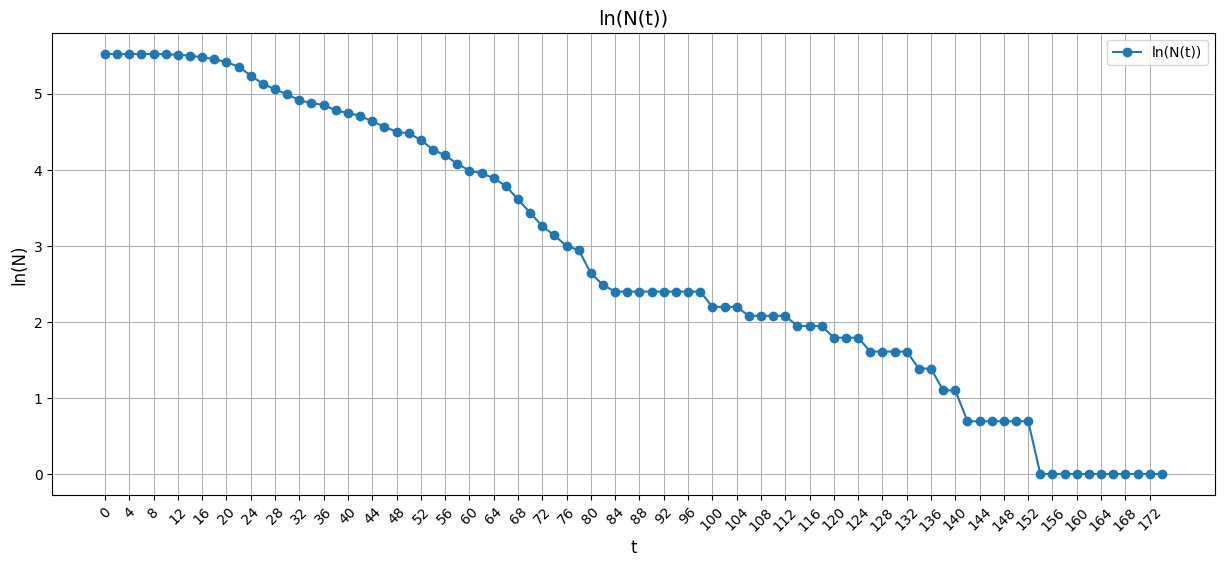

In [173]:
force = forces_data['force513']
force_value = 513
t, N = filter_data(force)
pend_var = []
tau_var = []
lambda_var = []
N0 = N[0]
ln_N = np.log(N)
plot_ln_N_vs_t(t, N)

<span style="color:darkblue;font-size: 18px;"><em>a) Finding classical exponential relaxation:</em></span>

In [174]:
t0 = 9 
tend = 46
tau_frac = 90
N_cut_max = 5

tau_var: [0.00281881570268, 0.003184276892072, 0.003916452858779, 0.004331235502915, 0.004570992303066]
lambda_var: [-354.7589149050501, -314.0430414483516, -255.33308737740867, -230.88100365980753, -218.77087811529063]
pend_var: [array([-0.03547589,  0.41779641]), array([-0.0314043 , -0.03592685]), array([-0.02553331, -0.67473331]), array([-0.0230881 , -0.93618399]), array([-0.02187709, -1.06399939])]


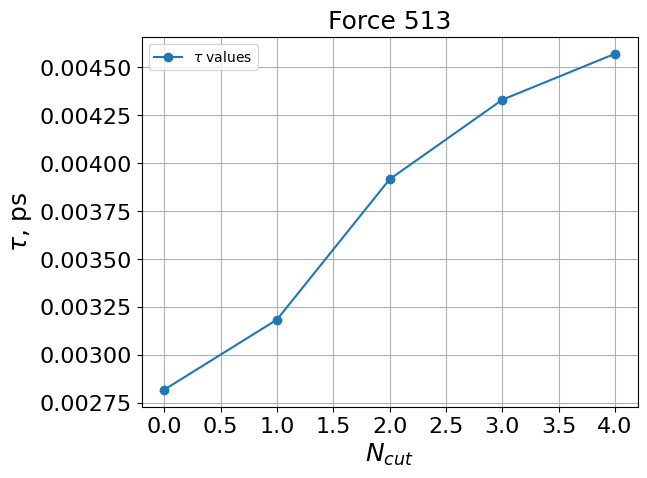

In [175]:
n = np.log(N / N0)
calculate_dissociation_rates(t, n, N, N_cut_max, tau_frac, tau_var, lambda_var, pend_var)
print("tau_var:", tau_var)
print("lambda_var:", lambda_var)
print("pend_var:", pend_var)

x_values = list(range(len(tau_var)))
y_values = tau_var
plot_tau(x_values, y_values, force_value)

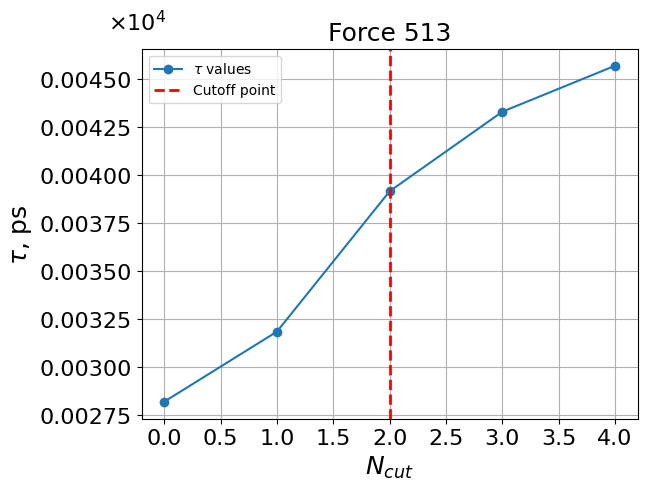

In [176]:
N_cut = 2

a = list(range(len(tau_var)))
plot_tau_with_cutoff(a, tau_var, N_cut, force_value)

<span style="color:darkblue;font-size: 18px;"><em>b) Initial non-classical (fractional) relaxation</em></span>

In [177]:
p, pinit = plot_init_part_ln_ln(force_value, n, t, t0, tend)
print(f"p: {p}, pinit: {pinit}")
print("t[t0:tend]:", t[t0:tend])
print("n[t0:tend]:", n[t0:tend])

p: 2.027719626178799, pinit: [ 2.02771963 -7.84455369]
t[t0:tend]: [18. 20. 22. 24. 26. 28. 30. 32. 34. 36. 38. 40. 42. 44. 46. 48. 50. 52.
 54. 56. 58. 60. 62. 64. 66. 68. 70. 72. 74. 76. 78. 80. 82. 84. 86. 88.
 90.]
n[t0:tend]: [-0.0661398  -0.10981487 -0.16487464 -0.28501896 -0.3915622  -0.46521511
 -0.53102833 -0.60880603 -0.64626359 -0.66943065 -0.74233742 -0.77652879
 -0.81193072 -0.88673193 -0.95711273 -1.02165125 -1.0441241  -1.12701176
 -1.25878104 -1.33180618 -1.44392347 -1.53247687 -1.5702172  -1.62964062
 -1.73727128 -1.91054301 -2.08747371 -2.26336438 -2.3859667  -2.52572864
 -2.57702194 -2.88240359 -3.03655427 -3.12356565 -3.12356565 -3.12356565
 -3.12356565]


In [178]:
tau = tau_var[N_cut]
lambda_ = lambda_var[N_cut] * 1e-4
print(f"tau: {tau}, lambda: {lambda_}")

tau: 0.003916452858779, lambda: -0.02553330873774087


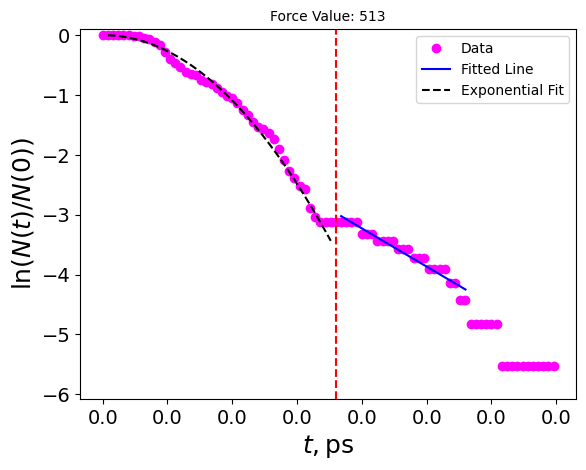

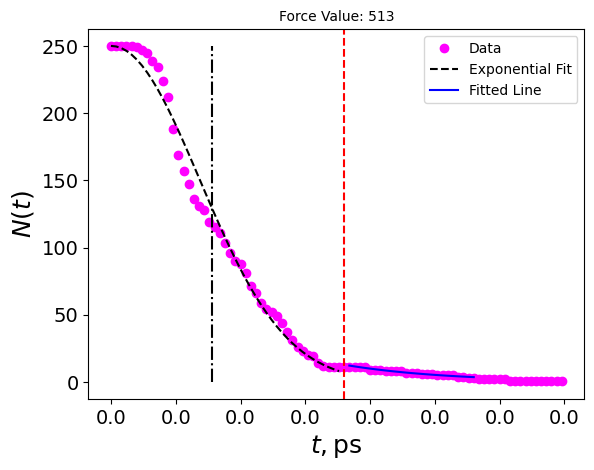

In [179]:
t_fit = t[(N > N_cut) & (t > tau_frac)]
n_fit = n[(N > N_cut) & (t > tau_frac)]

plot_lnN(force_value, t, t_fit, n, tau_frac, pend_var[N_cut], pinit)
plot_N(force_value, t, t_fit, N, N0, tau_frac, pend_var[N_cut], pinit)

In [180]:
tau_all.append(tau)
forces_all.append(force_value)

<p style="color: darkblue; font-size: 24px;"><strong><em> force 525 :</em></strong></p>

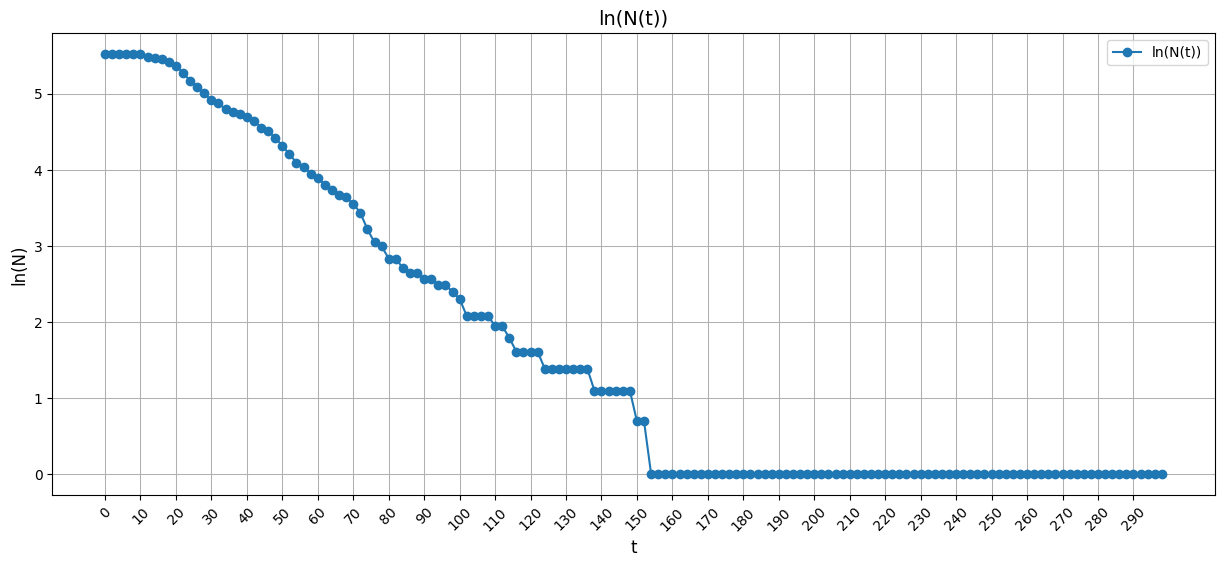

In [181]:
force = forces_data['force525']
force_value = 525
t, N = filter_data(force)
pend_var = []
tau_var = []
lambda_var = []
N0 = N[0]
ln_N = np.log(N)
plot_ln_N_vs_t(t, N)

<span style="color:darkblue;font-size: 18px;"><em>a) Finding classical exponential relaxation:</em></span>

In [182]:
t0 = 5 
tend = 13
tau_frac = 24
N_cut_max = 31

tau_var: [0.005295499708188, 0.002813076016273, 0.002800612152279, 0.002687040043814, 0.002573962410344, 0.002546037024059, 0.002538415442654, 0.00251154083266, 0.002488080076939, 0.002488080076939, 0.002477271324249, 0.002462571335665, 0.002436418341555, 0.002430704718725, 0.002460819404252, 0.00249388556949, 0.00249388556949, 0.002585660561563, 0.002585660561563, 0.002585660561563, 0.002638865932558, 0.002719049614649, 0.002719049614649, 0.002719049614649, 0.002719049614649, 0.002785190149635, 0.002785190149635, 0.002785190149635, 0.002785190149635, 0.002785190149635, 0.002785190149635]
lambda_var: [-188.8395911822711, -355.48275063139545, -357.06479356171633, -372.1567165707594, -388.5060620859956, -392.7672655779642, -393.94654759683806, -398.16195181706456, -401.9163246667606, -401.9163246667606, -403.6699533923668, -406.07960692024307, -410.4385453615156, -411.4033236108784, -406.3687072169027, -400.980707468604, -400.980707468604, -386.74836707701587, -386.74836707701587, -386.7

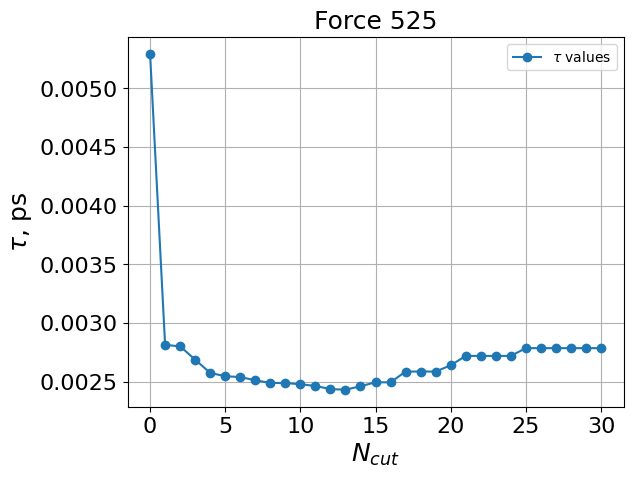

In [183]:
n = np.log(N / N0)
calculate_dissociation_rates(t, n, N, N_cut_max, tau_frac, tau_var, lambda_var, pend_var)
print("tau_var:", tau_var)
print("lambda_var:", lambda_var)
print("pend_var:", pend_var)

x_values = list(range(len(tau_var)))
y_values = tau_var
plot_tau(x_values, y_values, force_value)

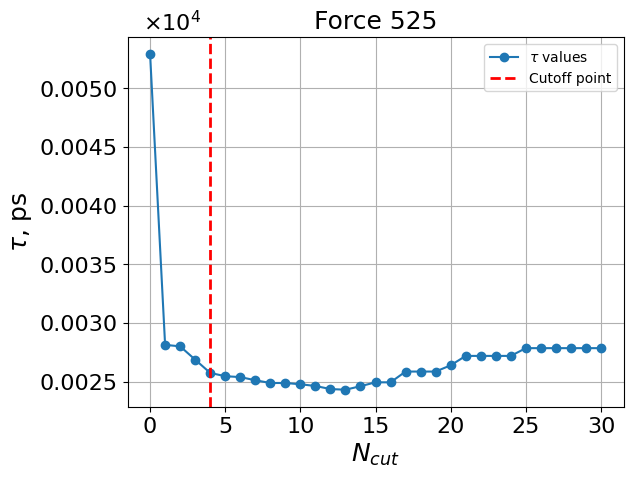

In [184]:
N_cut = 4

a = list(range(len(tau_var)))
plot_tau_with_cutoff(a, tau_var, N_cut, force_value)

<span style="color:darkblue;font-size: 18px;"><em>b) Initial non-classical (fractional) relaxation</em></span>

In [185]:
p, pinit = plot_init_part_ln_ln(force_value, n, t, t0, tend)
print(f"p: {p}, pinit: {pinit}")
print("t[t0:tend]:", t[t0:tend])
print("n[t0:tend]:", n[t0:tend])

p: 4.351185214620513, pinit: [  4.35118521 -14.78853971]
t[t0:tend]: [10. 12. 14. 16. 18. 20. 22. 24.]
n[t0:tend]: [-0.00400802 -0.03666398 -0.05762911 -0.0661398  -0.10092592 -0.15082289
 -0.24334626 -0.35097692]


In [186]:
tau = tau_var[N_cut]
lambda_ = lambda_var[N_cut] * 1e-4
print(f"tau: {tau}, lambda: {lambda_}")

tau: 0.002573962410344, lambda: -0.038850606208599564


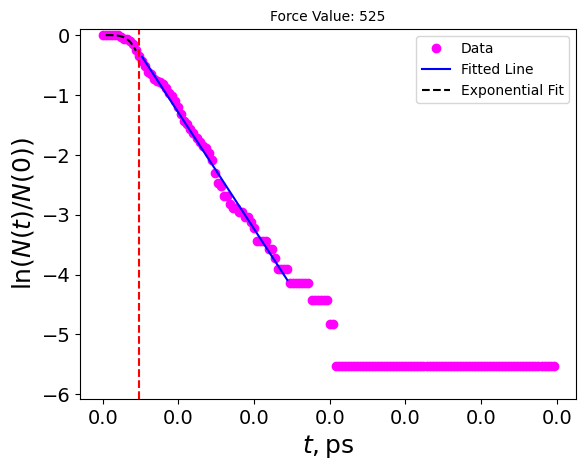

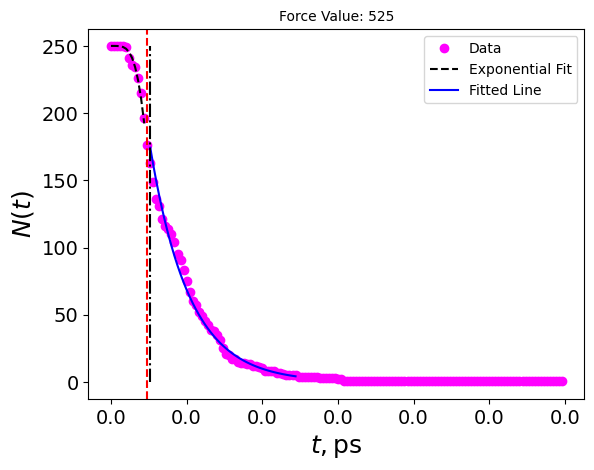

In [187]:
t_fit = t[(N > N_cut) & (t > tau_frac)]
n_fit = n[(N > N_cut) & (t > tau_frac)]

plot_lnN(force_value, t, t_fit, n, tau_frac, pend_var[N_cut], pinit)
plot_N(force_value, t, t_fit, N, N0, tau_frac, pend_var[N_cut], pinit)

In [188]:
tau_all.append(tau)
forces_all.append(force_value)

<p style="color: darkblue; font-size: 24px;"><strong><em> force 538 :</em></strong></p>

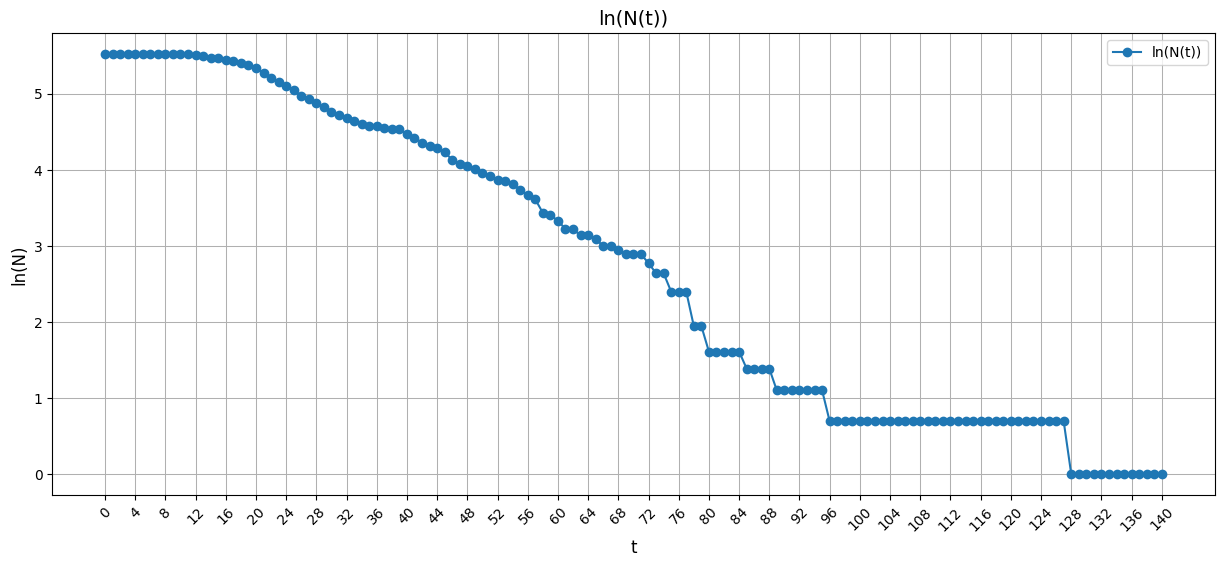

In [189]:
force = forces_data['force538']
force_value = 538
t, N = filter_data(force)
pend_var = []
tau_var = []
lambda_var = []
N0 = N[0]
ln_N = np.log(N)
plot_ln_N_vs_t(t, N)

<span style="color:darkblue;font-size: 18px;"><em>a) Finding classical exponential relaxation:</em></span>

In [190]:
t0 = 6 
tend = 38
tau_frac = 37
N_cut_max = 31

tau_var: [0.002109326863947, 0.001962752188645, 0.001497837010857, 0.001518033109766, 0.001563557354114, 0.001710252341674, 0.001710252341674, 0.001788558531053, 0.001788558531053, 0.001788558531053, 0.001788558531053, 0.001826445265289, 0.001826445265289, 0.001826445265289, 0.001829329844438, 0.001829329844438, 0.001822137654704, 0.001822137654704, 0.001785024944247, 0.001780659194649, 0.001785514629601, 0.001785514629601, 0.001786048174587, 0.00181346749062, 0.00181346749062, 0.001882950656736, 0.001882950656736, 0.001882950656736, 0.001921720782105, 0.001921720782105, 0.001965766246742]
lambda_var: [-474.084892717325, -509.4886689136087, -667.6293834053473, -658.7471601024847, -639.5672006329105, -584.7090371596792, -584.7090371596792, -559.1094630887171, -559.1094630887171, -559.1094630887171, -559.1094630887171, -547.5116166932899, -547.5116166932899, -547.5116166932899, -546.6482728853873, -546.6482728853873, -548.8059573428243, -548.8059573428243, -560.2162609676725, -561.589776

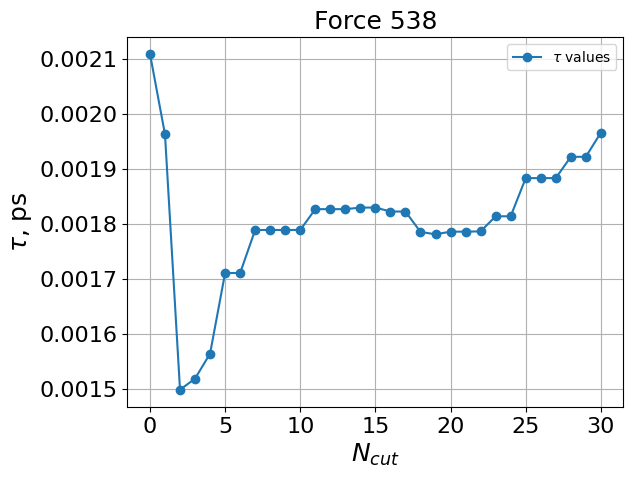

In [191]:
n = np.log(N / N0)
calculate_dissociation_rates(t, n, N, N_cut_max, tau_frac, tau_var, lambda_var, pend_var)
print("tau_var:", tau_var)
print("lambda_var:", lambda_var)
print("pend_var:", pend_var)

x_values = list(range(len(tau_var)))
y_values = tau_var
plot_tau(x_values, y_values, force_value)

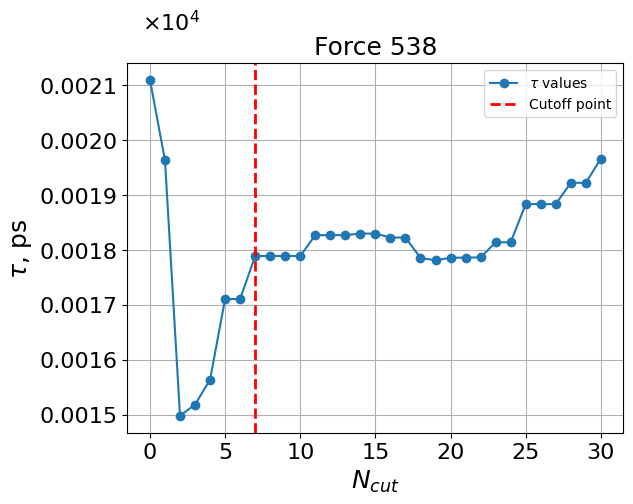

In [192]:
N_cut = 7

a = list(range(len(tau_var)))
plot_tau_with_cutoff(a, tau_var, N_cut, force_value)

<span style="color:darkblue;font-size: 18px;"><em>b) Initial non-classical (fractional) relaxation</em></span>

In [193]:
p, pinit = plot_init_part_ln_ln(force_value, n, t, t0, tend)
print(f"p: {p}, pinit: {pinit}")
print("t[t0:tend]:", t[t0:tend])
print("n[t0:tend]:", n[t0:tend])

p: 3.555773263433973, pinit: [  3.55577326 -12.43299766]
t[t0:tend]: [ 6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23.
 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37.]
n[t0:tend]: [ 0.          0.          0.          0.          0.          0.
 -0.01612938 -0.02839947 -0.04919024 -0.05340078 -0.08338161 -0.08773891
 -0.12329822 -0.14618251 -0.18392284 -0.24846136 -0.31197477 -0.37396644
 -0.42159449 -0.47160491 -0.55861629 -0.59420723 -0.64626359 -0.70117935
 -0.76787073 -0.80296205 -0.83932969 -0.88673193 -0.92634107 -0.94674994
 -0.94674994 -0.97816614]


In [194]:
tau = tau_var[N_cut]
lambda_ = lambda_var[N_cut] * 1e-4
print(f"tau: {tau}, lambda: {lambda_}")

tau: 0.001788558531053, lambda: -0.055910946308871716


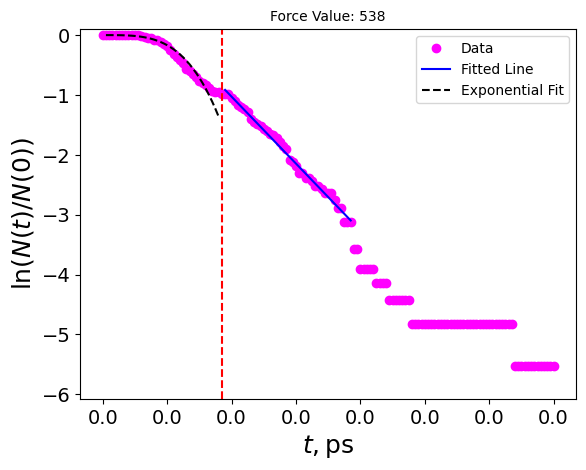

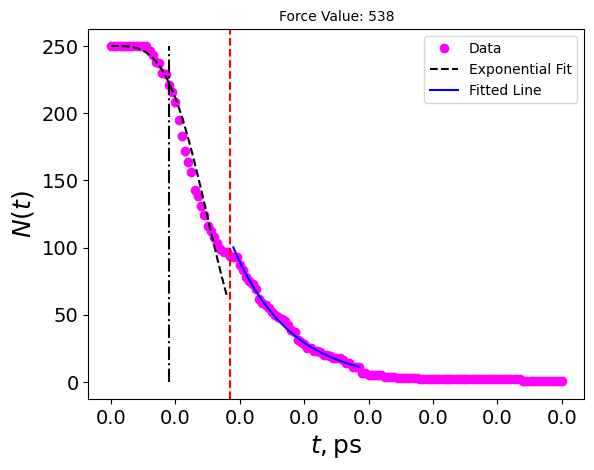

In [195]:
t_fit = t[(N > N_cut) & (t > tau_frac)]
n_fit = n[(N > N_cut) & (t > tau_frac)]

plot_lnN(force_value, t, t_fit, n, tau_frac, pend_var[N_cut], pinit)
plot_N(force_value, t, t_fit, N, N0, tau_frac, pend_var[N_cut], pinit)

In [196]:
tau_all.append(tau)
forces_all.append(force_value)

<p style="color: darkblue; font-size: 24px;"><strong><em> force 550 :</em></strong></p>

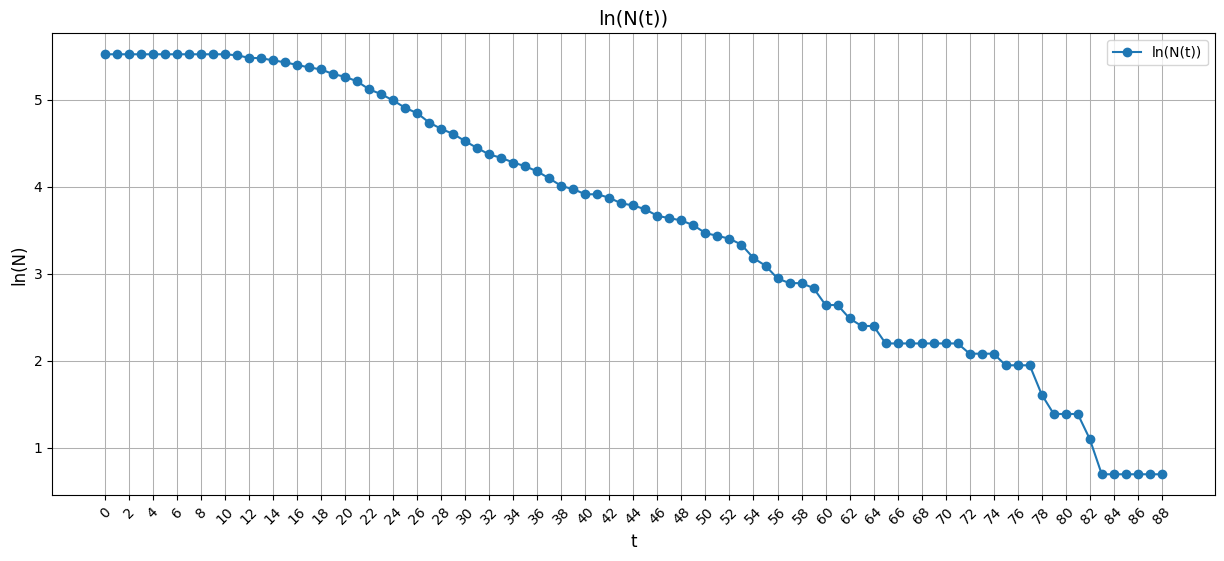

In [197]:
force = forces_data['force550']
force_value = 550
t, N = filter_data(force)
pend_var = []
tau_var = []
lambda_var = []
N0 = N[0]
ln_N = np.log(N)
plot_ln_N_vs_t(t, N)

<span style="color:darkblue;font-size: 18px;"><em>a) Finding classical exponential relaxation:</em></span>

In [198]:
t0 = 11 
tend = 29
tau_frac = 28
N_cut_max = 61

tau_var: [0.001526418400013, 0.001526418400013, 0.001634355275015, 0.00165174552051, 0.001683756939654, 0.001690113004533, 0.001690113004533, 0.001658395853147, 0.001626536011013, 0.001659605346865, 0.001659605346865, 0.001705506386722, 0.001736999692883, 0.001736999692883, 0.001796020001531, 0.001796020001531, 0.001796020001531, 0.001812375160354, 0.001872421442954, 0.001924478869134, 0.001924478869134, 0.001924478869134, 0.001959592552094, 0.001959592552094, 0.001991332481486, 0.001991332481486, 0.001991332481486, 0.001991332481486, 0.001987560887062, 0.001987560887062, 0.001974067180247, 0.001965739567677, 0.001965397049538, 0.001965397049538, 0.001965397049538, 0.001941609392666, 0.001941609392666, 0.001907774893491, 0.001880904126624, 0.001865243652896, 0.001865243652896, 0.001865243652896, 0.001826124494057, 0.001826124494057, 0.001779396519762, 0.001747147373605, 0.001747147373605, 0.001747147373605, 0.001691677983098, 0.001691677983098, 0.001626285261187, 0.001626285261187, 0.0

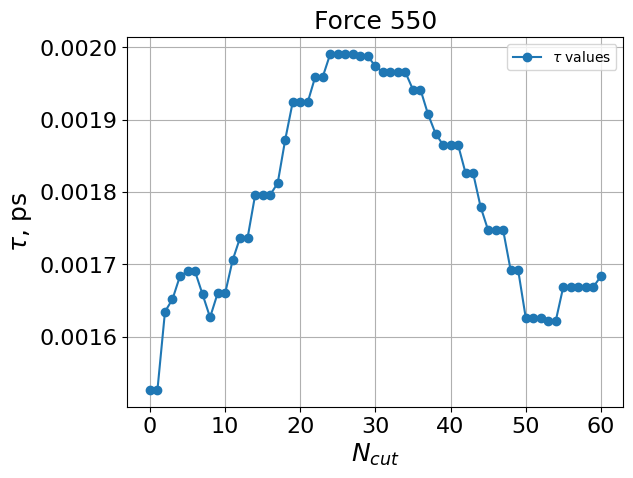

In [199]:
n = np.log(N / N0)
calculate_dissociation_rates(t, n, N, N_cut_max, tau_frac, tau_var, lambda_var, pend_var)
print("tau_var:", tau_var)
print("lambda_var:", lambda_var)
print("pend_var:", pend_var)

x_values = list(range(len(tau_var)))
y_values = tau_var
plot_tau(x_values, y_values, force_value)

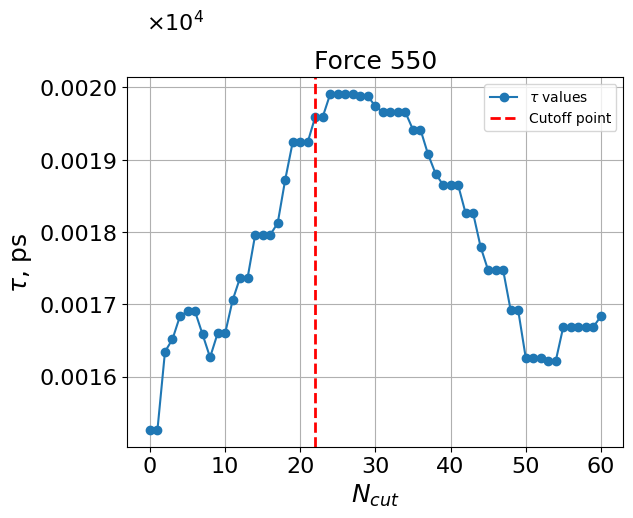

In [200]:
N_cut = 22

a = list(range(len(tau_var)))
plot_tau_with_cutoff(a, tau_var, N_cut, force_value)

<span style="color:darkblue;font-size: 18px;"><em>b) Initial non-classical (fractional) relaxation</em></span>

In [201]:
p, pinit = plot_init_part_ln_ln(force_value, n, t, t0, tend)
print(f"p: {p}, pinit: {pinit}")
print("t[t0:tend]:", t[t0:tend])
print("n[t0:tend]:", n[t0:tend])

p: 4.046069816453741, pinit: [  4.04606982 -13.48009894]
t[t0:tend]: [11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28.]
n[t0:tend]: [-0.01207258 -0.04082199 -0.04499737 -0.07042246 -0.09211529 -0.12329822
 -0.15082289 -0.17435339 -0.22815609 -0.25877073 -0.31197477 -0.40346711
 -0.45886588 -0.53102833 -0.61618614 -0.67727383 -0.78526247 -0.85802182]


In [202]:
tau = tau_var[N_cut]
lambda_ = lambda_var[N_cut] * 1e-4
print(f"tau: {tau}, lambda: {lambda_}")

tau: 0.001959592552094, lambda: -0.05103101657186696


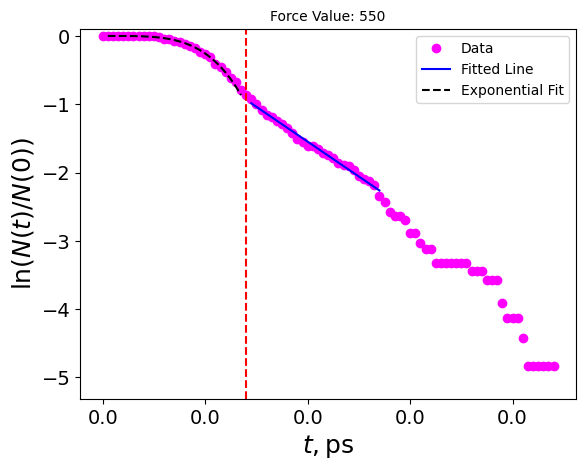

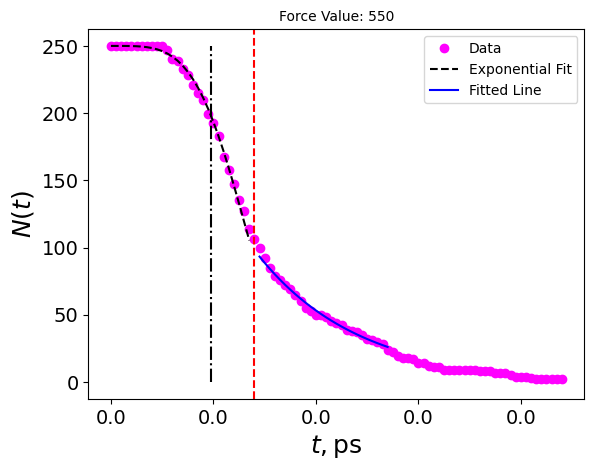

In [203]:
t_fit = t[(N > N_cut) & (t > tau_frac)]
n_fit = n[(N > N_cut) & (t > tau_frac)]

plot_lnN(force_value, t, t_fit, n, tau_frac, pend_var[N_cut], pinit)
plot_N(force_value, t, t_fit, N, N0, tau_frac, pend_var[N_cut], pinit)

In [204]:
tau_all.append(tau)
forces_all.append(force_value)

<p style="color: darkblue; font-size: 24px;"><strong><em> force 563 :</em></strong></p>

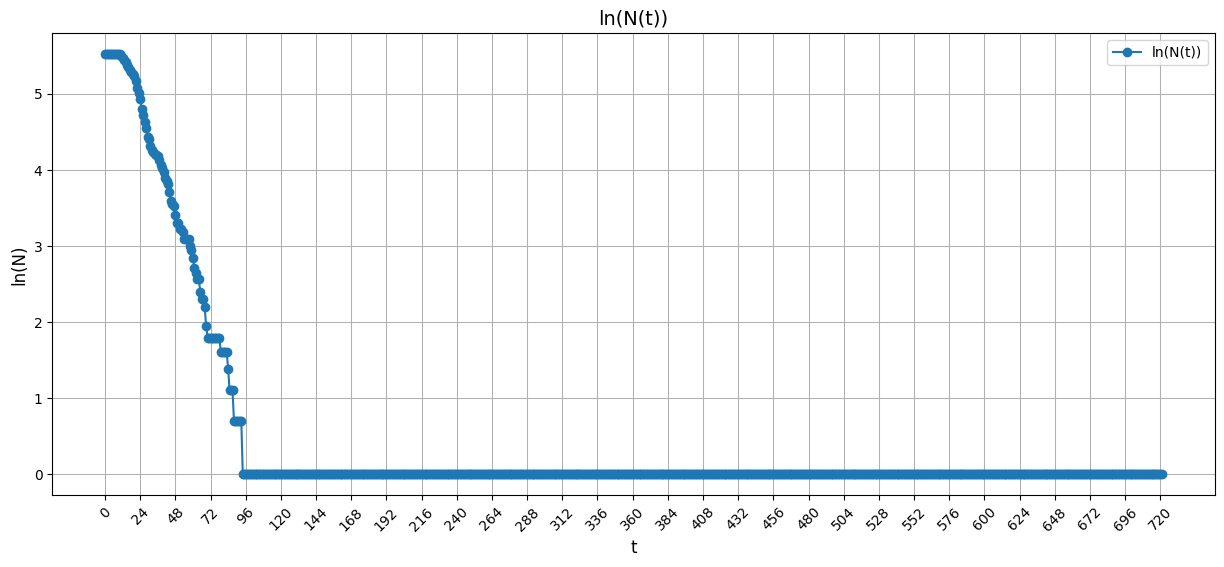

In [205]:
#данные выглядят иначе, чем в других forces, оставила как есть
force = forces_data['force563']
force_value = 563
t, N = filter_data(force)
pend_var = []
tau_var = []
lambda_var = []
N0 = N[0]
ln_N = np.log(N)
plot_ln_N_vs_t(t, N)

<span style="color:darkblue;font-size: 18px;"><em>a) Finding classical exponential relaxation:</em></span>

In [206]:
t0 = 11 
tend = 29
tau_frac = 28
N_cut_max = 31

tau_var: [0.05014721858445, 0.001649132695481, 0.001698405274631, 0.001714501770923, 0.001711120855481, 0.001668378562482, 0.001736574766963, 0.001770313798333, 0.001770313798333, 0.001785690426307, 0.00181898929547, 0.001838862497724, 0.001838862497724, 0.001858787182315, 0.001873426438299, 0.001887922528902, 0.001887922528902, 0.001888945906135, 0.001888945906135, 0.001875936113322, 0.001860798545941, 0.001860798545941, 0.00181145976448, 0.00181145976448, 0.001810423125763, 0.001844320477703, 0.001844320477703, 0.001944637379976, 0.001944637379976, 0.001944637379976, 0.002011122287736]
lambda_var: [-19.941285443697186, -606.3793427539573, -588.7876203265797, -583.2598233255042, -584.4122563270852, -599.3843498638026, -575.8462111877068, -564.8716069105448, -564.8716069105448, -560.0074824099491, -549.7558465518239, -543.8144511826553, -543.8144511826553, -537.9852032089842, -533.7813001657504, -529.682751644354, -529.682751644354, -529.3957845759318, -529.3957845759318, -533.06719397

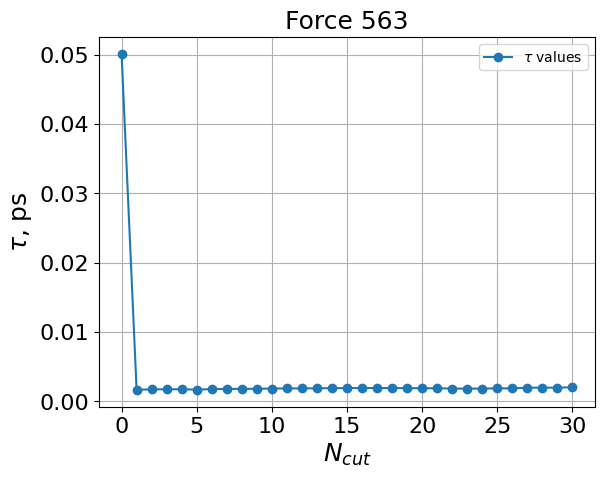

In [207]:
n = np.log(N / N0)
calculate_dissociation_rates(t, n, N, N_cut_max, tau_frac, tau_var, lambda_var, pend_var)
print("tau_var:", tau_var)
print("lambda_var:", lambda_var)
print("pend_var:", pend_var)

x_values = list(range(len(tau_var)))
y_values = tau_var
plot_tau(x_values, y_values, force_value)

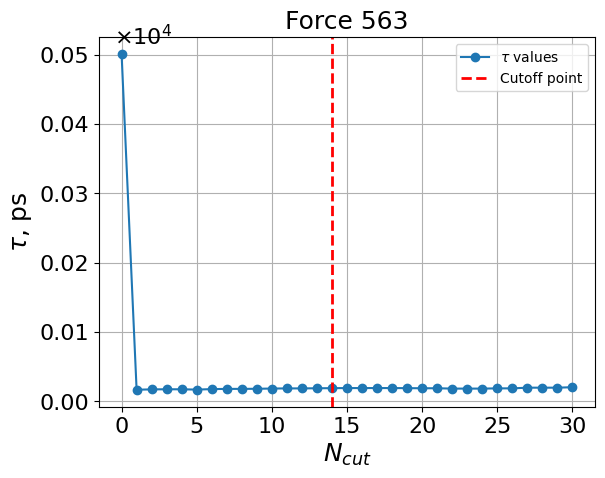

In [208]:
N_cut = 14

a = list(range(len(tau_var)))
plot_tau_with_cutoff(a, tau_var, N_cut, force_value)

<span style="color:darkblue;font-size: 18px;"><em>b) Initial non-classical (fractional) relaxation</em></span>

In [209]:
p, pinit = plot_init_part_ln_ln(force_value, n, t, t0, tend)
print(f"p: {p}, pinit: {pinit}")
print("t[t0:tend]:", t[t0:tend])
print("n[t0:tend]:", n[t0:tend])

p: 3.576865370848217, pinit: [  3.57686537 -11.85327988]
t[t0:tend]: [11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28.]
n[t0:tend]: [-0.02429269 -0.04919024 -0.07472355 -0.10536052 -0.14156356 -0.16960278
 -0.21319322 -0.23319389 -0.26918749 -0.2903523  -0.35667494 -0.4462871
 -0.51751461 -0.59420723 -0.72567037 -0.80296205 -0.8964881  -0.96758403]


In [210]:
tau = tau_var[N_cut]
lambda_ = lambda_var[N_cut] * 1e-4
print(f"tau: {tau}, lambda: {lambda_}")

tau: 0.001873426438299, lambda: -0.05337813001657504


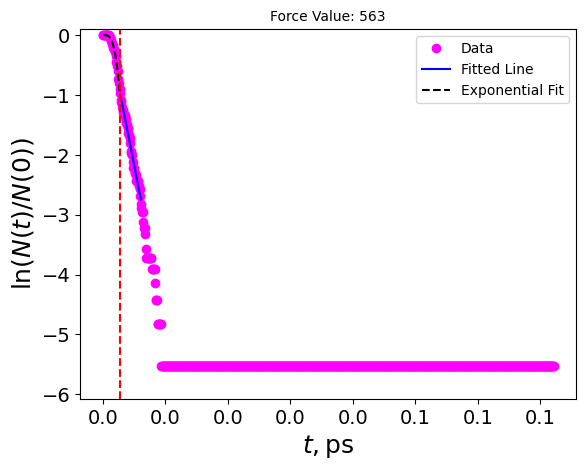

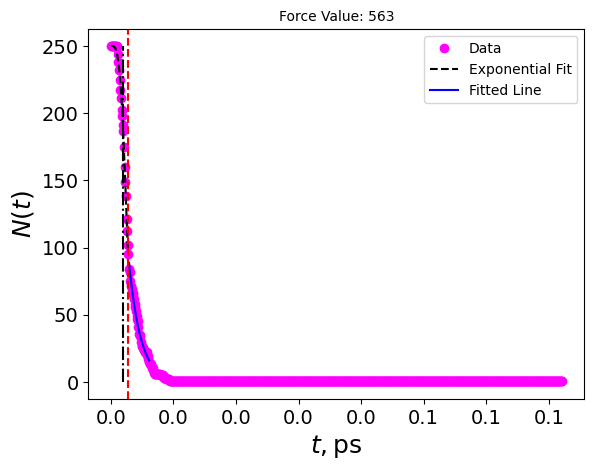

In [211]:
t_fit = t[(N > N_cut) & (t > tau_frac)]
n_fit = n[(N > N_cut) & (t > tau_frac)]

plot_lnN(force_value, t, t_fit, n, tau_frac, pend_var[N_cut], pinit)
plot_N(force_value, t, t_fit, N, N0, tau_frac, pend_var[N_cut], pinit)

In [212]:
tau_all.append(tau)
forces_all.append(force_value)

<p style="color: darkblue; font-size: 24px;"><strong><em> force 575 :</em></strong></p>

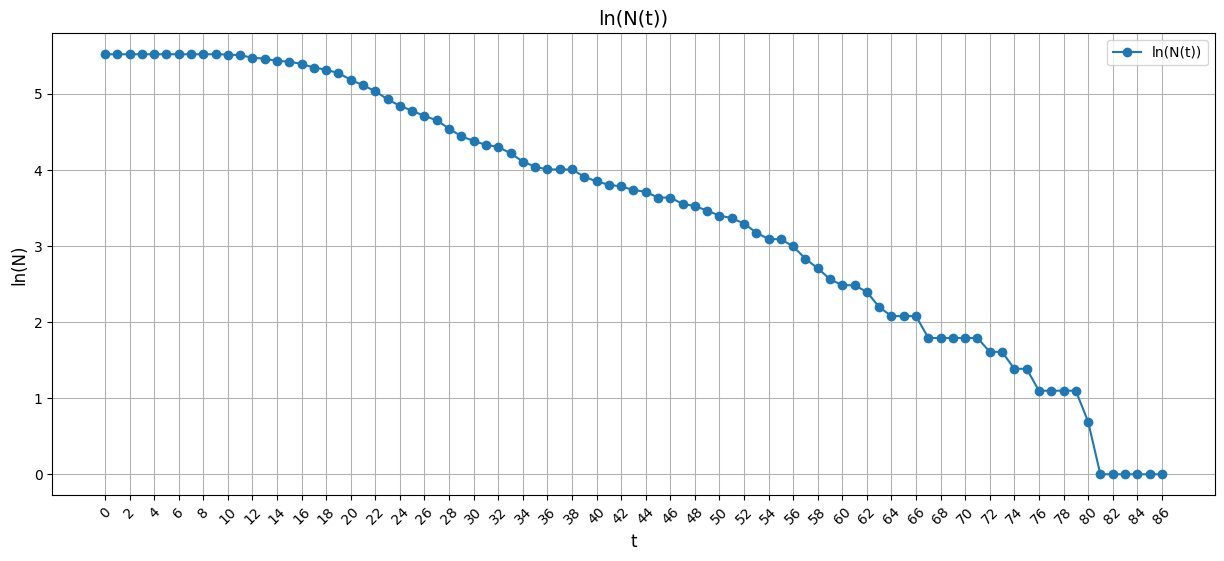

In [213]:
force = forces_data['force575']
force_value = 575
t, N = filter_data(force)
pend_var = []
tau_var = []
lambda_var = []
N0 = N[0]
ln_N = np.log(N)
plot_ln_N_vs_t(t, N)

<span style="color:darkblue;font-size: 18px;"><em>a) Finding classical exponential relaxation:</em></span>

In [214]:
t0 = 11 
tend = 26
tau_frac = 25
N_cut_max = 51

tau_var: [0.001299703021158, 0.001433774150836, 0.001450468548209, 0.001489868570578, 0.001508844660807, 0.001521419619928, 0.001595551636465, 0.001595551636465, 0.001670392430094, 0.0017072376622, 0.0017072376622, 0.001732167330315, 0.00179948756584, 0.001846868295836, 0.001846868295836, 0.001887735373495, 0.001887735373495, 0.001922149843728, 0.001922149843728, 0.001922149843728, 0.001936637507754, 0.001936637507754, 0.001965152357602, 0.001965152357602, 0.001981919167138, 0.001981919167138, 0.001981919167138, 0.001978637217424, 0.001978637217424, 0.001966395173296, 0.001958083317588, 0.001958083317588, 0.00194147021781, 0.00194147021781, 0.00191595453572, 0.001895255804025, 0.001895255804025, 0.001895255804025, 0.001828333023345, 0.001828333023345, 0.001828333023345, 0.001783092416138, 0.001744728408767, 0.001744728408767, 0.001700596746711, 0.001668551906052, 0.001668551906052, 0.001637256862533, 0.001637256862533, 0.001637256862533, 0.001590562135454]
lambda_var: [-769.40653650959

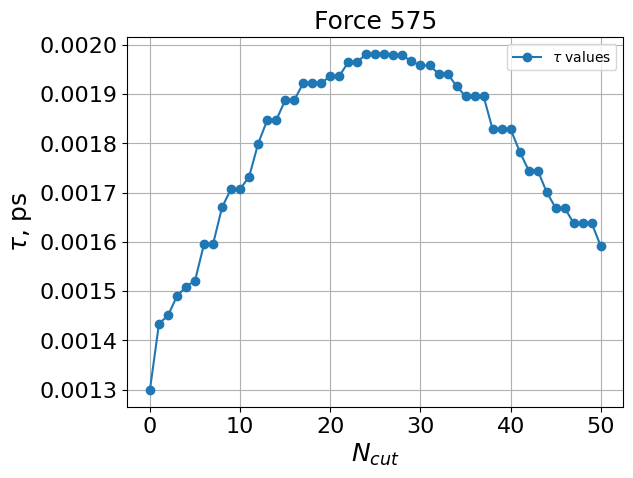

In [215]:
n = np.log(N / N0)
calculate_dissociation_rates(t, n, N, N_cut_max, tau_frac, tau_var, lambda_var, pend_var)
print("tau_var:", tau_var)
print("lambda_var:", lambda_var)
print("pend_var:", pend_var)

x_values = list(range(len(tau_var)))
y_values = tau_var
plot_tau(x_values, y_values, force_value)

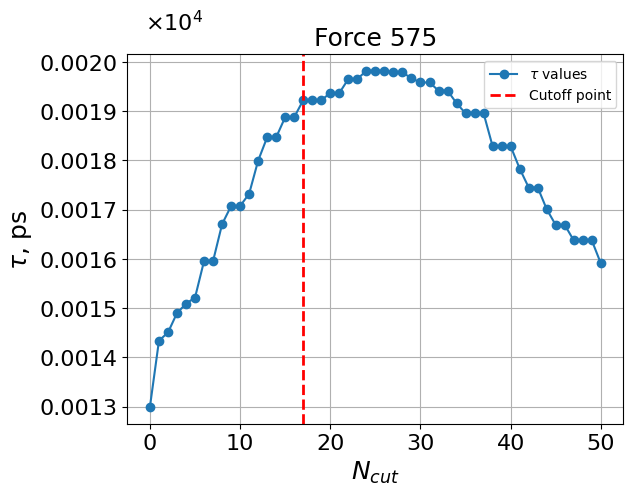

In [216]:
N_cut = 17

a = list(range(len(tau_var)))
plot_tau_with_cutoff(a, tau_var, N_cut, force_value)

<span style="color:darkblue;font-size: 18px;"><em>b) Initial non-classical (fractional) relaxation</em></span>

In [217]:
p, pinit = plot_init_part_ln_ln(force_value, n, t, t0, tend)
print(f"p: {p}, pinit: {pinit}")
print("t[t0:tend]:", t[t0:tend])
print("n[t0:tend]:", n[t0:tend])

p: 4.401492825508092, pinit: [  4.40149283 -14.31165101]
t[t0:tend]: [11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25.]
n[t0:tend]: [-0.01207258 -0.04499737 -0.05762911 -0.08773891 -0.0965109  -0.12783337
 -0.17435339 -0.20334092 -0.24846136 -0.33407511 -0.40947313 -0.48450832
 -0.59420723 -0.67727383 -0.74233742]


In [218]:
tau = tau_var[N_cut]
lambda_ = lambda_var[N_cut] * 1e-4
print(f"tau: {tau}, lambda: {lambda_}")

tau: 0.001922149843728, lambda: -0.05202508031635836


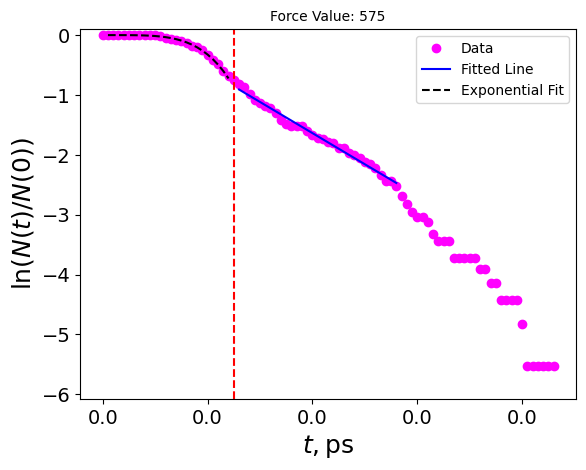

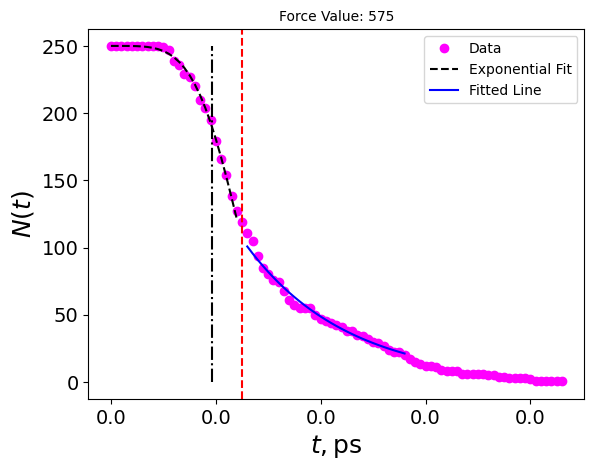

In [219]:
t_fit = t[(N > N_cut) & (t > tau_frac)]
n_fit = n[(N > N_cut) & (t > tau_frac)]

plot_lnN(force_value, t, t_fit, n, tau_frac, pend_var[N_cut], pinit)
plot_N(force_value, t, t_fit, N, N0, tau_frac, pend_var[N_cut], pinit)

In [220]:
tau_all.append(tau)
forces_all.append(force_value)

<p style="color: darkblue; font-size: 24px;"><strong><em> force 588 :</em></strong></p>

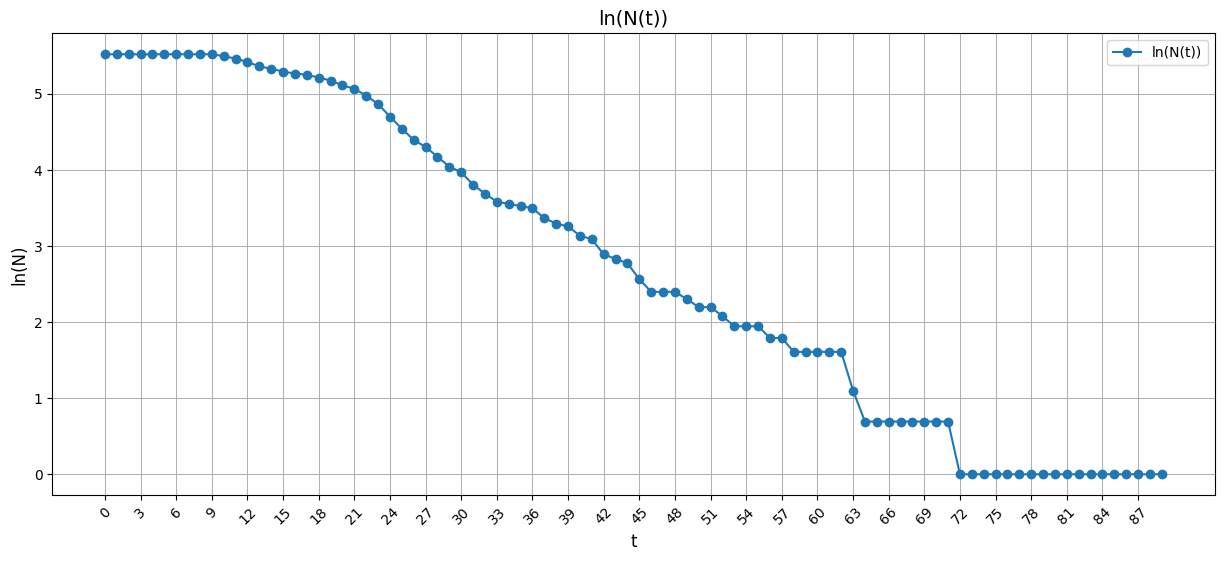

In [221]:
force = forces_data['force588']
force_value = 588
t, N = filter_data(force)
pend_var = []
tau_var = []
lambda_var = []
N0 = N[0]
ln_N = np.log(N)
plot_ln_N_vs_t(t, N)

<span style="color:darkblue;font-size: 18px;"><em>a) Finding classical exponential relaxation:</em></span>

In [222]:
t0 = 11 
tend = 26
tau_frac = 25
N_cut_max = 51

tau_var: [0.001305759844725, 0.001185175101906, 0.001227449496123, 0.001236932623072, 0.001236932623072, 0.001176367555097, 0.001157951304071, 0.001134991251467, 0.001129086706597, 0.001116351212484, 0.001111833094582, 0.001140082777214, 0.001140082777214, 0.001160839716554, 0.001160839716554, 0.001160839716554, 0.001157754553854, 0.001161078860994, 0.001175776422787, 0.001175776422787, 0.001175776422787, 0.001175776422787, 0.001152274847334, 0.001136599694705, 0.001136599694705, 0.001136599694705, 0.001097036999291, 0.00106638788188, 0.00106638788188, 0.001032076856392, 0.001032076856392, 0.001032076856392, 0.001032076856392, 0.00095739291592, 0.000892133977117, 0.0008460600401, 0.000844490239503, 0.000844490239503, 0.000844490239503, 0.000844490239503, 0.00085961527934, 0.00085961527934, 0.00085961527934, 0.00085961527934, 0.00085961527934, 0.000901446391605, 0.000901446391605, 0.000901446391605, 0.000901446391605, 0.000901446391605, 0.000901446391605]
lambda_var: [-765.8376109818953

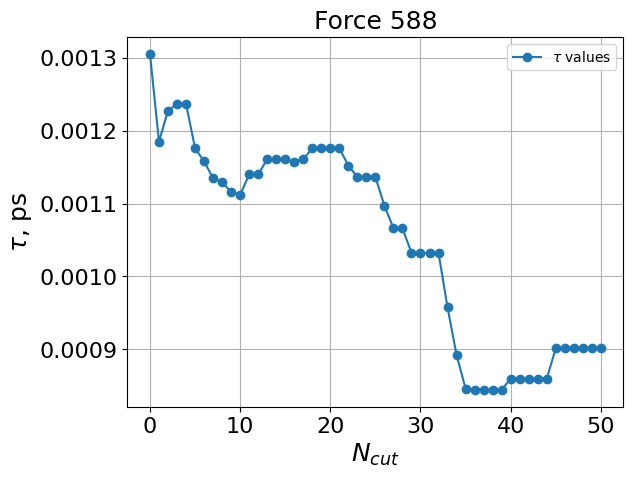

In [223]:
n = np.log(N / N0)
calculate_dissociation_rates(t, n, N, N_cut_max, tau_frac, tau_var, lambda_var, pend_var)
print("tau_var:", tau_var)
print("lambda_var:", lambda_var)
print("pend_var:", pend_var)

x_values = list(range(len(tau_var)))
y_values = tau_var
plot_tau(x_values, y_values, force_value)

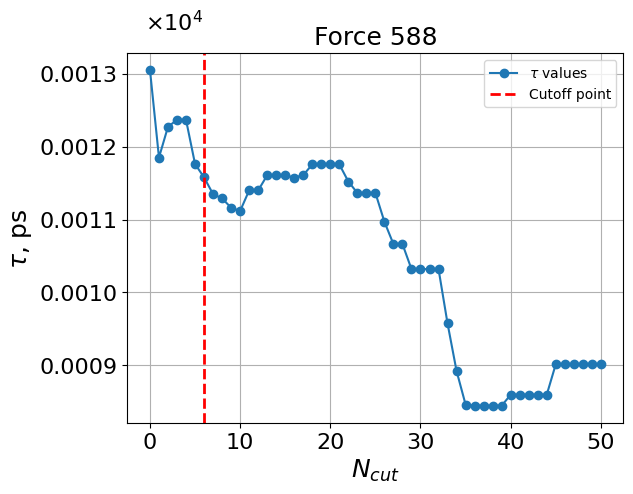

In [224]:
N_cut = 6

a = list(range(len(tau_var)))
plot_tau_with_cutoff(a, tau_var, N_cut, force_value)

<span style="color:darkblue;font-size: 18px;"><em>b) Initial non-classical (fractional) relaxation</em></span>

In [225]:
p, pinit = plot_init_part_ln_ln(force_value, n, t, t0, tend)
print(f"p: {p}, pinit: {pinit}")
print("t[t0:tend]:", t[t0:tend])
print("n[t0:tend]:", n[t0:tend])

p: 2.9163424748088915, pinit: [ 2.91634247 -9.53998975]
t[t0:tend]: [11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25.]
n[t0:tend]: [-0.05762911 -0.10092592 -0.16016875 -0.18874212 -0.22815609 -0.25360276
 -0.26918749 -0.30652516 -0.34531119 -0.40947313 -0.45255672 -0.54472718
 -0.65392647 -0.82098055 -0.97816614]


In [226]:
tau = tau_var[N_cut]
lambda_ = lambda_var[N_cut] * 1e-4
print(f"tau: {tau}, lambda: {lambda_}")

tau: 0.001157951304071, lambda: -0.08635941740247086


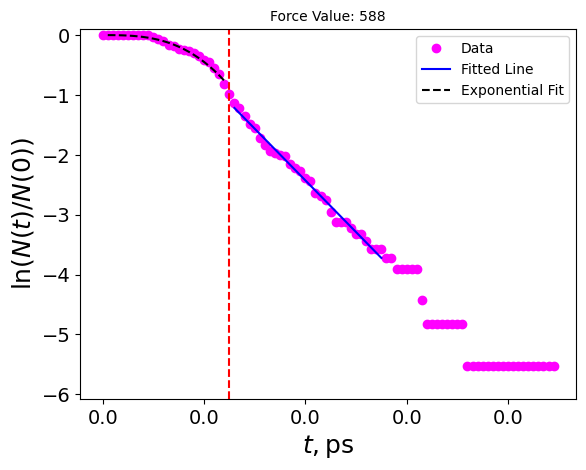

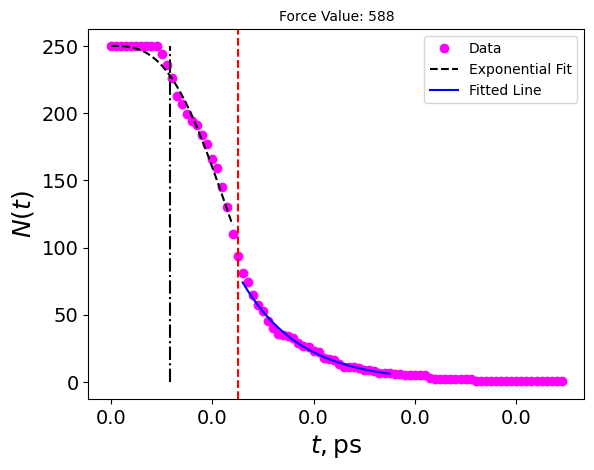

In [227]:
t_fit = t[(N > N_cut) & (t > tau_frac)]
n_fit = n[(N > N_cut) & (t > tau_frac)]

plot_lnN(force_value, t, t_fit, n, tau_frac, pend_var[N_cut], pinit)
plot_N(force_value, t, t_fit, N, N0, tau_frac, pend_var[N_cut], pinit)

In [228]:
tau_all.append(tau)
forces_all.append(force_value)

<p style="color: darkblue; font-size: 24px;"><strong><em> force 600 :</em></strong></p>

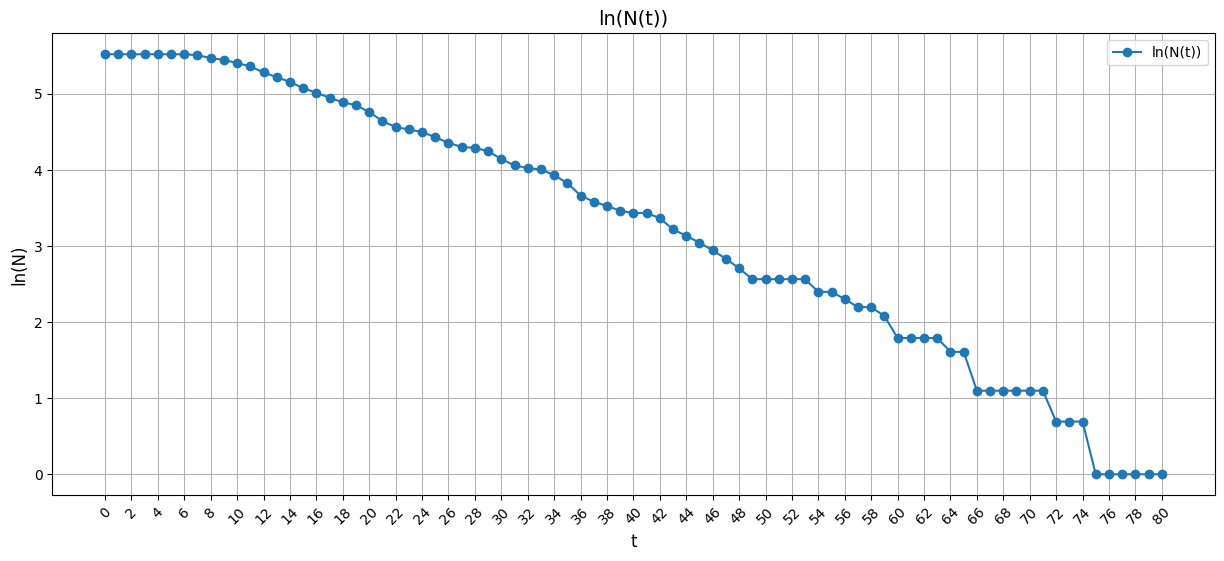

In [229]:
force = forces_data['force600']
force_value = 600
t, N = filter_data(force)
pend_var = []
tau_var = []
lambda_var = []
N0 = N[0]
ln_N = np.log(N)
plot_ln_N_vs_t(t, N)

<span style="color:darkblue;font-size: 18px;"><em>a) Finding classical exponential relaxation:</em></span>

In [230]:
t0 = 9 
tend = 20
tau_frac = 19
N_cut_max = 71

tau_var: [0.001246053070828, 0.001322190028569, 0.001345115969918, 0.001400088023891, 0.001400088023891, 0.001404026584656, 0.001425515742447, 0.001425515742447, 0.001424471567258, 0.001419342690864, 0.001416222719139, 0.001410345677643, 0.001410345677643, 0.001444633782265, 0.001444633782265, 0.001469926246233, 0.001469926246233, 0.001491583989844, 0.001491583989844, 0.001510193718355, 0.001510193718355, 0.001526382273522, 0.001526382273522, 0.001540880062422, 0.001540880062422, 0.00155459777769, 0.00155459777769, 0.00155459777769, 0.00155459777769, 0.001546222430535, 0.001546222430535, 0.001543690845239, 0.001570202700589, 0.001570202700589, 0.001609663882798, 0.001609663882798, 0.001671289813742, 0.001671289813742, 0.001671289813742, 0.001752082617474, 0.001752082617474, 0.001752082617474, 0.001752082617474, 0.001752082617474, 0.001752082617474, 0.001752082617474, 0.001781248649569, 0.001781248649569, 0.001781248649569, 0.001781248649569, 0.001781248649569, 0.001776368899536, 0.0017

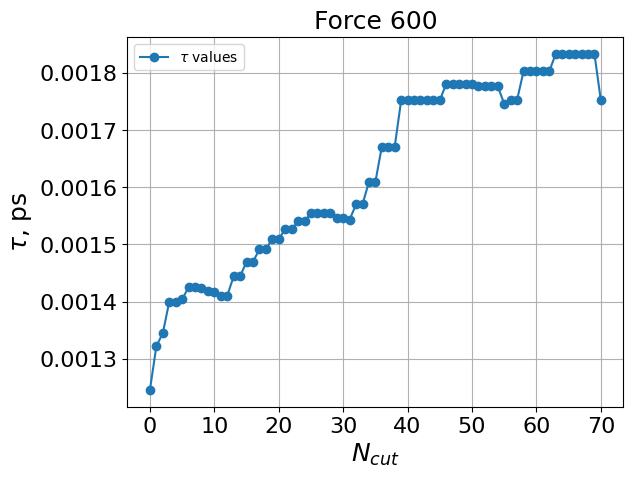

In [231]:
n = np.log(N / N0)
calculate_dissociation_rates(t, n, N, N_cut_max, tau_frac, tau_var, lambda_var, pend_var)
print("tau_var:", tau_var)
print("lambda_var:", lambda_var)
print("pend_var:", pend_var)

x_values = list(range(len(tau_var)))
y_values = tau_var
plot_tau(x_values, y_values, force_value)

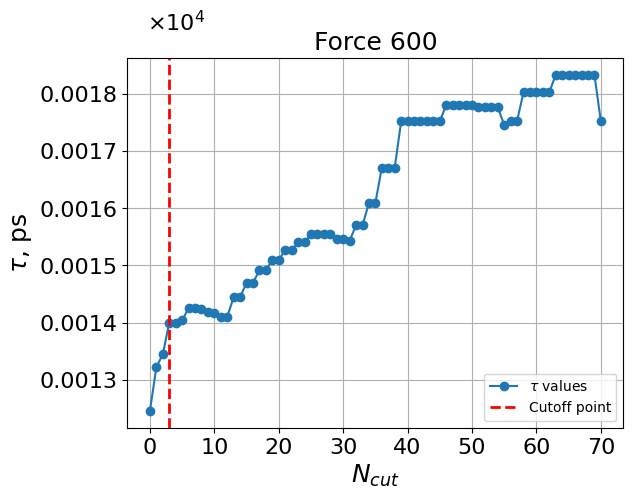

In [232]:
N_cut = 3

a = list(range(len(tau_var)))
plot_tau_with_cutoff(a, tau_var, N_cut, force_value)

<span style="color:darkblue;font-size: 18px;"><em>b) Initial non-classical (fractional) relaxation</em></span>

In [233]:
p, pinit = plot_init_part_ln_ln(force_value, n, t, t0, tend)
print(f"p: {p}, pinit: {pinit}")
print("t[t0:tend]:", t[t0:tend])
print("n[t0:tend]:", n[t0:tend])

p: 2.947229146758261, pinit: [ 2.94722915 -8.89493321]
t[t0:tend]: [ 9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
n[t0:tend]: [-0.07472355 -0.11428915 -0.16016875 -0.23825719 -0.30110509 -0.36240562
 -0.4462871  -0.50418108 -0.57270103 -0.63111179 -0.66943065]


In [234]:
tau = tau_var[N_cut]
lambda_ = lambda_var[N_cut] * 1e-4
print(f"tau: {tau}, lambda: {lambda_}")

tau: 0.001400088023891, lambda: -0.07142408069609843


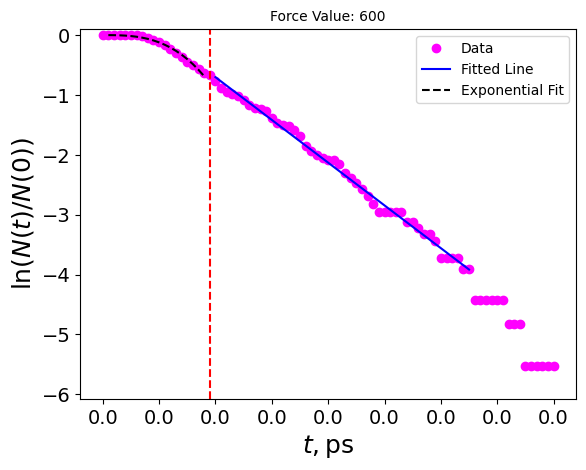

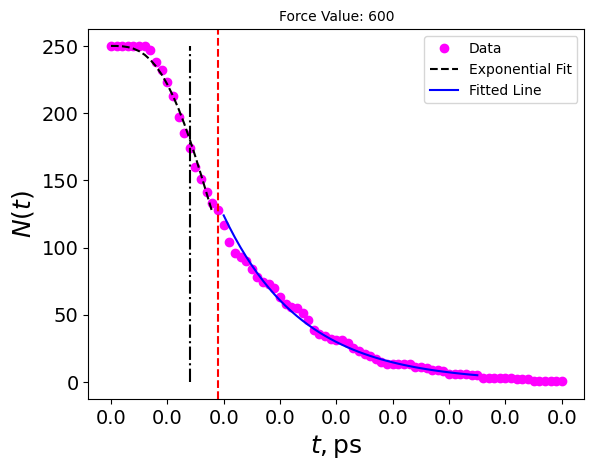

In [235]:
t_fit = t[(N > N_cut) & (t > tau_frac)]
n_fit = n[(N > N_cut) & (t > tau_frac)]

plot_lnN(force_value, t, t_fit, n, tau_frac, pend_var[N_cut], pinit)
plot_N(force_value, t, t_fit, N, N0, tau_frac, pend_var[N_cut], pinit)

In [236]:
tau_all.append(tau)
forces_all.append(force_value)

In [237]:
tau_data = pd.DataFrame({
    "Force": forces_all,
    "Dissoc_Time_Tau": tau_all
})

print(tau_data)
tau_data.to_csv("tau_data.csv", index=False)

    Force  Dissoc_Time_Tau
0     250         1.486313
1     263         4.035113
2     275         2.643564
3     288         1.912803
4     300         1.260576
5     313         1.154426
6     325         1.145028
7     338         0.435022
8     350         0.545289
9     363         0.202897
10    375         0.152870
11    388         0.135837
12    400         0.070388
13    413         0.058117
14    425         0.028977
15    438         0.016223
16    450         0.015364
17    463         0.009046
18    475         0.012404
19    488         0.004384
20    500         0.004275
21    513         0.003916
22    525         0.002574
23    538         0.001789
24    550         0.001960
25    563         0.001873
26    575         0.001922
27    588         0.001158
28    600         0.001400
